# Deep Dive into Deep Learning: Fine-tuning a Large Language Model for Housing Price Prediction

**Welcome to the world of Large Language Models!**

In this project, you'll get a hands-on in building a state-of-the-art AI system capable of predicting housing prices. This challenge will immerse you in the core concepts of modern Natural Language Processing (NLP).

## Prerequisites: A Foundation for Exploration

This project assumes a basic familiarity with Python programming and Machine Learning.  While prior experience with deep learning libraries is beneficial, it's not strictly required, as we'll guide you through the essential concepts and techniques.

**Here's a breakdown of the key prerequisites and resources to help you get started:**

### 1. Machine Learning and Deep Learning:  The Power of Pattern Recognition

*   **Machine Learning: From the Data Up**
  
  Machine learning algorithms grow models that realize rules and patterns from data without explicit programming. That is, instead of implementing rules based on human knowledge, we feed these algorithms large datasets, allowing them to identify trends on their own, with little expert's involvement. The aim of doing Machine Learning is to make predictions that are consistent with past and future observations.
*   **Deep Learning: A Revolution in Artificial Intelligence**

  Deep learning represents a powerful subset of machine learning that utilizes artificial neural networks – with computational structures inspired by the human brain – to model intricate patterns and relationships within data.  Deep learning has driven remarkable breakthroughs in computer vision, natural language processing, and countless other domains.
    *   **Further Reading:** [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville provides a comprehensive introduction to the field.

### 2. The Natural Language Modeling Task: Teaching Machines to Understand Human Language

*   **Decoding the Essence of Language**

  Natural language processing (NLP) focuses on bridging the gap between human language and computer understanding. It encompasses a wide range of tasks, from simple text classification to machine translation and question answering.
*   **The Power of Deep Learning in NLP**

  Deep learning models, particularly those based on the Transformer architecture (more on that below!), have revolutionized NLP. Their ability to capture long-range semantic dependencies and intricate syntactic structures has led to significant improvements in language understanding and generation.
    *   **Further Reading:**  The Stanford CS224N course ([Website](http://web.stanford.edu/class/cs224n/)) offers slides and notes that serve as a fantastic deep dive into NLP with deep learning.

### 3. Transformers: The Architecture Reshaping NLP

*   **Beyond Recurrent Networks**

  Traditional recurrent neural networks (RNNs) faced challenges in processing long sequences of text due to their sequential nature. Transformers, introduced in the groundbreaking paper "Attention Is All You Need" ([Paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)), addressed these limitations by leveraging an innovative self-attention mechanism.
*   **Attention is All You Need**  

  Self-attention allows the model to weigh the importance of different words in a sentence when processing information, enabling it to capture relationships and dependencies across long distances efficiently. This breakthrough architecture has become the workhorse of modern NLP solutions.

  We will be working with the T5 model in this project. It is a generic encoder-decoder Transformer model commonly used by researchers and academics to study the extend of machine language modeling.

### 4. Hugging Face, PyTorch, and the Power of Open-Source AI

*   **Hugging Face Transformers: Your Gateway to NLP**

  Hugging Face provides a powerful and user-friendly library ([Hugging Face Documentation](https://huggingface.co/docs/transformers/index)) that simplifies the use of pre-trained Transformer models for various NLP tasks.  You'll use it extensively throughout this project.
*   **PyTorch: A Powerful Auto-Diff Framework**

  PyTorch is a widely adopted deep learning framework known for its dynamic computation graph and intuitive API. Its auto-differentiation capabilities streamline the process of calculating gradients, a critical aspect of training large neural networks with complex computation structures.
    *   **Further Reading:**  The official [PyTorch Tutorials](https://pytorch.org/tutorials/) are an excellent resource for getting started.

### 5. The Deep Learning Training Pipeline: A Step-by-Step Guide

1.  **Data Preparation:**  Transforming raw data into a format suitable for training a deep learning model, often involving cleaning missing or invalid data values, data normalization, and splitting into training, validation, and test sets.
2.  **Model Selection:** Choosing an appropriate model architecture (in our case, a pre-trained Transformer) based on the task/dataset characteristics. This is where the expert's intuition comes in, but at a very high level.
3.  **Loss Function and Optimizer:** Defining a loss function that continuously quantifies the model's errors during training and selecting an optimization algorithm (typically Stochastic Gradient Descent and variations) to adjust the model's parameters and minimize this loss function.
4.  **Training:** Feeding the training data through the model - in batches or all at once, calculating the loss, and using backpropagation to update the model's weights. We typically need to do these steps many times.
5.  **Validation:**  Evaluating the model's performance on a separate validation set to tune hyperparameters and prevent overfitting (where the model memorizes the training data so it fails to generalize to unseen examples).
6.  **Testing:** Assessing the model's final performance on a held-out test set to provide an unbiased estimate of its generalization correctness. These test examples should not have been used in tuning the model's parameters nor its hyperparameters.

### 6. Project Goals: Unveiling the Apparent Magic of Deep Learning

In this project, our aim is to provide you with practical experience and a deeper understanding of:

*   **Fine-tuning Pretrained Language Models:** You'll learn how to adapt a powerful pre-trained language model (T5) to a specific task, scientific question answering, by training it on a relevant dataset.
*   **Hyperparameter Tuning:** Experimenting with different training settings to optimize your model's performance.
*   **Evaluating Model Performance:** Using appropriate metrics to assess your model's effectiveness.
*   **Model Interpretability:** Gaining insights into how your model makes decisions, particularly by visualizing the attention mechanism within the Transformer architecture.

**To be successful at this project's learning goals, we expect that you read the description of each section, run every code block sequentially from top to bottom (you can check if your implementation is correct by compare and contrast with the provided outputs), and complete the TODOs and final report. In addition, we highly encourage you to break free from the provided starter code and implement additional features for data augmnetation, model interpretability and visualization, etc. Happy deep diving!**

# Installing Dependencies

In [1]:
pip install transformers tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os # For interacting with the operating system
import pandas as pd # For data storage, manipulation, and fast analysis
from transformers import T5Tokenizer, T5ForConditionalGeneration # For the T5 model
from torch.utils.data import Dataset, DataLoader # For making custom datasets
from tqdm import tqdm # For visualizing training/testing progress bar
import torch # PyTorch library for deep learning
import sklearn # For fast initialization of machine learning models and algorithms
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For plotting heatmaps
import warnings # For printing warning messages

C:\Work Modules\MS\AI\LLM_project\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Part 1: Data Preparation & Preprocessing
1. Load the Boston Housing Dataset

Download the [Boston Housing Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/input), upload it to your Colab environment, and use the correct path name to programmatically access that file (should be a csv file) during runtime. If you would like to learn what the column names mean or the dataset origin, please visit [this link](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) (it is highly recommended that you intimately understand the dataset you are working with).

Remember that our task is to train a model that can predict the price of houses given other attributes/features of those houses. That is, the last column of this data is what we aim to make the model correctly predict given the other columns.

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names) # Replace with the appropriate path if necessary

# Inspect the dataframe
print(data.head()) # Display the first few rows of the dataset
print()
print("Dataset dimensions:", data.shape) # Display the number of rows and columns in the dataset
print()
print(data.info()) # Display information about the dataset (data types, missing values of each column, etc.)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset dimensions: (506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Initial Analysis of Data

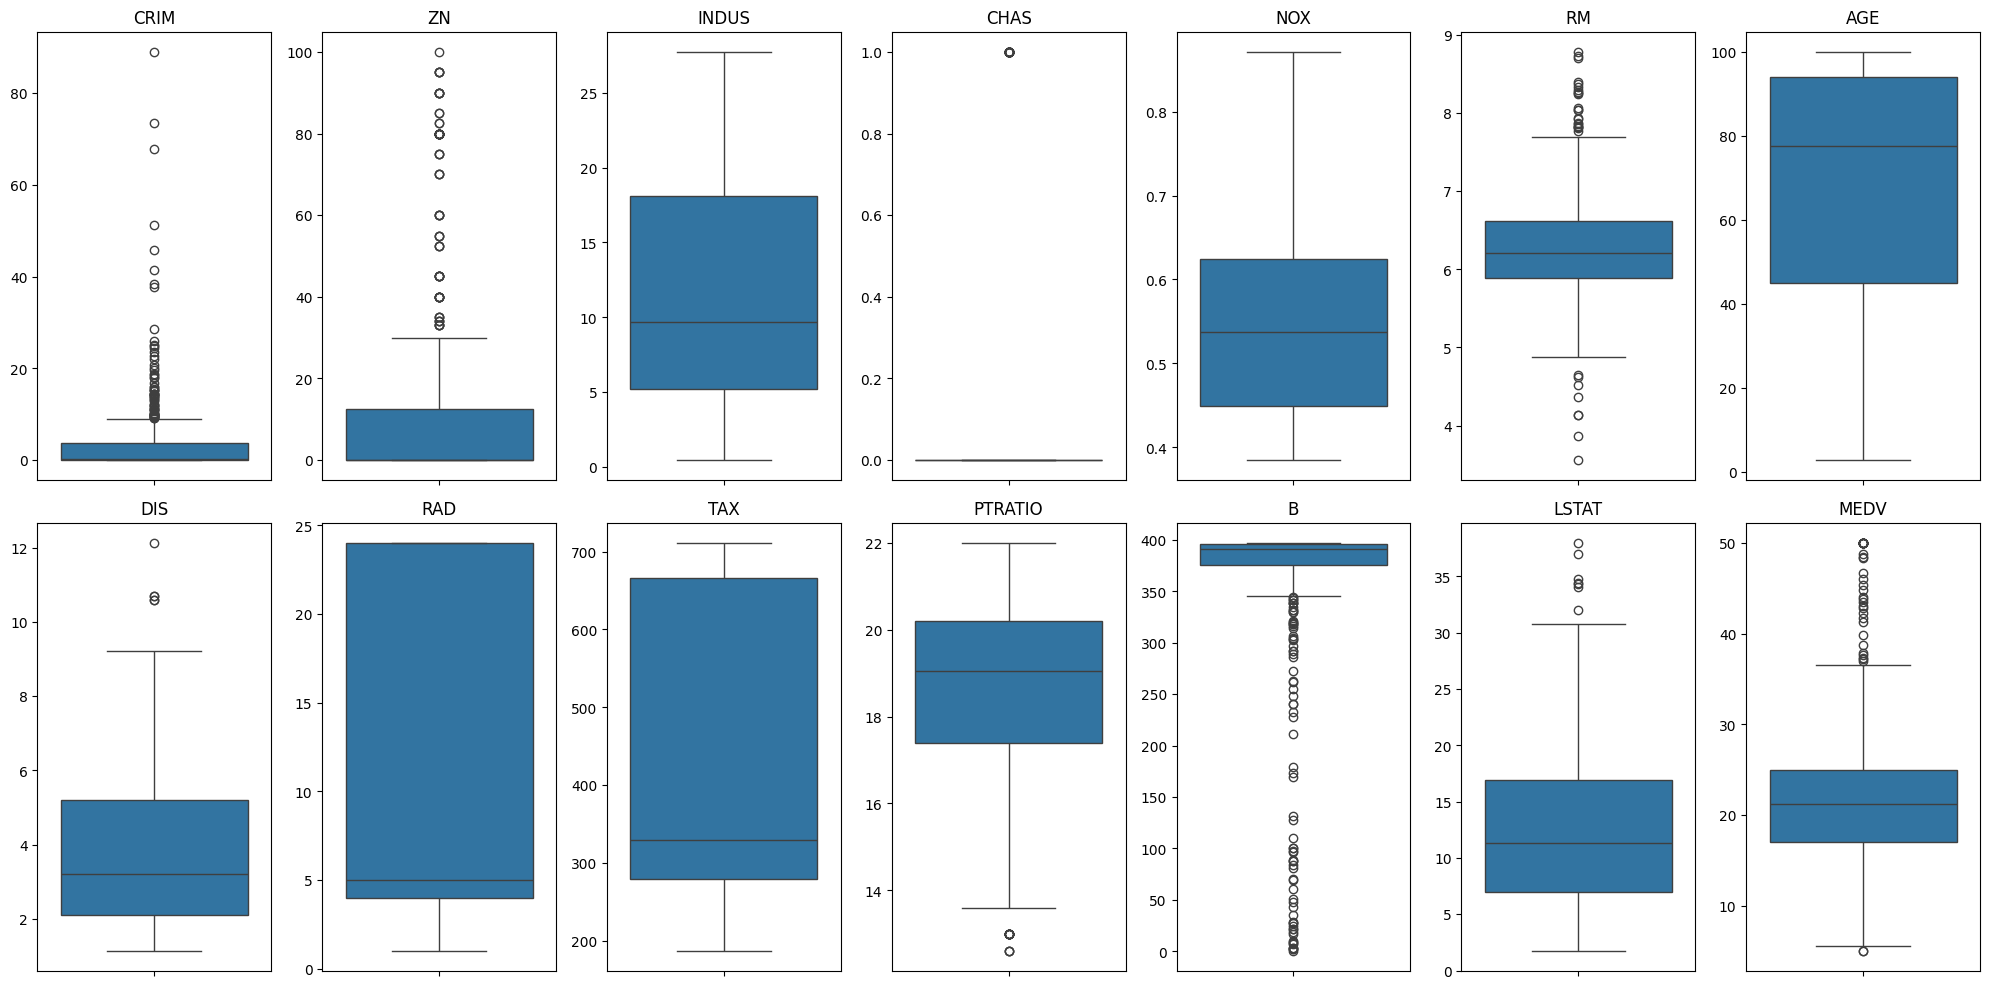

In [5]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10))
axes = axes.ravel()

for idx, column in enumerate(data.columns):
    sns.boxplot(data=data[column], ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()

2. Define a function to transform the dataset

If you have been in Machine Learning for some time, you might have notice that price prediction is a regression task, which means the model should output continuous numerical values. However, T5 is a language model, which means it outputs discrete text tokens. We will handle this discrepancy in modality in the later section. For now, we need to convert the given numerical data format to the textual data format so our T5 model can consume this data.

We need to do the following data processing steps:
-  Combining Text: We combine the features into a single text string because the T5 model expects a single natural language string as input. The T5 model also outputs a single natural language string so we also need to make the ground-truth label a text string so we can supervise the model outputs versus the ground-truth labels.
- Pandas DataFrame: We convert this data into a [Pandas DataFrame](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) for efficient data manipulation and to easily feed the data into our training pipeline later.

In [6]:
def reformat_dataset(data: pd.DataFrame) -> pd.DataFrame:

    formatted_data = []
    for _, row in data.iterrows():

        ########################################################################
        # TODO: create the input string from part of the values in 'row'.
        # You must not give the model the last column value
        # as that is what we want the model to predict.
        input_string = ', '.join(f"{val}" for val in row[:-1])
        # print(input_string)
        ########################################################################

        ########################################################################
        # TODO: create the output string from part of the values in 'row'.
        # This string should contain the value in
        # the last column without any additional text so we can easily convert
        # the trained model's output to floating point values later
        output_string = f"{row.iloc[-1]}"
        ########################################################################

        formatted_data.append((input_string, output_string))

    return pd.DataFrame(formatted_data)

reformat_dataset(data)

,0,1
0,"0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, ...",24.0
1,"0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4...",21.6
2,"0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4...",34.7
3,"0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6...",33.4
4,"0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6...",36.2
...,...,...
501,"0.06263, 0.0, 11.93, 0.0, 0.573, 6.593, 69.1, ...",22.4
502,"0.04527, 0.0, 11.93, 0.0, 0.573, 6.12, 76.7, 2...",20.6
503,"0.06076, 0.0, 11.93, 0.0, 0.573, 6.976, 91.0, ...",23.9
504,"0.10959, 0.0, 11.93, 0.0, 0.573, 6.794, 89.3, ...",22.0


3. Split the data into training, validation, and test sets

It's essential to divide our data into three separate sets: training, validation, and test. Let's understand why this is crucial:

- Training Data:  This is the largest portion of our data, used to directly train the model's parameters.
- Validation Data: Held separate from the training data, this set is used to fine-tune the model's hyperparameters (like learning rate, batch size, epochs) and get an early sense of its performance on unseen data.
- Test Data: The most important subset! It's kept hidden from the model during training and validation and used only at the very end to provide an unbiased evaluation of the final model's performance.

To efficiently feed our data to the T5 model during training, we'll create a custom dataset class and a data collate function. They handle the extraction and tokenization of our text data and organizes it into a format readily consumable by the PyTorch DataLoader.

**Key Benefits of Defining a Custom Dataset Class and a Data Collate Function**
- Organized Data Loading:  Simplifies the process of accessing and preparing data batches during training. Especially when the data may be coming in various format (e.g. dictionaries, lists, dataframes, etc.).
- On-the-Fly Tokenization:  Performs tokenization (more on this in the next section) and sequence length padding efficiently when a data sample is requested.
- Integration with DataLoader:  Works seamlessly with PyTorch's DataLoader for data multi-processing and data shuffling.

In [7]:
class OurDataset(Dataset):
    def __init__(self, data: pd.DataFrame):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, at_index: int) -> dict:
        item_at_index = dict.fromkeys(['text', 'label'])

        ########################################################################
        # TODO: Get the input string at the given index out of the Pandas
        # DataFrame and add it into a dictionary
        # store this input string with the key 'text'
        item_at_index['text'] = self.data.iloc[at_index, 0]
        ########################################################################

        ########################################################################
        # TODO: Get the output string at the given index out of the Pandas
        # DataFrame and add it into a dictionary
        # store this output string with the key 'label'
        item_at_index['label'] = self.data.iloc[at_index, 1]
        ########################################################################

        # Return the item dictionary to the dataloader for batching
        return item_at_index

In [8]:
from sklearn.model_selection import train_test_split

# Split and process each partition of the dataset individually
# Train data is used to train model's parameters
# Val data is used pick model's hyperparameters
# Test data is used to evaluate the model's performance
train_data, val_test_data = train_test_split(data, test_size=0.2, random_state=42)  # Split into train and temp sets
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)  # Split temp into val and test sets

# Apply the reformatting function
train_data = reformat_dataset(train_data)
val_data = reformat_dataset(val_data)
test_data = reformat_dataset(test_data)

# Create our custom datasets
train_data = OurDataset(train_data)
val_data = OurDataset(val_data)
test_data = OurDataset(test_data)

print("Training data size:", len(train_data))
print("First train datapoint\n", train_data[0])
print("Validation data size:", len(val_data))
print("First val datapoint\n", val_data[0])
print("Test data size:", len(test_data))
print("First test datapoint\n", test_data[0])

Training data size: 404
First train datapoint
 {'text': '15.0234, 0.0, 18.1, 0.0, 0.614, 5.304, 97.3, 2.1007, 24.0, 666.0, 20.2, 349.48, 24.91', 'label': '12.0'}
Validation data size: 51
First val datapoint
 {'text': '0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98', 'label': '24.0'}
Test data size: 51
First test datapoint
 {'text': '0.13914, 0.0, 4.05, 0.0, 0.51, 5.572, 88.5, 2.5961, 5.0, 296.0, 16.6, 396.9, 14.69', 'label': '23.1'}


In [9]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")  # Load the tokenizer for the 'collate_fn' context


def collate_fn(batch):
    # Tokenize datapoints in batch, we do padding depending on longest sequence
    # in the batch
    text = tokenizer([datapoint['text'] for datapoint in batch], padding=True, return_tensors='pt')
    labels = tokenizer([datapoint['label'] for datapoint in batch], padding=True, return_tensors='pt')
    return {'input_ids': text['input_ids'], 'attention_mask': text['attention_mask'], 'labels': labels['input_ids']}

C:\Work Modules\MS\AI\LLM_project\env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expe

# Part 2: Model Fine-tuning

1. Load the pre-trained T5-small model and tokenizer

In this project, we'll be working with the "T5-small" model, a lightweight but powerful Transformer-based language model developed by Google.  Let's see what makes T5 ([Documentation](https://huggingface.co/docs/transformers/en/model_doc/t5)) special and why it's well-suited for our task.

**T5 Architecture and Training: A Versatile Language Model**

- Encoder-Decoder Structure:  As introduced in [Attention Is All You Need](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf), T5 consists of two main components: an encoder that processes the input text into a context vector and a decoder that autoregressively generates the output text based on the context vector and generated texts.
- Text-to-Text Framework: What sets T5 apart is its pre-training approach. It was pre-trained on a massive dataset of text-to-text tasks, where it learns various NLP tasks (translation, summarization, question answering) in a unified text-to-text format.
    - C4 Dataset:  T5 is pre-trained on the [Colossal Clean Crawled Corpus (C4)](https://huggingface.co/datasets/allenai/c4), a vast dataset of text and code scraped from the entier internet. This extensive and diverse training data makes T5 remarkably versatile and capable of adapting to various NLP tasks.

**The Role of the Tokenizer**

- Bridging the Gap Between Text and Vectors:  Deep learning models operate on numerical vectors, not raw text. The tokenizer acts as a translator between the two.
- Vocabulary and Tokenization:  It has a predefined vocabulary (a mapping between words or subwords and numerical IDs). The tokenizer splits the input text into individual tokens (words or subwords) and converts them into their corresponding numerical IDs. The model can then convert these IDs into the corresponding vector using its trainable look-up table.

You may wonder: how can these vectors stand in place of words? The magic happened when the model was pre-trained on the internet, it learns to map semantically related words (typically used in similar contexts) to similar vectors, while words that are unrelated are mapped to othorgonal vectors.

In [10]:
model = T5ForConditionalGeneration.from_pretrained("t5-small")  # Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model.to(device)  # Move the model to the device
model_p_count = sum([p.numel() for p in filter(lambda p: p.requires_grad, model.parameters())])

print(f"Model has {model_p_count:,} trainable parameters.")  # Print the number of trainable parameters in T5
print(f"Tokenizer has a vocabulary of {len(tokenizer.get_vocab())} tokens.") # Print the tokenizer's states
print()

# Let's see how to tokenizer works on example strings
# You may notice that a token is approximately a word (but not really),
# this is so that the model learns the compositionality of the human language
s1 = "I wish birds can perform the blues when Spring comes!"
s2 = "0.123, 903, 100, -43.32"
print(f"Tokens of the sentence \"{s1}\" are:\n{tokenizer.tokenize(s1)}")
print()
print(f"Tokens of the sentence \"{s2}\" are:\n{tokenizer.tokenize(s2)}")
print()

# Let's see the IDs those tokens are associated with
# You may notice there is an extra token ID 1 at the end of the 2 sentences,
# that is the special end-of-sentence token that allows the model to learn
# when to stop prolonging the sentence
print(f"Vocab IDs of the sentence \"{s1}\" are:\n{tokenizer(s1)['input_ids']}")
print()
print(f"Vocab IDs of the sentence \"{s2}\" are:\n{tokenizer(s2)['input_ids']}")
print()

# Let's check the embedding of two similar words versus two disimilar words
# We know these words are to be tokenized into single tokens and we ignore the
# end-of-sentence token
word1 = "cat"
word2 = "kitten"
word3 = "high"
word4 = "low"
embedded_vector1 = model.get_input_embeddings()(torch.tensor([tokenizer(word1)['input_ids'][0]]))
embedded_vector2 = model.get_input_embeddings()(torch.tensor([tokenizer(word2)['input_ids'][0]]))
embedded_vector3 = model.get_input_embeddings()(torch.tensor([tokenizer(word3)['input_ids'][0]]))
embedded_vector4 = model.get_input_embeddings()(torch.tensor([tokenizer(word4)['input_ids'][0]]))
# The cosine similarity will return a value between -1 and 1:
# a value closer to 1 indicates very aligned,
# closer to -1 means very disaligned,
# and closer to 0 means unrelated words
print(f"Cosine similarity score between "
      f"\"{word1}\" and \"{word2}\": {torch.nn.functional.cosine_similarity(embedded_vector1, embedded_vector2).item()}")
print()
print(f"Cosine Similarity score between "
      f"\"{word1}\" and \"{word3}\": {torch.nn.functional.cosine_similarity(embedded_vector1, embedded_vector3).item()}")
print()
print(f"Cosine Similarity score between "
      f"\"{word3}\" and \"{word4}\": {torch.nn.functional.cosine_similarity(embedded_vector3, embedded_vector4).item()}")
print()

Model has 60,506,624 trainable parameters.
Tokenizer has a vocabulary of 32100 tokens.

Tokens of the sentence "I wish birds can perform the blues when Spring comes!" are:
['▁I', '▁wish', '▁birds', '▁can', '▁perform', '▁the', '▁blue', 's', '▁when', '▁Spring', '▁comes', '!']

Tokens of the sentence "0.123, 903, 100, -43.32" are:
['▁0.', '123', ',', '▁90', '3,', '▁100', ',', '▁', '-', '43', '.', '32']

Vocab IDs of the sentence "I wish birds can perform the blues when Spring comes!" are:
[27, 1663, 6331, 54, 1912, 8, 1692, 7, 116, 4328, 639, 55, 1]

Vocab IDs of the sentence "0.123, 903, 100, -43.32" are:
[4097, 14574, 6, 2777, 6355, 910, 6, 3, 18, 4906, 5, 2668, 1]

Cosine similarity score between "cat" and "kitten": 0.443185955286026

Cosine Similarity score between "cat" and "high": 0.0012265145778656006

Cosine Similarity score between "high" and "low": 0.6634555459022522



2. Define training hyperparameters

Now that we've loaded our pre-trained T5 model, let's dive into the process of fine-tuning it on our dataset. A crucial part of this process involves understanding and setting appropriate hyperparameters.

**Hyperparameter Deep Dive: Navigating the Training Landscape**

Hyperparameters are like the control knobs of our training process. They influence how the model learns from the data.  Let's explore three essential hyperparameters:

- Learning Rate: This hyperparameter determines how big of a step we update the model's parameters in the direction of minimizing the model's loss during each training iteration.
- Smaller Learning Rate (e.g., 1e-5): The model learns more slowly but might find a more precise solution.
- Larger Learning Rate (e.g., 1e-3): Faster learning, but the model might overshoot the optimal solution and not converge well.
- Batch Size: Instead of feeding the entire training dataset to the model at once, we divide it into smaller groups called batches.
- Smaller Batch Size (e.g., 8, 16): Requires less memory, but updates to the model's parameters can be noisy.
- Larger Batch Size (e.g., 32, 64): More computationally efficient, smoother updates, but might require more memory.
- Epochs: An epoch represents one complete pass through the entire training dataset.
- Too Few Epochs: The model might underfit the data, meaning it hasn't learned the patterns well enough.
- Too Many Epochs: The model might overfit the data, memorizing the training examples but performing poorly on unseen data.

Finding the optimal balance for these hyperparameters often involves experimentation and observing the model's performance on the validation set.

In [169]:
learning_rate = 1e-6  # Change this as you like
batch_size = 32  # Change this as you like
epochs = 100  # Change this as you like, you might want to train much longer to get adequate accuracy

3. Define training loop

Now that we have our data, model, and hyperparameters set, it's time to bring them all together in the training loop. This loop is where the magic happens - it's where our T5 model learns from the data to become proficient in housing price prediction.

**Training Phase**
1. Set the model to training mode
2. Clear any previously calculated gradients
3. Extract data from dataloader and move them to the correct device
4. Forward Pass: Calculate the model's predictions
5. Calculate how far off the predictions are
6. Backward Pass: Calculate gradients for each parameter
7. Update Model Parameters:  Adjust model parameters to minimize the loss

**Validation Phase**
1. After each epoch, we evaluate the model's progress on the validation set
2. Set the model to evaluation mode (no parameter updates)
3. Disable gradient calculation to save memory
4. Similar to the training loop, but we aim to calculate the matching between model's predictions and ground-truth labels without any parameter adjustments

Normally, evaluating the next-token prediction capability of a language model requires the [BLEU and ROUGE metrics](https://medium.com/@raniahossam/cracking-the-code-of-text-evaluation-unveiling-the-magic-of-rouge-metrics-bb0c687f479f). However, in our case, this metric would not be appropriate as we want the error between the model's numerical values versus the ground-truth price.

For example, the model's prediction of "cat.2" versus a ground-truth label of "245.2" should be a 0 accuracy score in our case instead of a 0.5 score that the ROUGE metric would assign. Instead, we must convert the model's output and ground-truth label into numerical values, then using an appropriate regression metric - [R-squared](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html) - to evaluate the model's performance (it is highly recommended that you understand how this metric behaves for certain model's behaviors so you can answer questions in the final report).

Hint: If your implementation is correct so far, you should expect the model to fail to output (only) floating-point numbers at first, which is considered negative infinity validation score for obvious reasons, and only output numbers as the training progresses (but very lousy numbers), which allows for a non-infinity but moderately large negative validation score. As the model gets better at predicting house prices, you should see the validation score becomes positive and converges toward 1.

**Checkpointing: Model saving and loading**

Training LLMs can take a long time, sometimes hours or days! Checkpointing helps us to:

- Save Our Progress:  Regularly saving checkpoints allows us to resume training from the last saved point if an interruption occurs (e.g., power outage, system crash).
- Capture the Best Model: By saving the model with the highest validation score so far, we can keep track of our best-performing model during training while avoiding training degradation.

**IMPORTANT NOTE** If you left your Colab environment unattended for some time, it may delete your saved files. I recommend that you regularly backup your files by downloading them onto your computer's drive once in a while, and reupload them to Colab if your files are deleted by Colab.

In [170]:
CHECKPOINT_PATH = './trained_model.pth'
DATALOADER_PATH = './dataloaders.pth'

In [171]:
def train_model(model, optimizer, train_dataloader, val_dataloader, epochs, best_accuracy):
    """Trains the model and evaluates on the validation set. Returned trained model and loss/validation progress."""
    loss_progress = []
    val_progress = []
    for epoch in range(start_epoch - 1, epochs):
        model.train()  # Trigger training mode (enable gradient tracking)
        total_loss = 0
        progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
        for batch in progress_bar:
            optimizer.zero_grad()
            # Get necessary arguments out of 'batch', feed them to model, to obtain the model's output
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            model_outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = model_outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            progress_bar.set_postfix({'loss': loss.item()})  # Update progress bar

        avg_train_loss = total_loss / len(train_dataloader)
        loss_progress.append(avg_train_loss)
        print(f"Epoch {epoch + 1}/{epochs} - Avg. Training Loss: {avg_train_loss:.4f}")

        # Validation
        model.eval()  # Trigger testing mode (disable gradient tracking)
        total_val_accuracy = 0
        progress_bar = tqdm(val_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
        for batch in progress_bar:
            # Get necessary arguments out of 'batch', feed them to model, to obtain the model's output
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Call HuggingFace's special 'generate' method to do autoregressive sampling of next tokens
            # Note that this method is not differentiable/trainable as it performs discrete operations
            # such as token sampling and sequence path searching. Documentation here:
            # https://huggingface.co/docs/transformers/en/main_classes/text_generation
            generate_outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=10)

            decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
            decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

            # Compute the R-squared score between the predicted strings and label strings
            # We turn these strings into float for the R-squared computation
            # but if model's output cannot be converted to a float,
            # we can consider that an infinite error (accuracy = -infinity)
            try:
              predicted_values = [float(pred) for pred in decoded_preds]
              actual_values = [float(label) for label in decoded_labels]
              val_score = sklearn.metrics.r2_score(predicted_values, actual_values)
            except ValueError:
              val_score = float('-inf')
            total_val_accuracy += val_score
            progress_bar.set_postfix({'accuracy': val_score})  # Update progress bar

        val_accuracy = total_val_accuracy / len(val_dataloader)
        val_progress.append(val_accuracy)
        print(f"Epoch {epoch + 1}/{epochs} - Avg. Validation Accuracy: {val_accuracy:.4f}")

        # Best-so-far Model Checkpointing
        if val_accuracy >= best_accuracy:
            print(f"New latest and best accuracy! Saving model checkpoint to {CHECKPOINT_PATH}")
            best_accuracy = val_accuracy
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_train_loss,
                'accuracy': best_accuracy,
            }, CHECKPOINT_PATH)

    return model, loss_progress, val_progress  # Return the trained model

C:\Users\User\AppData\Local\Temp\ipykernel_78568\1805009257.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(CHECKPOINT_PATH)
C:\Users\User\AppDat

Epoch 91/100 - Avg. Training Loss: 0.1132


Epoch 91/100 - Avg. Validation Accuracy: 0.5105


Epoch 92/100 - Avg. Training Loss: 0.1261


Epoch 92/100 - Avg. Validation Accuracy: 0.4618


Epoch 93/100 - Avg. Training Loss: 0.1112


Epoch 93/100 - Avg. Validation Accuracy: 0.5063


Epoch 94/100 - Avg. Training Loss: 0.1438


Epoch 94/100 - Avg. Validation Accuracy: 0.4103


Epoch 95/100 - Avg. Training Loss: 0.2064


Epoch 95/100 - Avg. Validation Accuracy: 0.2651


Epoch 96/100 - Avg. Training Loss: 0.1559


Epoch 96/100 - Avg. Validation Accuracy: 0.1394


Epoch 97/100 - Avg. Training Loss: 0.1638


Epoch 97/100 - Avg. Validation Accuracy: 0.2068


Epoch 98/100 - Avg. Training Loss: 0.1528


Epoch 98/100 - Avg. Validation Accuracy: 0.1984


Epoch 99/100 - Avg. Training Loss: 0.1444


Epoch 99/100 - Avg. Validation Accuracy: -0.0372


Epoch 100/100 - Avg. Training Loss: 0.1109


Epoch 100/100 - Avg. Validation Accuracy: 0.3876


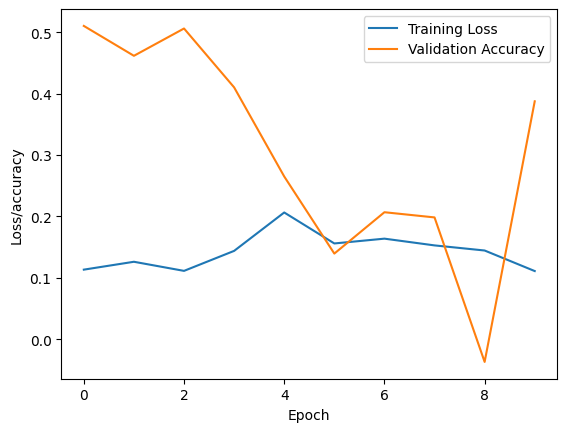

In [172]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # You can choose a different optimizer if you wish

# Resume a previous training session if applicable
if os.path.exists(CHECKPOINT_PATH):
    checkpoint = torch.load(CHECKPOINT_PATH)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    best_accuracy = checkpoint['accuracy']
    warnings.warn(f"\n\nFound model checkpoint at {CHECKPOINT_PATH}.\n"
                  f"Loaded model and optimizer from epoch {checkpoint['epoch']}.")
    warnings.warn(f"\n\nValidation accuracy: {checkpoint['accuracy']}")
    warnings.warn(f"\n\nLoss: {checkpoint['loss']}")
else:
    start_epoch = 1
    best_accuracy = float('-inf')
    warnings.warn("\n\nNo model checkpoint found.\nStarting from scratch.")

# IMPORTANT: Save/load the dataloaders to ensure same data order and data split across different runtimes
if os.path.exists(DATALOADER_PATH):
    checkpoint = torch.load(DATALOADER_PATH)
    train_dataloader = checkpoint['train_dataloader']
    val_dataloader = checkpoint['val_dataloader']
    test_dataloader = checkpoint['test_dataloader']
    warnings.warn(f"\n\nFound saved dataloaders at {DATALOADER_PATH}.\n"
                  f"Loaded dataloaders (specifying a previous data order and data slit).")
else:
    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_dataloader = DataLoader(val_data, batch_size=len(val_data), shuffle=False, collate_fn=collate_fn)
    test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, collate_fn=collate_fn)
    torch.save({
        'train_dataloader': train_dataloader,
        'val_dataloader': val_dataloader,
        'test_dataloader': test_dataloader,
    }, DATALOADER_PATH)
    warnings.warn("\n\nStarting with new data order and data slit.")


# Train the model
trained_model, loss_progress, val_progress = train_model(model, optimizer, train_dataloader, val_dataloader, epochs, best_accuracy)

# Plot the training loss and validation progression on the same graph over epochs
plt.plot(loss_progress, label='Training Loss')
plt.plot(val_progress, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/accuracy')
plt.legend()
plt.show()

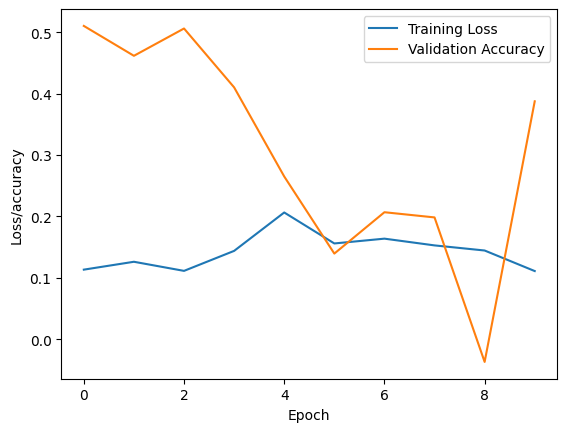

In [173]:
# Plot the training loss and validation progression on the same graph over epochs
plt.plot(loss_progress, label='Training Loss')
plt.plot(val_progress, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/accuracy')
plt.legend()
plt.show()

In [174]:
loss_with_epochs = [(loss, idx+1) for idx, loss in enumerate(loss_progress)]
sorted_loss = sorted(loss_with_epochs, key=lambda x: x[0])[:5]

print("5 epochs with lowest training loss:")
for loss, epoch in sorted_loss:
    print(f"Epoch {epoch}: {loss:.4f}")

print("\n5 epochs with highest validation accuracy:")
# For validation progress (higher is better)
val_with_epochs = [(val, idx+1) for idx, val in enumerate(val_progress)]
sorted_val = sorted(val_with_epochs, key=lambda x: x[0], reverse=True)[:5]

for val, epoch in sorted_val:
    print(f"Epoch {epoch}: {val:.4f}")

5 epochs with lowest training loss:
Epoch 10: 0.1109
Epoch 3: 0.1112
Epoch 1: 0.1132
Epoch 2: 0.1261
Epoch 4: 0.1438

5 epochs with highest validation accuracy:
Epoch 1: 0.5105
Epoch 3: 0.5063
Epoch 2: 0.4618
Epoch 4: 0.4103
Epoch 10: 0.3876


In [175]:
# Get the model's R-squared score on the test data, this step should be quite
# similar to what we have for the validation phase above
test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, collate_fn=collate_fn)
model.eval()
with torch.no_grad():
  for batch in test_dataloader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    generate_outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=10)
    decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    try:
      predicted_values = [float(pred) for pred in decoded_preds]
      actual_values = [float(label) for label in decoded_labels]
      test_score = sklearn.metrics.r2_score(predicted_values, actual_values)
    except ValueError:
      test_score = float('-inf')
print(f"Test Accuracy: {test_score:.4f}")

Test Accuracy: 0.7471


## Testing out different hyper-parameters - Hyperparameter Tuning

In [89]:
def plot_hyperparameter_results(results, parameter_type):
   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
   
   if parameter_type == 'learning_rate':
       # Group by learning rate
       lr_groups = {}
       for r in results:
           val = r['params']['learning_rate'] 
           score = r['best_val_score']
           if score != float('-inf'):
               if val not in lr_groups:
                   lr_groups[val] = []
               lr_groups[val].append(score)
       
       if lr_groups:
           ax1.boxplot(lr_groups.values())
           ax1.set_xticklabels([f"{lr:.0e}" for lr in lr_groups.keys()])
           ax1.set_title('Validation Score by Learning Rate')
           ax1.set_xlabel('Learning Rate')
           ax1.set_ylabel('Best Validation Score')
       
   
   elif parameter_type == 'batch_size':
       # Group by batch size
       batch_groups = {}
       for r in results:
           val = r['params']['batch_size']
           score = r['best_val_score']
           if score != float('-inf'):
               if val not in batch_groups:
                   batch_groups[val] = []
               batch_groups[val].append(score)
       
       if batch_groups:
           ax1.boxplot(batch_groups.values())
           ax1.set_xticklabels(batch_groups.keys())
           ax1.set_title('Validation Score by Batch Size')
           ax1.set_xlabel('Batch Size')
           ax1.set_ylabel('Best Validation Score')

   epoch_groups = {}
   for r in results:
       e = r['params']['epochs']
       score = r['best_val_score']
       if score != float('-inf'):  # Skip -inf values
           if e not in epoch_groups:
               epoch_groups[e] = []
           epoch_groups[e].append(score)
   if epoch_groups:  # Only plot if we have valid data
       ax2.boxplot(epoch_groups.values())
       ax2.set_xticklabels(epoch_groups.keys())
       ax2.set_title('Validation Score by Epochs')
       ax2.set_xlabel('Number of Epochs')
   
   plt.tight_layout()
   plt.show()

# # For learning rate tuning:
# plot_hyperparameter_results(results, 'learning_rate')

# # For batch size tuning:
# plot_hyperparameter_results(results, 'batch_size')

In [109]:
def plot_training_curves(all_training_curves):
    num_combinations = len(all_training_curves)
    num_cols = num_combinations
    num_rows = 1
    
    fig = plt.figure(figsize=(20, 5*num_rows))
    
    for idx, curves in enumerate(all_training_curves):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        
        # Plot training loss
        ax.plot(curves['loss_progress'], label='Training Loss', color='blue')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss', color='blue')
        
        # Plot validation accuracy on secondary y-axis
        ax2 = ax.twinx()
        
        # Replace -inf and negative values with 0, cap at 1.0
        val_prog = [min(max(-10, v) if v != float('-inf') else -10, 1.0) for v in curves['val_progress']]
        ax2.plot(val_prog, label='Validation Accuracy', color='red')
        ax2.set_ylabel('Validation Accuracy', color='red')
        ax2.set_ylim(-10, 1)
        
        # Title with hyperparameters
        params = curves['params']
        title = f"LR: {params['learning_rate']:.0e}\nBS: {params['batch_size']}\nEpochs: {params['epochs']}"
        ax.set_title(title)
        
        # Add legend
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [105]:
import itertools

def run_hyperparameter_tuning(hyperparameters):
    # Define hyperparameter grid
    # hyperparameters = {
    #     'learning_rate': [1e-3, 1e-4, 1e-5],
    #     'batch_size': [16, 32, 64],
    #     'epochs': [50]
    # }
    
    # Create all combinations of hyperparameters
    param_combinations = [dict(zip(hyperparameters.keys(), v)) for v in itertools.product(*hyperparameters.values())]
    
    # Store results and training curves
    results = []
    all_training_curves = []
    
    # Test each combination
    for params in param_combinations:
        print(f"\nTesting parameters: {params}")
        
        # Initialize model and optimizer
        model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)
        optimizer = torch.optim.AdamW(model.parameters(), lr=params['learning_rate'])
        
        # Create dataloaders with new batch size
        train_dataloader = DataLoader(train_data, batch_size=params['batch_size'], 
                                    shuffle=True, collate_fn=collate_fn)
        val_dataloader = DataLoader(val_data, batch_size=len(val_data), 
                                  shuffle=False, collate_fn=collate_fn)
        
        # Train model
        trained_model, loss_prog, val_prog = train_model(
            model=model,
            optimizer=optimizer,
            train_dataloader=train_dataloader,
            val_dataloader=val_dataloader,
            epochs=params['epochs'],
            best_accuracy=float('-inf')
        )
        
        # Store results and training curves
        results.append({
            'params': params,
            'best_val_score': max(val_prog),
            'final_loss': loss_prog[-1]
        })
        
        all_training_curves.append({
            'params': params,
            'loss_progress': loss_prog,
            'val_progress': val_prog
        })
        
        print(f"Best validation score: {max(val_prog):.4f}")
        print(f"Final training loss: {loss_prog[-1]:.4f}")
    
    return results, all_training_curves

### Learning Rate Tuning

In [93]:
# First, test different learning rates
lr_hyperparameters = {
    'learning_rate': [5e-3, 1e-3, 5e-4, 1e-4],
    'batch_size': [32],  # Fixed batch size
    'epochs': [50]       # Fixed number of epochs
}

# Run training for learning rates
lr_results, lr_curves = run_hyperparameter_tuning(lr_hyperparameters)


Testing parameters: {'learning_rate': 0.005, 'batch_size': 32, 'epochs': 50}


Epoch 1/50 - Avg. Training Loss: 3.7536


Epoch 1/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/50 - Avg. Training Loss: 1.6693


Epoch 2/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 3/50 - Avg. Training Loss: 1.6034


Epoch 3/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 4/50 - Avg. Training Loss: 1.5167


Epoch 4/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 5/50 - Avg. Training Loss: 1.5883


Epoch 5/50 - Avg. Validation Accuracy: -406.5450


Epoch 6/50 - Avg. Training Loss: 1.5692


Epoch 6/50 - Avg. Validation Accuracy: -584.6149


Epoch 7/50 - Avg. Training Loss: 1.5245


Epoch 7/50 - Avg. Validation Accuracy: -11.9141


Epoch 8/50 - Avg. Training Loss: 1.4354


Epoch 8/50 - Avg. Validation Accuracy: -1.5963


Epoch 9/50 - Avg. Training Loss: 1.4166


Epoch 9/50 - Avg. Validation Accuracy: -3.2054


Epoch 10/50 - Avg. Training Loss: 1.3464


Epoch 10/50 - Avg. Validation Accuracy: -3.3235


Epoch 11/50 - Avg. Training Loss: 1.3146


Epoch 11/50 - Avg. Validation Accuracy: 0.3279
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 12/50 - Avg. Training Loss: 1.2892


Epoch 12/50 - Avg. Validation Accuracy: 0.5246
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 13/50 - Avg. Training Loss: 1.2532


Epoch 13/50 - Avg. Validation Accuracy: 0.2761


Epoch 14/50 - Avg. Training Loss: 1.3229


Epoch 14/50 - Avg. Validation Accuracy: -5.8867


Epoch 15/50 - Avg. Training Loss: 1.3509


Epoch 15/50 - Avg. Validation Accuracy: 0.4603


Epoch 16/50 - Avg. Training Loss: 1.2120


Epoch 16/50 - Avg. Validation Accuracy: 0.3181


Epoch 17/50 - Avg. Training Loss: 1.2515


Epoch 17/50 - Avg. Validation Accuracy: -1.1312


Epoch 18/50 - Avg. Training Loss: 1.2199


Epoch 18/50 - Avg. Validation Accuracy: 0.2128


Epoch 19/50 - Avg. Training Loss: 1.1794


Epoch 19/50 - Avg. Validation Accuracy: 0.2170


Epoch 20/50 - Avg. Training Loss: 1.1932


Epoch 20/50 - Avg. Validation Accuracy: -0.3054


Epoch 21/50 - Avg. Training Loss: 1.1357


Epoch 21/50 - Avg. Validation Accuracy: 0.3216


Epoch 22/50 - Avg. Training Loss: 1.1227


Epoch 22/50 - Avg. Validation Accuracy: 0.5303
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 23/50 - Avg. Training Loss: 1.1167


Epoch 23/50 - Avg. Validation Accuracy: 0.3548


Epoch 24/50 - Avg. Training Loss: 1.1834


Epoch 24/50 - Avg. Validation Accuracy: 0.2520


Epoch 25/50 - Avg. Training Loss: 1.0590


Epoch 25/50 - Avg. Validation Accuracy: 0.3832


Epoch 26/50 - Avg. Training Loss: 0.9596


Epoch 26/50 - Avg. Validation Accuracy: 0.4352


Epoch 27/50 - Avg. Training Loss: 0.8970


Epoch 27/50 - Avg. Validation Accuracy: 0.2973


Epoch 28/50 - Avg. Training Loss: 0.8893


Epoch 28/50 - Avg. Validation Accuracy: 0.4417


Epoch 29/50 - Avg. Training Loss: 0.8318


Epoch 29/50 - Avg. Validation Accuracy: 0.4120


Epoch 30/50 - Avg. Training Loss: 0.7789


Epoch 30/50 - Avg. Validation Accuracy: 0.0650


Epoch 31/50 - Avg. Training Loss: 0.8140


Epoch 31/50 - Avg. Validation Accuracy: 0.2605


Epoch 32/50 - Avg. Training Loss: 0.7605


Epoch 32/50 - Avg. Validation Accuracy: 0.4131


Epoch 33/50 - Avg. Training Loss: 0.6727


Epoch 33/50 - Avg. Validation Accuracy: 0.4287


Epoch 34/50 - Avg. Training Loss: 0.6909


Epoch 34/50 - Avg. Validation Accuracy: 0.4162


Epoch 35/50 - Avg. Training Loss: 0.6542


Epoch 35/50 - Avg. Validation Accuracy: 0.3543


Epoch 36/50 - Avg. Training Loss: 0.6563


Epoch 36/50 - Avg. Validation Accuracy: 0.2013


Epoch 37/50 - Avg. Training Loss: 0.5992


Epoch 37/50 - Avg. Validation Accuracy: 0.4443


Epoch 38/50 - Avg. Training Loss: 0.6799


Epoch 38/50 - Avg. Validation Accuracy: 0.4007


Epoch 39/50 - Avg. Training Loss: 0.5127


Epoch 39/50 - Avg. Validation Accuracy: 0.4630


Epoch 40/50 - Avg. Training Loss: 0.5124


Epoch 40/50 - Avg. Validation Accuracy: 0.3399


Epoch 41/50 - Avg. Training Loss: 0.4713


Epoch 41/50 - Avg. Validation Accuracy: 0.2741


Epoch 42/50 - Avg. Training Loss: 0.4375


Epoch 42/50 - Avg. Validation Accuracy: 0.3787


Epoch 43/50 - Avg. Training Loss: 0.3614


Epoch 43/50 - Avg. Validation Accuracy: 0.2733


Epoch 44/50 - Avg. Training Loss: 0.5282


Epoch 44/50 - Avg. Validation Accuracy: 0.2463


Epoch 45/50 - Avg. Training Loss: 0.5057


Epoch 45/50 - Avg. Validation Accuracy: 0.4740


Epoch 46/50 - Avg. Training Loss: 0.4732


Epoch 46/50 - Avg. Validation Accuracy: 0.3486


Epoch 47/50 - Avg. Training Loss: 0.3795


Epoch 47/50 - Avg. Validation Accuracy: 0.4270


Epoch 48/50 - Avg. Training Loss: 0.3253


Epoch 48/50 - Avg. Validation Accuracy: 0.0914


Epoch 49/50 - Avg. Training Loss: 0.3630


Epoch 49/50 - Avg. Validation Accuracy: 0.3433


Epoch 50/50 - Avg. Training Loss: 0.3057


Epoch 50/50 - Avg. Validation Accuracy: 0.2997
Best validation score: 0.5303
Final training loss: 0.3057

Testing parameters: {'learning_rate': 0.001, 'batch_size': 32, 'epochs': 50}


Epoch 1/50 - Avg. Training Loss: 3.1732


Epoch 1/50 - Avg. Validation Accuracy: -92.5473
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/50 - Avg. Training Loss: 1.7273


Epoch 2/50 - Avg. Validation Accuracy: -441.3456


Epoch 3/50 - Avg. Training Loss: 1.5814


Epoch 3/50 - Avg. Validation Accuracy: -27.3151
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 4/50 - Avg. Training Loss: 1.5477


Epoch 4/50 - Avg. Validation Accuracy: -39.4224


Epoch 5/50 - Avg. Training Loss: 1.5074


Epoch 5/50 - Avg. Validation Accuracy: -119.2445


Epoch 6/50 - Avg. Training Loss: 1.5111


Epoch 6/50 - Avg. Validation Accuracy: -70.1001


Epoch 7/50 - Avg. Training Loss: 1.4629


Epoch 7/50 - Avg. Validation Accuracy: -5.1312
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 8/50 - Avg. Training Loss: 1.4085


Epoch 8/50 - Avg. Validation Accuracy: -3.7885
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 9/50 - Avg. Training Loss: 1.3984


Epoch 9/50 - Avg. Validation Accuracy: -0.9115
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 10/50 - Avg. Training Loss: 1.4238


Epoch 10/50 - Avg. Validation Accuracy: -1.9214


Epoch 11/50 - Avg. Training Loss: 1.3719


Epoch 11/50 - Avg. Validation Accuracy: -3.1782


Epoch 12/50 - Avg. Training Loss: 1.4015


Epoch 12/50 - Avg. Validation Accuracy: -2.7910


Epoch 13/50 - Avg. Training Loss: 1.3368


Epoch 13/50 - Avg. Validation Accuracy: -2.0277


Epoch 14/50 - Avg. Training Loss: 1.3365


Epoch 14/50 - Avg. Validation Accuracy: -2.3779


Epoch 15/50 - Avg. Training Loss: 1.3413


Epoch 15/50 - Avg. Validation Accuracy: 0.0093
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 16/50 - Avg. Training Loss: 1.3461


Epoch 16/50 - Avg. Validation Accuracy: -0.3989


Epoch 17/50 - Avg. Training Loss: 1.2500


Epoch 17/50 - Avg. Validation Accuracy: 0.0016


Epoch 18/50 - Avg. Training Loss: 1.2646


Epoch 18/50 - Avg. Validation Accuracy: 0.2211
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 19/50 - Avg. Training Loss: 1.1587


Epoch 19/50 - Avg. Validation Accuracy: 0.2460
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 20/50 - Avg. Training Loss: 1.1869


Epoch 20/50 - Avg. Validation Accuracy: -0.1484


Epoch 21/50 - Avg. Training Loss: 1.1579


Epoch 21/50 - Avg. Validation Accuracy: 0.3182
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 22/50 - Avg. Training Loss: 1.1027


Epoch 22/50 - Avg. Validation Accuracy: 0.4216
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 23/50 - Avg. Training Loss: 1.0536


Epoch 23/50 - Avg. Validation Accuracy: 0.3025


Epoch 24/50 - Avg. Training Loss: 0.9835


Epoch 24/50 - Avg. Validation Accuracy: 0.1518


Epoch 25/50 - Avg. Training Loss: 0.9902


Epoch 25/50 - Avg. Validation Accuracy: 0.4454
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 26/50 - Avg. Training Loss: 0.9507


Epoch 26/50 - Avg. Validation Accuracy: 0.1011


Epoch 27/50 - Avg. Training Loss: 0.9188


Epoch 27/50 - Avg. Validation Accuracy: 0.3504


Epoch 28/50 - Avg. Training Loss: 0.9292


Epoch 28/50 - Avg. Validation Accuracy: 0.2672


Epoch 29/50 - Avg. Training Loss: 1.0140


Epoch 29/50 - Avg. Validation Accuracy: 0.0067


Epoch 30/50 - Avg. Training Loss: 0.8945


Epoch 30/50 - Avg. Validation Accuracy: 0.4661
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 31/50 - Avg. Training Loss: 0.7913


Epoch 31/50 - Avg. Validation Accuracy: 0.2406


Epoch 32/50 - Avg. Training Loss: 0.7601


Epoch 32/50 - Avg. Validation Accuracy: 0.2337


Epoch 33/50 - Avg. Training Loss: 0.7732


Epoch 33/50 - Avg. Validation Accuracy: 0.3024


Epoch 34/50 - Avg. Training Loss: 0.7319


Epoch 34/50 - Avg. Validation Accuracy: 0.1175


Epoch 35/50 - Avg. Training Loss: 0.6507


Epoch 35/50 - Avg. Validation Accuracy: 0.2966


Epoch 36/50 - Avg. Training Loss: 0.5773


Epoch 36/50 - Avg. Validation Accuracy: 0.3342


Epoch 37/50 - Avg. Training Loss: 0.5490


Epoch 37/50 - Avg. Validation Accuracy: 0.2493


Epoch 38/50 - Avg. Training Loss: 0.4894


Epoch 38/50 - Avg. Validation Accuracy: -0.0174


Epoch 39/50 - Avg. Training Loss: 0.4379


Epoch 39/50 - Avg. Validation Accuracy: 0.2833


Epoch 40/50 - Avg. Training Loss: 0.3897


Epoch 40/50 - Avg. Validation Accuracy: 0.3514


Epoch 41/50 - Avg. Training Loss: 0.3509


Epoch 41/50 - Avg. Validation Accuracy: 0.2367


Epoch 42/50 - Avg. Training Loss: 0.3163


Epoch 42/50 - Avg. Validation Accuracy: 0.2546


Epoch 43/50 - Avg. Training Loss: 0.2856


Epoch 43/50 - Avg. Validation Accuracy: 0.3092


Epoch 44/50 - Avg. Training Loss: 0.2492


Epoch 44/50 - Avg. Validation Accuracy: 0.2781


Epoch 45/50 - Avg. Training Loss: 0.2350


Epoch 45/50 - Avg. Validation Accuracy: -0.0316


Epoch 46/50 - Avg. Training Loss: 0.2540


Epoch 46/50 - Avg. Validation Accuracy: 0.0859


Epoch 47/50 - Avg. Training Loss: 0.2112


Epoch 47/50 - Avg. Validation Accuracy: -0.3511


Epoch 48/50 - Avg. Training Loss: 0.1572


Epoch 48/50 - Avg. Validation Accuracy: 0.2702


Epoch 49/50 - Avg. Training Loss: 0.1542


Epoch 49/50 - Avg. Validation Accuracy: 0.2874


Epoch 50/50 - Avg. Training Loss: 0.1440


Epoch 50/50 - Avg. Validation Accuracy: 0.1726
Best validation score: 0.4661
Final training loss: 0.1440

Testing parameters: {'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 50}


Epoch 1/50 - Avg. Training Loss: 3.9724


Epoch 1/50 - Avg. Validation Accuracy: -4.7872
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/50 - Avg. Training Loss: 1.8592


Epoch 2/50 - Avg. Validation Accuracy: -41.3996


Epoch 3/50 - Avg. Training Loss: 1.7404


Epoch 3/50 - Avg. Validation Accuracy: -28.3764


Epoch 4/50 - Avg. Training Loss: 1.6595


Epoch 4/50 - Avg. Validation Accuracy: -93.0223


Epoch 5/50 - Avg. Training Loss: 1.5555


Epoch 5/50 - Avg. Validation Accuracy: -13.3518


Epoch 6/50 - Avg. Training Loss: 1.5724


Epoch 6/50 - Avg. Validation Accuracy: -14.8433


Epoch 7/50 - Avg. Training Loss: 1.5565


Epoch 7/50 - Avg. Validation Accuracy: -12.4268


Epoch 8/50 - Avg. Training Loss: 1.5495


Epoch 8/50 - Avg. Validation Accuracy: -3.4732
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 9/50 - Avg. Training Loss: 1.4451


Epoch 9/50 - Avg. Validation Accuracy: -1.3753
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 10/50 - Avg. Training Loss: 1.4712


Epoch 10/50 - Avg. Validation Accuracy: -1.7312


Epoch 11/50 - Avg. Training Loss: 1.4289


Epoch 11/50 - Avg. Validation Accuracy: -1.5432


Epoch 12/50 - Avg. Training Loss: 1.4584


Epoch 12/50 - Avg. Validation Accuracy: -1.3474
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 13/50 - Avg. Training Loss: 1.3615


Epoch 13/50 - Avg. Validation Accuracy: -0.3415
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 14/50 - Avg. Training Loss: 1.3461


Epoch 14/50 - Avg. Validation Accuracy: -2.2345


Epoch 15/50 - Avg. Training Loss: 1.3413


Epoch 15/50 - Avg. Validation Accuracy: -1.2441


Epoch 16/50 - Avg. Training Loss: 1.3136


Epoch 16/50 - Avg. Validation Accuracy: -0.1627
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 17/50 - Avg. Training Loss: 1.3412


Epoch 17/50 - Avg. Validation Accuracy: -0.2587


Epoch 18/50 - Avg. Training Loss: 1.2824


Epoch 18/50 - Avg. Validation Accuracy: 0.2459
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 19/50 - Avg. Training Loss: 1.2754


Epoch 19/50 - Avg. Validation Accuracy: -0.1368


Epoch 20/50 - Avg. Training Loss: 1.2197


Epoch 20/50 - Avg. Validation Accuracy: 0.1718


Epoch 21/50 - Avg. Training Loss: 1.2014


Epoch 21/50 - Avg. Validation Accuracy: 0.1793


Epoch 22/50 - Avg. Training Loss: 1.2444


Epoch 22/50 - Avg. Validation Accuracy: 0.2821
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 23/50 - Avg. Training Loss: 1.1881


Epoch 23/50 - Avg. Validation Accuracy: 0.0908


Epoch 24/50 - Avg. Training Loss: 1.1609


Epoch 24/50 - Avg. Validation Accuracy: 0.0062


Epoch 25/50 - Avg. Training Loss: 1.1233


Epoch 25/50 - Avg. Validation Accuracy: 0.2786


Epoch 26/50 - Avg. Training Loss: 1.0814


Epoch 26/50 - Avg. Validation Accuracy: 0.2121


Epoch 27/50 - Avg. Training Loss: 0.9962


Epoch 27/50 - Avg. Validation Accuracy: 0.3696
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 28/50 - Avg. Training Loss: 1.0807


Epoch 28/50 - Avg. Validation Accuracy: 0.1805


Epoch 29/50 - Avg. Training Loss: 1.0406


Epoch 29/50 - Avg. Validation Accuracy: 0.1222


Epoch 30/50 - Avg. Training Loss: 0.9735


Epoch 30/50 - Avg. Validation Accuracy: 0.4025
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 31/50 - Avg. Training Loss: 0.9479


Epoch 31/50 - Avg. Validation Accuracy: 0.3996


Epoch 32/50 - Avg. Training Loss: 0.9877


Epoch 32/50 - Avg. Validation Accuracy: 0.4025
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 33/50 - Avg. Training Loss: 0.8891


Epoch 33/50 - Avg. Validation Accuracy: 0.2130


Epoch 34/50 - Avg. Training Loss: 0.9050


Epoch 34/50 - Avg. Validation Accuracy: 0.3176


Epoch 35/50 - Avg. Training Loss: 0.7901


Epoch 35/50 - Avg. Validation Accuracy: 0.2238


Epoch 36/50 - Avg. Training Loss: 0.8374


Epoch 36/50 - Avg. Validation Accuracy: 0.1768


Epoch 37/50 - Avg. Training Loss: 0.8160


Epoch 37/50 - Avg. Validation Accuracy: 0.2597


Epoch 38/50 - Avg. Training Loss: 0.9323


Epoch 38/50 - Avg. Validation Accuracy: -1.2725


Epoch 39/50 - Avg. Training Loss: 1.2850


Epoch 39/50 - Avg. Validation Accuracy: -0.4724


Epoch 40/50 - Avg. Training Loss: 1.1314


Epoch 40/50 - Avg. Validation Accuracy: -0.2775


Epoch 41/50 - Avg. Training Loss: 0.9756


Epoch 41/50 - Avg. Validation Accuracy: 0.1994


Epoch 42/50 - Avg. Training Loss: 0.9370


Epoch 42/50 - Avg. Validation Accuracy: 0.0740


Epoch 43/50 - Avg. Training Loss: 0.8343


Epoch 43/50 - Avg. Validation Accuracy: 0.1713


Epoch 44/50 - Avg. Training Loss: 0.8019


Epoch 44/50 - Avg. Validation Accuracy: 0.1880


Epoch 45/50 - Avg. Training Loss: 0.7848


Epoch 45/50 - Avg. Validation Accuracy: 0.2899


Epoch 46/50 - Avg. Training Loss: 0.7245


Epoch 46/50 - Avg. Validation Accuracy: 0.0861


Epoch 47/50 - Avg. Training Loss: 0.6960


Epoch 47/50 - Avg. Validation Accuracy: 0.1507


Epoch 48/50 - Avg. Training Loss: 0.7176


Epoch 48/50 - Avg. Validation Accuracy: 0.0932


Epoch 49/50 - Avg. Training Loss: 0.6159


Epoch 49/50 - Avg. Validation Accuracy: 0.2603


Epoch 50/50 - Avg. Training Loss: 0.5582


Epoch 50/50 - Avg. Validation Accuracy: 0.1314
Best validation score: 0.4025
Final training loss: 0.5582

Testing parameters: {'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 50}


Epoch 1/50 - Avg. Training Loss: 6.7605


Epoch 1/50 - Avg. Validation Accuracy: -inf
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/50 - Avg. Training Loss: 3.3910


Epoch 2/50 - Avg. Validation Accuracy: -inf
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 3/50 - Avg. Training Loss: 2.4823


Epoch 3/50 - Avg. Validation Accuracy: -inf
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 4/50 - Avg. Training Loss: 2.1649


Epoch 4/50 - Avg. Validation Accuracy: -3.7909
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 5/50 - Avg. Training Loss: 1.9822


Epoch 5/50 - Avg. Validation Accuracy: -12.5151


Epoch 6/50 - Avg. Training Loss: 1.8931


Epoch 6/50 - Avg. Validation Accuracy: -13.6750


Epoch 7/50 - Avg. Training Loss: 1.7702


Epoch 7/50 - Avg. Validation Accuracy: -86.4530


Epoch 8/50 - Avg. Training Loss: 1.8260


Epoch 8/50 - Avg. Validation Accuracy: -87.1176


Epoch 9/50 - Avg. Training Loss: 1.6966


Epoch 9/50 - Avg. Validation Accuracy: -91.9977


Epoch 10/50 - Avg. Training Loss: 1.6907


Epoch 10/50 - Avg. Validation Accuracy: -103.6598


Epoch 11/50 - Avg. Training Loss: 1.7269


Epoch 11/50 - Avg. Validation Accuracy: -82.0708


Epoch 12/50 - Avg. Training Loss: 1.6751


Epoch 12/50 - Avg. Validation Accuracy: -59.4770


Epoch 13/50 - Avg. Training Loss: 1.6383


Epoch 13/50 - Avg. Validation Accuracy: -96.4347


Epoch 14/50 - Avg. Training Loss: 1.5766


Epoch 14/50 - Avg. Validation Accuracy: -68.6249


Epoch 15/50 - Avg. Training Loss: 1.5867


Epoch 15/50 - Avg. Validation Accuracy: -52.6822


Epoch 16/50 - Avg. Training Loss: 1.6392


Epoch 16/50 - Avg. Validation Accuracy: -53.7104


Epoch 17/50 - Avg. Training Loss: 1.5606


Epoch 17/50 - Avg. Validation Accuracy: -15.6672


Epoch 18/50 - Avg. Training Loss: 1.5196


Epoch 18/50 - Avg. Validation Accuracy: -15.7588


Epoch 19/50 - Avg. Training Loss: 1.5830


Epoch 19/50 - Avg. Validation Accuracy: -15.1195


Epoch 20/50 - Avg. Training Loss: 1.6077


Epoch 20/50 - Avg. Validation Accuracy: -16.4940


Epoch 21/50 - Avg. Training Loss: 1.5733


Epoch 21/50 - Avg. Validation Accuracy: -15.5635


Epoch 22/50 - Avg. Training Loss: 1.5327


Epoch 22/50 - Avg. Validation Accuracy: -16.7457


Epoch 23/50 - Avg. Training Loss: 1.4652


Epoch 23/50 - Avg. Validation Accuracy: -4.0300


Epoch 24/50 - Avg. Training Loss: 1.5258


Epoch 24/50 - Avg. Validation Accuracy: -1.8070
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 25/50 - Avg. Training Loss: 1.5142


Epoch 25/50 - Avg. Validation Accuracy: -1.7586
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 26/50 - Avg. Training Loss: 1.5510


Epoch 26/50 - Avg. Validation Accuracy: -1.4232
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 27/50 - Avg. Training Loss: 1.4886


Epoch 27/50 - Avg. Validation Accuracy: -1.4833


Epoch 28/50 - Avg. Training Loss: 1.4619


Epoch 28/50 - Avg. Validation Accuracy: -1.5780


Epoch 29/50 - Avg. Training Loss: 1.4658


Epoch 29/50 - Avg. Validation Accuracy: -1.1771
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 30/50 - Avg. Training Loss: 1.4118


Epoch 30/50 - Avg. Validation Accuracy: -1.6744


Epoch 31/50 - Avg. Training Loss: 1.5011


Epoch 31/50 - Avg. Validation Accuracy: -1.6264


Epoch 32/50 - Avg. Training Loss: 1.4696


Epoch 32/50 - Avg. Validation Accuracy: -0.8904
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 33/50 - Avg. Training Loss: 1.4515


Epoch 33/50 - Avg. Validation Accuracy: -0.8238
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 34/50 - Avg. Training Loss: 1.4493


Epoch 34/50 - Avg. Validation Accuracy: -0.9478


Epoch 35/50 - Avg. Training Loss: 1.3691


Epoch 35/50 - Avg. Validation Accuracy: -0.8332


Epoch 36/50 - Avg. Training Loss: 1.4107


Epoch 36/50 - Avg. Validation Accuracy: -1.0617


Epoch 37/50 - Avg. Training Loss: 1.3820


Epoch 37/50 - Avg. Validation Accuracy: -1.6687


Epoch 38/50 - Avg. Training Loss: 1.3863


Epoch 38/50 - Avg. Validation Accuracy: -0.7798
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 39/50 - Avg. Training Loss: 1.4215


Epoch 39/50 - Avg. Validation Accuracy: -0.9383


Epoch 40/50 - Avg. Training Loss: 1.4488


Epoch 40/50 - Avg. Validation Accuracy: -0.6130
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 41/50 - Avg. Training Loss: 1.4227


Epoch 41/50 - Avg. Validation Accuracy: -0.4947
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 42/50 - Avg. Training Loss: 1.3961


Epoch 42/50 - Avg. Validation Accuracy: -0.8581


Epoch 43/50 - Avg. Training Loss: 1.4043


Epoch 43/50 - Avg. Validation Accuracy: -0.2215
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 44/50 - Avg. Training Loss: 1.3460


Epoch 44/50 - Avg. Validation Accuracy: -0.1884
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 45/50 - Avg. Training Loss: 1.3931


Epoch 45/50 - Avg. Validation Accuracy: -0.8287


Epoch 46/50 - Avg. Training Loss: 1.3429


Epoch 46/50 - Avg. Validation Accuracy: -0.2083


Epoch 47/50 - Avg. Training Loss: 1.3680


Epoch 47/50 - Avg. Validation Accuracy: -0.0693
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 48/50 - Avg. Training Loss: 1.2866


Epoch 48/50 - Avg. Validation Accuracy: 0.0645
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 49/50 - Avg. Training Loss: 1.3698


Epoch 49/50 - Avg. Validation Accuracy: -0.5713


Epoch 50/50 - Avg. Training Loss: 1.3689


Epoch 50/50 - Avg. Validation Accuracy: -0.0723
Best validation score: 0.0645
Final training loss: 1.3689


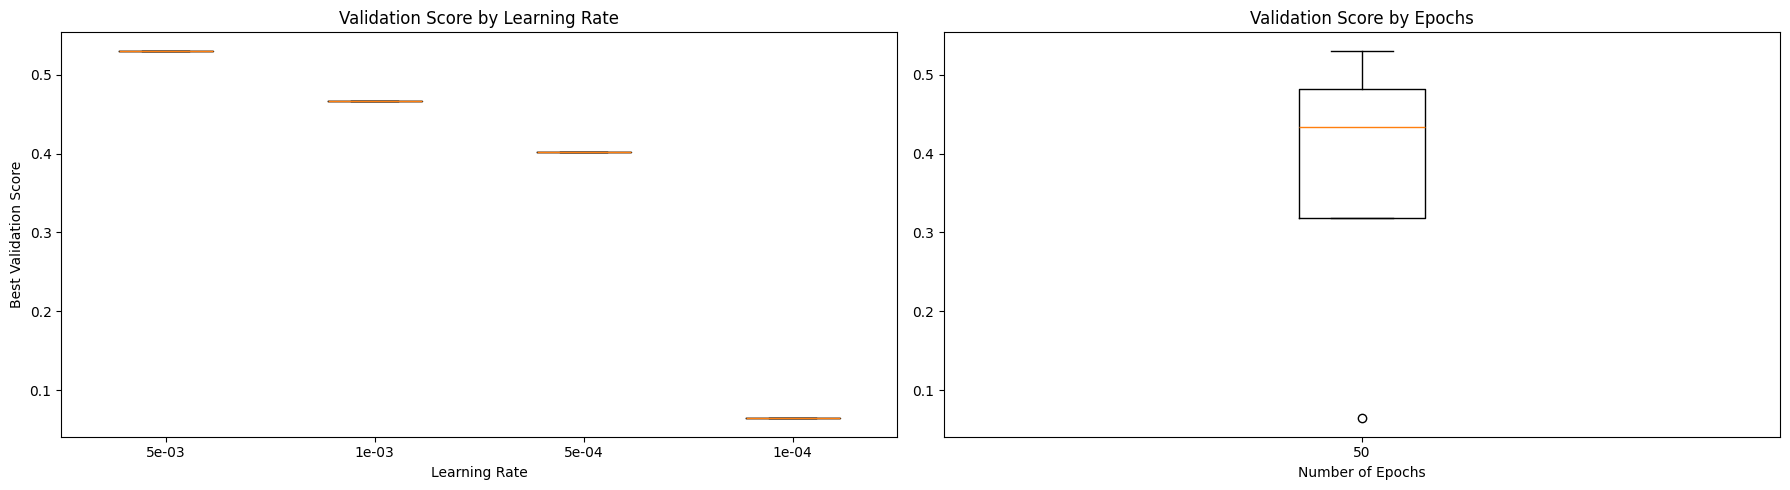

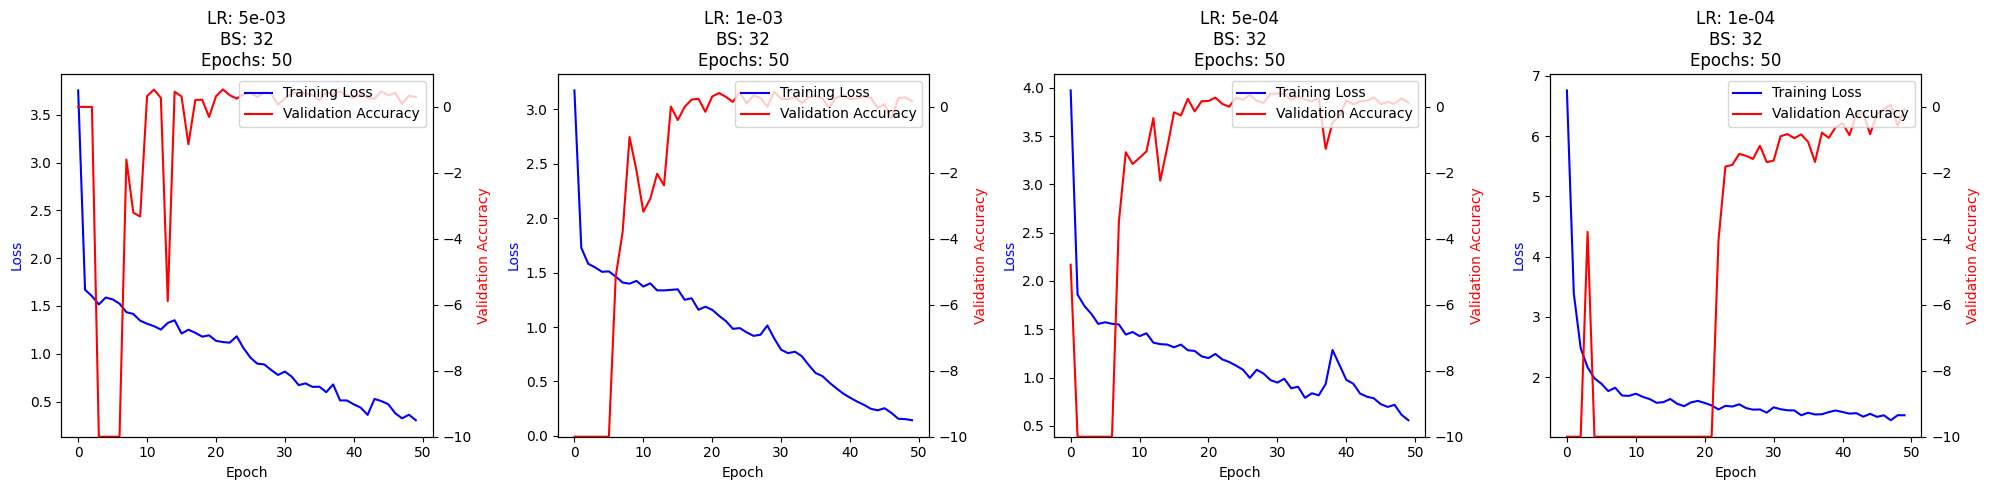


Best learning rate found: 5e-03


In [110]:
# Plot results for learning rates
plot_hyperparameter_results(lr_results, 'learning_rate')
plot_training_curves(lr_curves)

# Find best learning rate
valid_results = [r for r in lr_results if r['best_val_score'] != float('-inf')]
best_lr = sorted(valid_results, key=lambda x: x['best_val_score'], reverse=True)[0]['params']['learning_rate']
print(f"\nBest learning rate found: {best_lr:.0e}")

### Batch Size Tuning

In [95]:
# Use best learning rate to test batch sizes
bs_hyperparameters = {
    'learning_rate': [best_lr],  # Best learning rate from previous step
    'batch_size': [16, 32, 64],  # Test different batch sizes
    'epochs': [50]               # Fixed number of epochs
}

# Run training for batch sizes
bs_results, bs_curves = run_hyperparameter_tuning(bs_hyperparameters)


Testing parameters: {'learning_rate': 0.005, 'batch_size': 16, 'epochs': 50}


Epoch 1/50 - Avg. Training Loss: 2.8011


Epoch 1/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/50 - Avg. Training Loss: 1.7069


Epoch 2/50 - Avg. Validation Accuracy: -1329184473114307804341708259328.0000


Epoch 3/50 - Avg. Training Loss: 1.6877


Epoch 3/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 4/50 - Avg. Training Loss: 1.6055


Epoch 4/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 5/50 - Avg. Training Loss: 1.6388


Epoch 5/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 6/50 - Avg. Training Loss: 1.6205


Epoch 6/50 - Avg. Validation Accuracy: -5284860208245610411328184254464.0000


Epoch 7/50 - Avg. Training Loss: 1.6306


Epoch 7/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 8/50 - Avg. Training Loss: 1.5941


Epoch 8/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 9/50 - Avg. Training Loss: 1.6136


Epoch 9/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 10/50 - Avg. Training Loss: 1.5429


Epoch 10/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 11/50 - Avg. Training Loss: 1.5542


Epoch 11/50 - Avg. Validation Accuracy: -5284860208245610411328184254464.0000


Epoch 12/50 - Avg. Training Loss: 1.5638


Epoch 12/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 13/50 - Avg. Training Loss: 1.6070


Epoch 13/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 14/50 - Avg. Training Loss: 1.5974


Epoch 14/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 15/50 - Avg. Training Loss: 1.6079


Epoch 15/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 16/50 - Avg. Training Loss: 1.5888


Epoch 16/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 17/50 - Avg. Training Loss: 1.5873


Epoch 17/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 18/50 - Avg. Training Loss: 1.5279


Epoch 18/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 19/50 - Avg. Training Loss: 1.5321


Epoch 19/50 - Avg. Validation Accuracy: -15.3544


Epoch 20/50 - Avg. Training Loss: 1.5443


Epoch 20/50 - Avg. Validation Accuracy: -332.3106


Epoch 21/50 - Avg. Training Loss: 1.4744


Epoch 21/50 - Avg. Validation Accuracy: -97.0925


Epoch 22/50 - Avg. Training Loss: 1.4996


Epoch 22/50 - Avg. Validation Accuracy: -3.2976


Epoch 23/50 - Avg. Training Loss: 1.4665


Epoch 23/50 - Avg. Validation Accuracy: -18.7222


Epoch 24/50 - Avg. Training Loss: 1.4503


Epoch 24/50 - Avg. Validation Accuracy: -3.6314


Epoch 25/50 - Avg. Training Loss: 1.4637


Epoch 25/50 - Avg. Validation Accuracy: -1.4743


Epoch 26/50 - Avg. Training Loss: 1.4592


Epoch 26/50 - Avg. Validation Accuracy: -3.5400


Epoch 27/50 - Avg. Training Loss: 1.4924


Epoch 27/50 - Avg. Validation Accuracy: -5.7803


Epoch 28/50 - Avg. Training Loss: 1.4360


Epoch 28/50 - Avg. Validation Accuracy: -4.0343


Epoch 29/50 - Avg. Training Loss: 1.4269


Epoch 29/50 - Avg. Validation Accuracy: -3.3545


Epoch 30/50 - Avg. Training Loss: 1.4274


Epoch 30/50 - Avg. Validation Accuracy: -3.8417


Epoch 31/50 - Avg. Training Loss: 1.4085


Epoch 31/50 - Avg. Validation Accuracy: -3.4183


Epoch 32/50 - Avg. Training Loss: 1.4206


Epoch 32/50 - Avg. Validation Accuracy: -4.0619


Epoch 33/50 - Avg. Training Loss: 1.4297


Epoch 33/50 - Avg. Validation Accuracy: -3.5503


Epoch 34/50 - Avg. Training Loss: 1.4351


Epoch 34/50 - Avg. Validation Accuracy: -2.4286


Epoch 35/50 - Avg. Training Loss: 1.4372


Epoch 35/50 - Avg. Validation Accuracy: -2.9587


Epoch 36/50 - Avg. Training Loss: 1.3883


Epoch 36/50 - Avg. Validation Accuracy: -4.5903


Epoch 37/50 - Avg. Training Loss: 1.4232


Epoch 37/50 - Avg. Validation Accuracy: -3.0625


Epoch 38/50 - Avg. Training Loss: 1.4447


Epoch 38/50 - Avg. Validation Accuracy: -1.9550


Epoch 39/50 - Avg. Training Loss: 1.4306


Epoch 39/50 - Avg. Validation Accuracy: -3.3507


Epoch 40/50 - Avg. Training Loss: 1.4833


Epoch 40/50 - Avg. Validation Accuracy: -3.7127


Epoch 41/50 - Avg. Training Loss: 1.4487


Epoch 41/50 - Avg. Validation Accuracy: -2.4249


Epoch 42/50 - Avg. Training Loss: 1.4260


Epoch 42/50 - Avg. Validation Accuracy: -2.9664


Epoch 43/50 - Avg. Training Loss: 1.4251


Epoch 43/50 - Avg. Validation Accuracy: -4.1691


Epoch 44/50 - Avg. Training Loss: 1.4096


Epoch 44/50 - Avg. Validation Accuracy: -2.5476


Epoch 45/50 - Avg. Training Loss: 1.4095


Epoch 45/50 - Avg. Validation Accuracy: -2.9098


Epoch 46/50 - Avg. Training Loss: 1.4271


Epoch 46/50 - Avg. Validation Accuracy: -2.2773


Epoch 47/50 - Avg. Training Loss: 1.3793


Epoch 47/50 - Avg. Validation Accuracy: -2.8235


Epoch 48/50 - Avg. Training Loss: 1.3707


Epoch 48/50 - Avg. Validation Accuracy: -1.5569


Epoch 49/50 - Avg. Training Loss: 1.4166


Epoch 49/50 - Avg. Validation Accuracy: -2.6118


Epoch 50/50 - Avg. Training Loss: 1.3552


Epoch 50/50 - Avg. Validation Accuracy: -2.5818
Best validation score: 0.0000
Final training loss: 1.3552

Testing parameters: {'learning_rate': 0.005, 'batch_size': 32, 'epochs': 50}


Epoch 1/50 - Avg. Training Loss: 4.0154


Epoch 1/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/50 - Avg. Training Loss: 1.7040


Epoch 2/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 3/50 - Avg. Training Loss: 1.6329


Epoch 3/50 - Avg. Validation Accuracy: -63.1280


Epoch 4/50 - Avg. Training Loss: 1.5145


Epoch 4/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 5/50 - Avg. Training Loss: 1.5292


Epoch 5/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 6/50 - Avg. Training Loss: 1.5054


Epoch 6/50 - Avg. Validation Accuracy: -5284860208245610411328184254464.0000


Epoch 7/50 - Avg. Training Loss: 1.4916


Epoch 7/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 8/50 - Avg. Training Loss: 1.4719


Epoch 8/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 9/50 - Avg. Training Loss: 1.5217


Epoch 9/50 - Avg. Validation Accuracy: -100.5987


Epoch 10/50 - Avg. Training Loss: 1.5086


Epoch 10/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 11/50 - Avg. Training Loss: 1.4873


Epoch 11/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 12/50 - Avg. Training Loss: 1.4007


Epoch 12/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 13/50 - Avg. Training Loss: 1.5179


Epoch 13/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 14/50 - Avg. Training Loss: 1.4223


Epoch 14/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 15/50 - Avg. Training Loss: 1.4800


Epoch 15/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 16/50 - Avg. Training Loss: 1.4754


Epoch 16/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 17/50 - Avg. Training Loss: 1.4762


Epoch 17/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 18/50 - Avg. Training Loss: 1.4898


Epoch 18/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 19/50 - Avg. Training Loss: 1.4036


Epoch 19/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 20/50 - Avg. Training Loss: 1.4187


Epoch 20/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 21/50 - Avg. Training Loss: 1.4070


Epoch 21/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 22/50 - Avg. Training Loss: 1.4936


Epoch 22/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 23/50 - Avg. Training Loss: 1.3823


Epoch 23/50 - Avg. Validation Accuracy: -5158328172230182604714945806336.0000


Epoch 24/50 - Avg. Training Loss: 1.3634


Epoch 24/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 25/50 - Avg. Training Loss: 1.3704


Epoch 25/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 26/50 - Avg. Training Loss: 1.4034


Epoch 26/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 27/50 - Avg. Training Loss: 1.4063


Epoch 27/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 28/50 - Avg. Training Loss: 1.4568


Epoch 28/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 29/50 - Avg. Training Loss: 1.4944


Epoch 29/50 - Avg. Validation Accuracy: -84.5830


Epoch 30/50 - Avg. Training Loss: 1.3846


Epoch 30/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 31/50 - Avg. Training Loss: 1.4653


Epoch 31/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 32/50 - Avg. Training Loss: 1.3516


Epoch 32/50 - Avg. Validation Accuracy: -20.0312


Epoch 33/50 - Avg. Training Loss: 1.4898


Epoch 33/50 - Avg. Validation Accuracy: -8.1674


Epoch 34/50 - Avg. Training Loss: 1.4063


Epoch 34/50 - Avg. Validation Accuracy: -1.6650


Epoch 35/50 - Avg. Training Loss: 1.3866


Epoch 35/50 - Avg. Validation Accuracy: -61.8148


Epoch 36/50 - Avg. Training Loss: 1.3737


Epoch 36/50 - Avg. Validation Accuracy: -3.0684


Epoch 37/50 - Avg. Training Loss: 1.3713


Epoch 37/50 - Avg. Validation Accuracy: -65.1213


Epoch 38/50 - Avg. Training Loss: 1.3112


Epoch 38/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 39/50 - Avg. Training Loss: 1.3690


Epoch 39/50 - Avg. Validation Accuracy: -3.5548


Epoch 40/50 - Avg. Training Loss: 1.3236


Epoch 40/50 - Avg. Validation Accuracy: -4.3720


Epoch 41/50 - Avg. Training Loss: 1.2830


Epoch 41/50 - Avg. Validation Accuracy: -7.2264


Epoch 42/50 - Avg. Training Loss: 1.3314


Epoch 42/50 - Avg. Validation Accuracy: -4.2848


Epoch 43/50 - Avg. Training Loss: 1.2590


Epoch 43/50 - Avg. Validation Accuracy: -5.4131


Epoch 44/50 - Avg. Training Loss: 1.3503


Epoch 44/50 - Avg. Validation Accuracy: -0.8595


Epoch 45/50 - Avg. Training Loss: 1.3621


Epoch 45/50 - Avg. Validation Accuracy: -4.8527


Epoch 46/50 - Avg. Training Loss: 1.2847


Epoch 46/50 - Avg. Validation Accuracy: -4.2482


Epoch 47/50 - Avg. Training Loss: 1.2952


Epoch 47/50 - Avg. Validation Accuracy: -4.4397


Epoch 48/50 - Avg. Training Loss: 1.2631


Epoch 48/50 - Avg. Validation Accuracy: -2.7762


Epoch 49/50 - Avg. Training Loss: 1.2690


Epoch 49/50 - Avg. Validation Accuracy: -3.7780


Epoch 50/50 - Avg. Training Loss: 1.3012


Epoch 50/50 - Avg. Validation Accuracy: -6.7932
Best validation score: 0.0000
Final training loss: 1.3012

Testing parameters: {'learning_rate': 0.005, 'batch_size': 64, 'epochs': 50}


Epoch 1/50 - Avg. Training Loss: 4.8674


Epoch 1/50 - Avg. Validation Accuracy: -1262085210184947985082451230720.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/50 - Avg. Training Loss: 1.7171


Epoch 2/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 3/50 - Avg. Training Loss: 1.6452


Epoch 3/50 - Avg. Validation Accuracy: -101.2719


Epoch 4/50 - Avg. Training Loss: 1.5410


Epoch 4/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 5/50 - Avg. Training Loss: 1.5067


Epoch 5/50 - Avg. Validation Accuracy: -123.6313


Epoch 6/50 - Avg. Training Loss: 1.4887


Epoch 6/50 - Avg. Validation Accuracy: -602.7975


Epoch 7/50 - Avg. Training Loss: 1.5205


Epoch 7/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 8/50 - Avg. Training Loss: 1.4633


Epoch 8/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 9/50 - Avg. Training Loss: 1.4259


Epoch 9/50 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 10/50 - Avg. Training Loss: 1.4304


Epoch 10/50 - Avg. Validation Accuracy: -369.5229


Epoch 11/50 - Avg. Training Loss: 1.4152


Epoch 11/50 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 12/50 - Avg. Training Loss: 1.4150


Epoch 12/50 - Avg. Validation Accuracy: -11.1948


Epoch 13/50 - Avg. Training Loss: 1.4427


Epoch 13/50 - Avg. Validation Accuracy: -7.7334


Epoch 14/50 - Avg. Training Loss: 1.3700


Epoch 14/50 - Avg. Validation Accuracy: -1.3462


Epoch 15/50 - Avg. Training Loss: 1.3589


Epoch 15/50 - Avg. Validation Accuracy: -11.4933


Epoch 16/50 - Avg. Training Loss: 1.3362


Epoch 16/50 - Avg. Validation Accuracy: -0.6998


Epoch 17/50 - Avg. Training Loss: 1.2999


Epoch 17/50 - Avg. Validation Accuracy: -0.9527


Epoch 18/50 - Avg. Training Loss: 1.2629


Epoch 18/50 - Avg. Validation Accuracy: -1.0934


Epoch 19/50 - Avg. Training Loss: 1.2659


Epoch 19/50 - Avg. Validation Accuracy: -1.1294


Epoch 20/50 - Avg. Training Loss: 1.2397


Epoch 20/50 - Avg. Validation Accuracy: -0.2935


Epoch 21/50 - Avg. Training Loss: 1.2805


Epoch 21/50 - Avg. Validation Accuracy: -1.3939


Epoch 22/50 - Avg. Training Loss: 1.2027


Epoch 22/50 - Avg. Validation Accuracy: 0.2537
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 23/50 - Avg. Training Loss: 1.1993


Epoch 23/50 - Avg. Validation Accuracy: 0.2747
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 24/50 - Avg. Training Loss: 1.1832


Epoch 24/50 - Avg. Validation Accuracy: 0.2534


Epoch 25/50 - Avg. Training Loss: 1.1317


Epoch 25/50 - Avg. Validation Accuracy: -0.3526


Epoch 26/50 - Avg. Training Loss: 1.1762


Epoch 26/50 - Avg. Validation Accuracy: 0.0381


Epoch 27/50 - Avg. Training Loss: 1.0623


Epoch 27/50 - Avg. Validation Accuracy: 0.1660


Epoch 28/50 - Avg. Training Loss: 1.0669


Epoch 28/50 - Avg. Validation Accuracy: 0.4525
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 29/50 - Avg. Training Loss: 1.0189


Epoch 29/50 - Avg. Validation Accuracy: 0.4777
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 30/50 - Avg. Training Loss: 1.0603


Epoch 30/50 - Avg. Validation Accuracy: 0.4762


Epoch 31/50 - Avg. Training Loss: 1.0800


Epoch 31/50 - Avg. Validation Accuracy: -0.3225


Epoch 32/50 - Avg. Training Loss: 1.0035


Epoch 32/50 - Avg. Validation Accuracy: 0.0677


Epoch 33/50 - Avg. Training Loss: 0.9826


Epoch 33/50 - Avg. Validation Accuracy: 0.4656


Epoch 34/50 - Avg. Training Loss: 0.8769


Epoch 34/50 - Avg. Validation Accuracy: 0.2842


Epoch 35/50 - Avg. Training Loss: 0.9065


Epoch 35/50 - Avg. Validation Accuracy: 0.4379


Epoch 36/50 - Avg. Training Loss: 0.9374


Epoch 36/50 - Avg. Validation Accuracy: 0.4037


Epoch 37/50 - Avg. Training Loss: 0.8257


Epoch 37/50 - Avg. Validation Accuracy: -0.0519


Epoch 38/50 - Avg. Training Loss: 0.7177


Epoch 38/50 - Avg. Validation Accuracy: -0.0187


Epoch 39/50 - Avg. Training Loss: 0.6947


Epoch 39/50 - Avg. Validation Accuracy: 0.4622


Epoch 40/50 - Avg. Training Loss: 0.6573


Epoch 40/50 - Avg. Validation Accuracy: 0.4705


Epoch 41/50 - Avg. Training Loss: 0.6331


Epoch 41/50 - Avg. Validation Accuracy: 0.5593
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 42/50 - Avg. Training Loss: 0.6141


Epoch 42/50 - Avg. Validation Accuracy: 0.2230


Epoch 43/50 - Avg. Training Loss: 0.5560


Epoch 43/50 - Avg. Validation Accuracy: 0.3371


Epoch 44/50 - Avg. Training Loss: 0.4992


Epoch 44/50 - Avg. Validation Accuracy: -0.4517


Epoch 45/50 - Avg. Training Loss: 0.4930


Epoch 45/50 - Avg. Validation Accuracy: 0.0495


Epoch 46/50 - Avg. Training Loss: 0.4602


Epoch 46/50 - Avg. Validation Accuracy: 0.2753


Epoch 47/50 - Avg. Training Loss: 0.4457


Epoch 47/50 - Avg. Validation Accuracy: 0.4750


Epoch 48/50 - Avg. Training Loss: 0.4063


Epoch 48/50 - Avg. Validation Accuracy: 0.3728


Epoch 49/50 - Avg. Training Loss: 0.3838


Epoch 49/50 - Avg. Validation Accuracy: -0.2258


Epoch 50/50 - Avg. Training Loss: 0.4015


Epoch 50/50 - Avg. Validation Accuracy: 0.1099
Best validation score: 0.5593
Final training loss: 0.4015


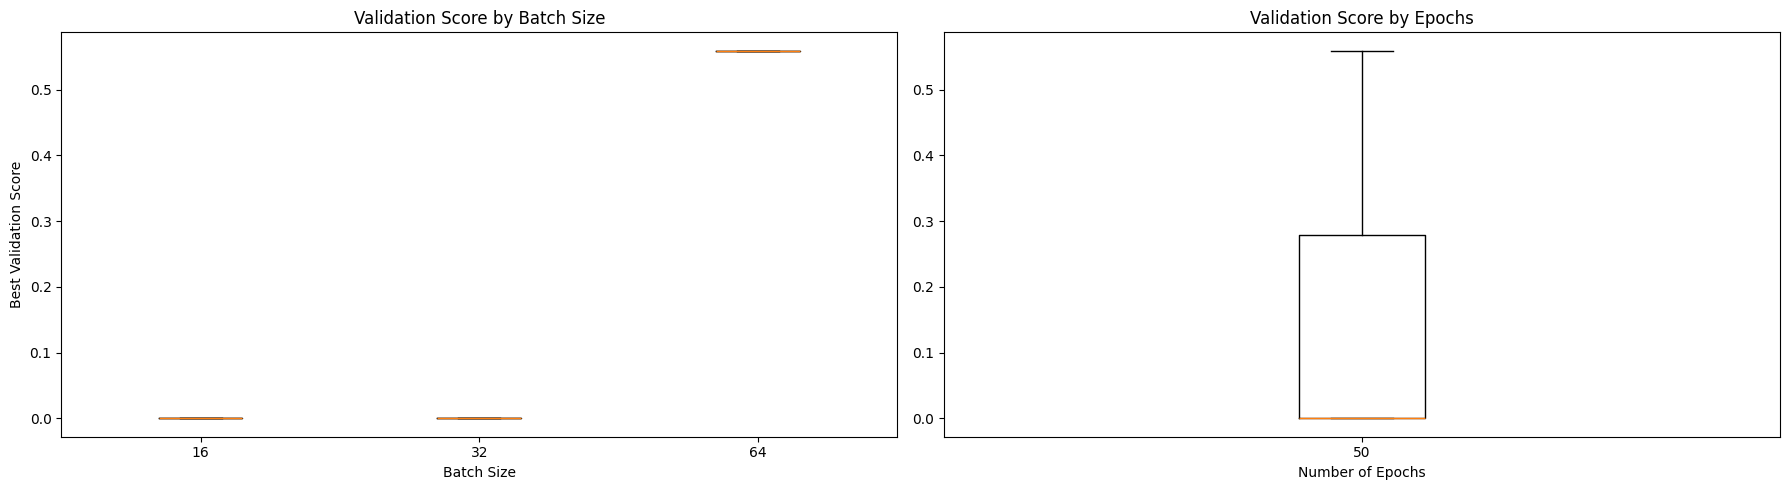

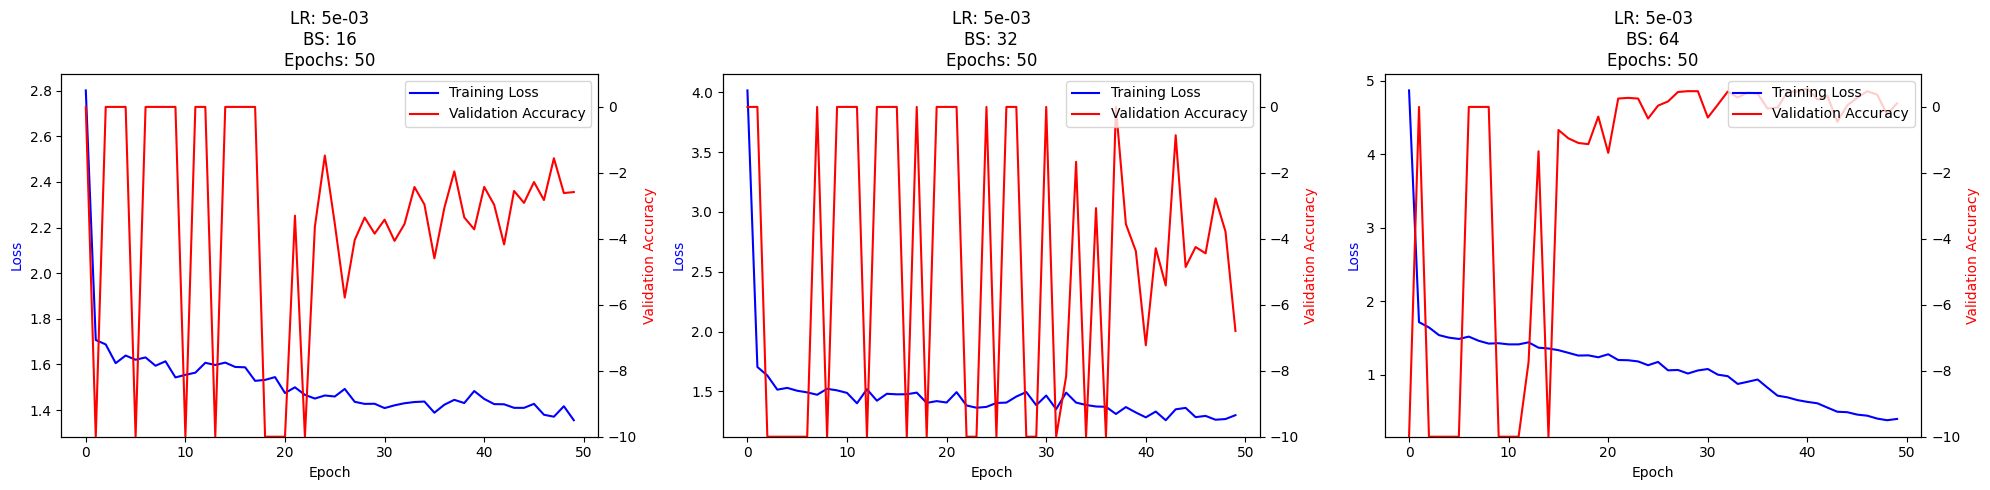


Best batch size found: 64


In [111]:
# Plot results for batch sizes
plot_hyperparameter_results(bs_results, 'batch_size')
plot_training_curves(bs_curves)

# Find best batch size
valid_results = [r for r in bs_results if r['best_val_score'] != float('-inf')]
best_bs = sorted(valid_results, key=lambda x: x['best_val_score'], reverse=True)[0]['params']['batch_size']
print(f"\nBest batch size found: {best_bs}")

### Best Learning Rate and Batch Size

In [97]:
# Use best learning rate and batch size for longer training
final_hyperparameters = {
    'learning_rate': [best_lr],    # Best learning rate
    'batch_size': [best_bs],       # Best batch size
    'epochs': [150]                # Longer training
}

# Run final training
final_results, final_curves = run_hyperparameter_tuning(final_hyperparameters)


Testing parameters: {'learning_rate': 0.005, 'batch_size': 64, 'epochs': 150}


Epoch 1/150 - Avg. Training Loss: 4.8891


Epoch 1/150 - Avg. Validation Accuracy: -4089.1370
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/150 - Avg. Training Loss: 1.7907


Epoch 2/150 - Avg. Validation Accuracy: -1329184473114307804341708259328.0000


Epoch 3/150 - Avg. Training Loss: 1.5740


Epoch 3/150 - Avg. Validation Accuracy: -32.7460
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 4/150 - Avg. Training Loss: 1.6036


Epoch 4/150 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 5/150 - Avg. Training Loss: 1.5117


Epoch 5/150 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 6/150 - Avg. Training Loss: 1.5633


Epoch 6/150 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 7/150 - Avg. Training Loss: 1.4815


Epoch 7/150 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 8/150 - Avg. Training Loss: 1.4529


Epoch 8/150 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 9/150 - Avg. Training Loss: 1.4350


Epoch 9/150 - Avg. Validation Accuracy: -125.3716


Epoch 10/150 - Avg. Training Loss: 1.3971


Epoch 10/150 - Avg. Validation Accuracy: -8.4764


Epoch 11/150 - Avg. Training Loss: 1.3924


Epoch 11/150 - Avg. Validation Accuracy: -4.8962


Epoch 12/150 - Avg. Training Loss: 1.4338


Epoch 12/150 - Avg. Validation Accuracy: -11.1937


Epoch 13/150 - Avg. Training Loss: 1.3385


Epoch 13/150 - Avg. Validation Accuracy: -3.0262


Epoch 14/150 - Avg. Training Loss: 1.3987


Epoch 14/150 - Avg. Validation Accuracy: -3.7632


Epoch 15/150 - Avg. Training Loss: 1.3253


Epoch 15/150 - Avg. Validation Accuracy: -6.5839


Epoch 16/150 - Avg. Training Loss: 1.3730


Epoch 16/150 - Avg. Validation Accuracy: -2.6786


Epoch 17/150 - Avg. Training Loss: 1.2925


Epoch 17/150 - Avg. Validation Accuracy: -3.8586


Epoch 18/150 - Avg. Training Loss: 1.3603


Epoch 18/150 - Avg. Validation Accuracy: -1.6425


Epoch 19/150 - Avg. Training Loss: 1.3361


Epoch 19/150 - Avg. Validation Accuracy: -1.3677


Epoch 20/150 - Avg. Training Loss: 1.2795


Epoch 20/150 - Avg. Validation Accuracy: -0.5753


Epoch 21/150 - Avg. Training Loss: 1.2448


Epoch 21/150 - Avg. Validation Accuracy: -3.1789


Epoch 22/150 - Avg. Training Loss: 1.2642


Epoch 22/150 - Avg. Validation Accuracy: 0.2432
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 23/150 - Avg. Training Loss: 1.2138


Epoch 23/150 - Avg. Validation Accuracy: -2.1568


Epoch 24/150 - Avg. Training Loss: 1.1911


Epoch 24/150 - Avg. Validation Accuracy: -4.6252


Epoch 25/150 - Avg. Training Loss: 1.1570


Epoch 25/150 - Avg. Validation Accuracy: 0.1923


Epoch 26/150 - Avg. Training Loss: 1.1592


Epoch 26/150 - Avg. Validation Accuracy: 0.3086
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 27/150 - Avg. Training Loss: 1.1090


Epoch 27/150 - Avg. Validation Accuracy: 0.1125


Epoch 28/150 - Avg. Training Loss: 1.1432


Epoch 28/150 - Avg. Validation Accuracy: 0.1137


Epoch 29/150 - Avg. Training Loss: 1.1490


Epoch 29/150 - Avg. Validation Accuracy: -0.3259


Epoch 30/150 - Avg. Training Loss: 1.0986


Epoch 30/150 - Avg. Validation Accuracy: 0.1129


Epoch 31/150 - Avg. Training Loss: 1.0497


Epoch 31/150 - Avg. Validation Accuracy: 0.0966


Epoch 32/150 - Avg. Training Loss: 1.0868


Epoch 32/150 - Avg. Validation Accuracy: -0.1646


Epoch 33/150 - Avg. Training Loss: 0.9759


Epoch 33/150 - Avg. Validation Accuracy: 0.3555
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 34/150 - Avg. Training Loss: 0.9207


Epoch 34/150 - Avg. Validation Accuracy: -0.3964


Epoch 35/150 - Avg. Training Loss: 0.9388


Epoch 35/150 - Avg. Validation Accuracy: 0.3128


Epoch 36/150 - Avg. Training Loss: 0.9551


Epoch 36/150 - Avg. Validation Accuracy: 0.1502


Epoch 37/150 - Avg. Training Loss: 0.8790


Epoch 37/150 - Avg. Validation Accuracy: 0.0524


Epoch 38/150 - Avg. Training Loss: 0.8267


Epoch 38/150 - Avg. Validation Accuracy: -0.6842


Epoch 39/150 - Avg. Training Loss: 0.9055


Epoch 39/150 - Avg. Validation Accuracy: 0.1487


Epoch 40/150 - Avg. Training Loss: 0.8236


Epoch 40/150 - Avg. Validation Accuracy: -0.3123


Epoch 41/150 - Avg. Training Loss: 0.7033


Epoch 41/150 - Avg. Validation Accuracy: 0.1500


Epoch 42/150 - Avg. Training Loss: 0.6323


Epoch 42/150 - Avg. Validation Accuracy: 0.1867


Epoch 43/150 - Avg. Training Loss: 0.6766


Epoch 43/150 - Avg. Validation Accuracy: 0.2733


Epoch 44/150 - Avg. Training Loss: 0.6549


Epoch 44/150 - Avg. Validation Accuracy: 0.2444


Epoch 45/150 - Avg. Training Loss: 0.6219


Epoch 45/150 - Avg. Validation Accuracy: 0.3599
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 46/150 - Avg. Training Loss: 0.5664


Epoch 46/150 - Avg. Validation Accuracy: 0.3368


Epoch 47/150 - Avg. Training Loss: 0.5086


Epoch 47/150 - Avg. Validation Accuracy: -0.0742


Epoch 48/150 - Avg. Training Loss: 0.5767


Epoch 48/150 - Avg. Validation Accuracy: 0.3243


Epoch 49/150 - Avg. Training Loss: 0.6192


Epoch 49/150 - Avg. Validation Accuracy: 0.3969
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 50/150 - Avg. Training Loss: 0.5185


Epoch 50/150 - Avg. Validation Accuracy: 0.2627


Epoch 51/150 - Avg. Training Loss: 0.5367


Epoch 51/150 - Avg. Validation Accuracy: 0.2059


Epoch 52/150 - Avg. Training Loss: 0.4738


Epoch 52/150 - Avg. Validation Accuracy: 0.3260


Epoch 53/150 - Avg. Training Loss: 0.4921


Epoch 53/150 - Avg. Validation Accuracy: 0.1367


Epoch 54/150 - Avg. Training Loss: 0.4869


Epoch 54/150 - Avg. Validation Accuracy: 0.5335
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 55/150 - Avg. Training Loss: 0.4654


Epoch 55/150 - Avg. Validation Accuracy: 0.3556


Epoch 56/150 - Avg. Training Loss: 0.4135


Epoch 56/150 - Avg. Validation Accuracy: 0.2712


Epoch 57/150 - Avg. Training Loss: 0.4313


Epoch 57/150 - Avg. Validation Accuracy: 0.3761


Epoch 58/150 - Avg. Training Loss: 0.3317


Epoch 58/150 - Avg. Validation Accuracy: 0.0946


Epoch 59/150 - Avg. Training Loss: 0.2962


Epoch 59/150 - Avg. Validation Accuracy: 0.4124


Epoch 60/150 - Avg. Training Loss: 0.2605


Epoch 60/150 - Avg. Validation Accuracy: 0.4573


Epoch 61/150 - Avg. Training Loss: 0.2281


Epoch 61/150 - Avg. Validation Accuracy: 0.3092


Epoch 62/150 - Avg. Training Loss: 0.2118


Epoch 62/150 - Avg. Validation Accuracy: 0.2434


Epoch 63/150 - Avg. Training Loss: 0.1852


Epoch 63/150 - Avg. Validation Accuracy: 0.3683


Epoch 64/150 - Avg. Training Loss: 0.1783


Epoch 64/150 - Avg. Validation Accuracy: 0.4636


Epoch 65/150 - Avg. Training Loss: 0.2423


Epoch 65/150 - Avg. Validation Accuracy: 0.3587


Epoch 66/150 - Avg. Training Loss: 0.2636


Epoch 66/150 - Avg. Validation Accuracy: 0.2359


Epoch 67/150 - Avg. Training Loss: 0.2979


Epoch 67/150 - Avg. Validation Accuracy: -inf


Epoch 68/150 - Avg. Training Loss: 0.2988


Epoch 68/150 - Avg. Validation Accuracy: 0.4160


Epoch 69/150 - Avg. Training Loss: 0.1950


Epoch 69/150 - Avg. Validation Accuracy: 0.4829


Epoch 70/150 - Avg. Training Loss: 0.1486


Epoch 70/150 - Avg. Validation Accuracy: 0.4013


Epoch 71/150 - Avg. Training Loss: 0.1322


Epoch 71/150 - Avg. Validation Accuracy: 0.4467


Epoch 72/150 - Avg. Training Loss: 0.1438


Epoch 72/150 - Avg. Validation Accuracy: 0.2438


Epoch 73/150 - Avg. Training Loss: 0.1318


Epoch 73/150 - Avg. Validation Accuracy: 0.4750


Epoch 74/150 - Avg. Training Loss: 0.1462


Epoch 74/150 - Avg. Validation Accuracy: 0.4154


Epoch 75/150 - Avg. Training Loss: 0.1339


Epoch 75/150 - Avg. Validation Accuracy: 0.1841


Epoch 76/150 - Avg. Training Loss: 0.1423


Epoch 76/150 - Avg. Validation Accuracy: 0.3732


Epoch 77/150 - Avg. Training Loss: 0.1122


Epoch 77/150 - Avg. Validation Accuracy: -0.1697


Epoch 78/150 - Avg. Training Loss: 0.1463


Epoch 78/150 - Avg. Validation Accuracy: -0.0906


Epoch 79/150 - Avg. Training Loss: 0.0753


Epoch 79/150 - Avg. Validation Accuracy: 0.1733


Epoch 80/150 - Avg. Training Loss: 0.0791


Epoch 80/150 - Avg. Validation Accuracy: 0.3880


Epoch 81/150 - Avg. Training Loss: 0.1141


Epoch 81/150 - Avg. Validation Accuracy: 0.3681


Epoch 82/150 - Avg. Training Loss: 0.1404


Epoch 82/150 - Avg. Validation Accuracy: 0.3875


Epoch 83/150 - Avg. Training Loss: 0.1884


Epoch 83/150 - Avg. Validation Accuracy: 0.3427


Epoch 84/150 - Avg. Training Loss: 0.2588


Epoch 84/150 - Avg. Validation Accuracy: 0.1747


Epoch 85/150 - Avg. Training Loss: 0.3209


Epoch 85/150 - Avg. Validation Accuracy: 0.3733


Epoch 86/150 - Avg. Training Loss: 0.3117


Epoch 86/150 - Avg. Validation Accuracy: 0.4824


Epoch 87/150 - Avg. Training Loss: 0.3155


Epoch 87/150 - Avg. Validation Accuracy: 0.3917


Epoch 88/150 - Avg. Training Loss: 0.2805


Epoch 88/150 - Avg. Validation Accuracy: 0.2896


Epoch 89/150 - Avg. Training Loss: 0.2640


Epoch 89/150 - Avg. Validation Accuracy: 0.4969


Epoch 90/150 - Avg. Training Loss: 0.1603


Epoch 90/150 - Avg. Validation Accuracy: 0.3529


Epoch 91/150 - Avg. Training Loss: 0.1301


Epoch 91/150 - Avg. Validation Accuracy: 0.3412


Epoch 92/150 - Avg. Training Loss: 0.1069


Epoch 92/150 - Avg. Validation Accuracy: 0.3507


Epoch 93/150 - Avg. Training Loss: 0.1162


Epoch 93/150 - Avg. Validation Accuracy: 0.3922


Epoch 94/150 - Avg. Training Loss: 0.1111


Epoch 94/150 - Avg. Validation Accuracy: 0.3067


Epoch 95/150 - Avg. Training Loss: 0.0917


Epoch 95/150 - Avg. Validation Accuracy: 0.2396


Epoch 96/150 - Avg. Training Loss: 0.1221


Epoch 96/150 - Avg. Validation Accuracy: 0.3735


Epoch 97/150 - Avg. Training Loss: 0.1132


Epoch 97/150 - Avg. Validation Accuracy: 0.3838


Epoch 98/150 - Avg. Training Loss: 0.1095


Epoch 98/150 - Avg. Validation Accuracy: 0.5088


Epoch 99/150 - Avg. Training Loss: 0.1189


Epoch 99/150 - Avg. Validation Accuracy: 0.5066


Epoch 100/150 - Avg. Training Loss: 0.0891


Epoch 100/150 - Avg. Validation Accuracy: 0.2854


Epoch 101/150 - Avg. Training Loss: 0.1002


Epoch 101/150 - Avg. Validation Accuracy: 0.4615


Epoch 102/150 - Avg. Training Loss: 0.0902


Epoch 102/150 - Avg. Validation Accuracy: 0.3212


Epoch 103/150 - Avg. Training Loss: 0.0736


Epoch 103/150 - Avg. Validation Accuracy: 0.2163


Epoch 104/150 - Avg. Training Loss: 0.0739


Epoch 104/150 - Avg. Validation Accuracy: 0.1850


Epoch 105/150 - Avg. Training Loss: 0.0591


Epoch 105/150 - Avg. Validation Accuracy: -0.0512


Epoch 106/150 - Avg. Training Loss: 0.0641


Epoch 106/150 - Avg. Validation Accuracy: -inf


Epoch 107/150 - Avg. Training Loss: 0.0703


Epoch 107/150 - Avg. Validation Accuracy: -0.1693


Epoch 108/150 - Avg. Training Loss: 0.0832


Epoch 108/150 - Avg. Validation Accuracy: -0.0751


Epoch 109/150 - Avg. Training Loss: 0.0708


Epoch 109/150 - Avg. Validation Accuracy: 0.1426


Epoch 110/150 - Avg. Training Loss: 0.0491


Epoch 110/150 - Avg. Validation Accuracy: 0.2694


Epoch 111/150 - Avg. Training Loss: 0.0464


Epoch 111/150 - Avg. Validation Accuracy: 0.2233


Epoch 112/150 - Avg. Training Loss: 0.0433


Epoch 112/150 - Avg. Validation Accuracy: -0.0071


Epoch 113/150 - Avg. Training Loss: 0.0645


Epoch 113/150 - Avg. Validation Accuracy: 0.1072


Epoch 114/150 - Avg. Training Loss: 0.0743


Epoch 114/150 - Avg. Validation Accuracy: -0.0461


Epoch 115/150 - Avg. Training Loss: 0.0961


Epoch 115/150 - Avg. Validation Accuracy: 0.1277


Epoch 116/150 - Avg. Training Loss: 0.1193


Epoch 116/150 - Avg. Validation Accuracy: 0.3757


Epoch 117/150 - Avg. Training Loss: 0.1754


Epoch 117/150 - Avg. Validation Accuracy: 0.3468


Epoch 118/150 - Avg. Training Loss: 0.2099


Epoch 118/150 - Avg. Validation Accuracy: 0.2077


Epoch 119/150 - Avg. Training Loss: 0.2180


Epoch 119/150 - Avg. Validation Accuracy: -0.0185


Epoch 120/150 - Avg. Training Loss: 0.2505


Epoch 120/150 - Avg. Validation Accuracy: -0.0727


Epoch 121/150 - Avg. Training Loss: 0.2174


Epoch 121/150 - Avg. Validation Accuracy: 0.2712


Epoch 122/150 - Avg. Training Loss: 0.2068


Epoch 122/150 - Avg. Validation Accuracy: -0.0645


Epoch 123/150 - Avg. Training Loss: 0.1550


Epoch 123/150 - Avg. Validation Accuracy: -inf


Epoch 124/150 - Avg. Training Loss: 0.1571


Epoch 124/150 - Avg. Validation Accuracy: 0.0643


Epoch 125/150 - Avg. Training Loss: 0.1572


Epoch 125/150 - Avg. Validation Accuracy: 0.2706


Epoch 126/150 - Avg. Training Loss: 0.1124


Epoch 126/150 - Avg. Validation Accuracy: 0.4147


Epoch 127/150 - Avg. Training Loss: 0.0811


Epoch 127/150 - Avg. Validation Accuracy: 0.1480


Epoch 128/150 - Avg. Training Loss: 0.0658


Epoch 128/150 - Avg. Validation Accuracy: 0.2910


Epoch 129/150 - Avg. Training Loss: 0.0737


Epoch 129/150 - Avg. Validation Accuracy: 0.4221


Epoch 130/150 - Avg. Training Loss: 0.0900


Epoch 130/150 - Avg. Validation Accuracy: 0.2325


Epoch 131/150 - Avg. Training Loss: 0.1383


Epoch 131/150 - Avg. Validation Accuracy: 0.2070


Epoch 132/150 - Avg. Training Loss: 0.1099


Epoch 132/150 - Avg. Validation Accuracy: 0.4493


Epoch 133/150 - Avg. Training Loss: 0.1174


Epoch 133/150 - Avg. Validation Accuracy: 0.0595


Epoch 134/150 - Avg. Training Loss: 0.0930


Epoch 134/150 - Avg. Validation Accuracy: -0.0392


Epoch 135/150 - Avg. Training Loss: 0.0770


Epoch 135/150 - Avg. Validation Accuracy: 0.2043


Epoch 136/150 - Avg. Training Loss: 0.0605


Epoch 136/150 - Avg. Validation Accuracy: 0.2587


Epoch 137/150 - Avg. Training Loss: 0.0456


Epoch 137/150 - Avg. Validation Accuracy: 0.3991


Epoch 138/150 - Avg. Training Loss: 0.0485


Epoch 138/150 - Avg. Validation Accuracy: 0.3199


Epoch 139/150 - Avg. Training Loss: 0.0457


Epoch 139/150 - Avg. Validation Accuracy: -0.0676


Epoch 140/150 - Avg. Training Loss: 0.0480


Epoch 140/150 - Avg. Validation Accuracy: 0.4195


Epoch 141/150 - Avg. Training Loss: 0.0417


Epoch 141/150 - Avg. Validation Accuracy: 0.3530


Epoch 142/150 - Avg. Training Loss: 0.0457


Epoch 142/150 - Avg. Validation Accuracy: 0.2467


Epoch 143/150 - Avg. Training Loss: 0.0416


Epoch 143/150 - Avg. Validation Accuracy: 0.1536


Epoch 144/150 - Avg. Training Loss: 0.0379


Epoch 144/150 - Avg. Validation Accuracy: 0.2872


Epoch 145/150 - Avg. Training Loss: 0.0559


Epoch 145/150 - Avg. Validation Accuracy: -0.1018


Epoch 146/150 - Avg. Training Loss: 0.0476


Epoch 146/150 - Avg. Validation Accuracy: 0.0276


Epoch 147/150 - Avg. Training Loss: 0.0426


Epoch 147/150 - Avg. Validation Accuracy: 0.0182


Epoch 148/150 - Avg. Training Loss: 0.0491


Epoch 148/150 - Avg. Validation Accuracy: 0.0079


Epoch 149/150 - Avg. Training Loss: 0.0322


Epoch 149/150 - Avg. Validation Accuracy: -0.1511


Epoch 150/150 - Avg. Training Loss: 0.0546


Epoch 150/150 - Avg. Validation Accuracy: -0.0636
Best validation score: 0.5335
Final training loss: 0.0546


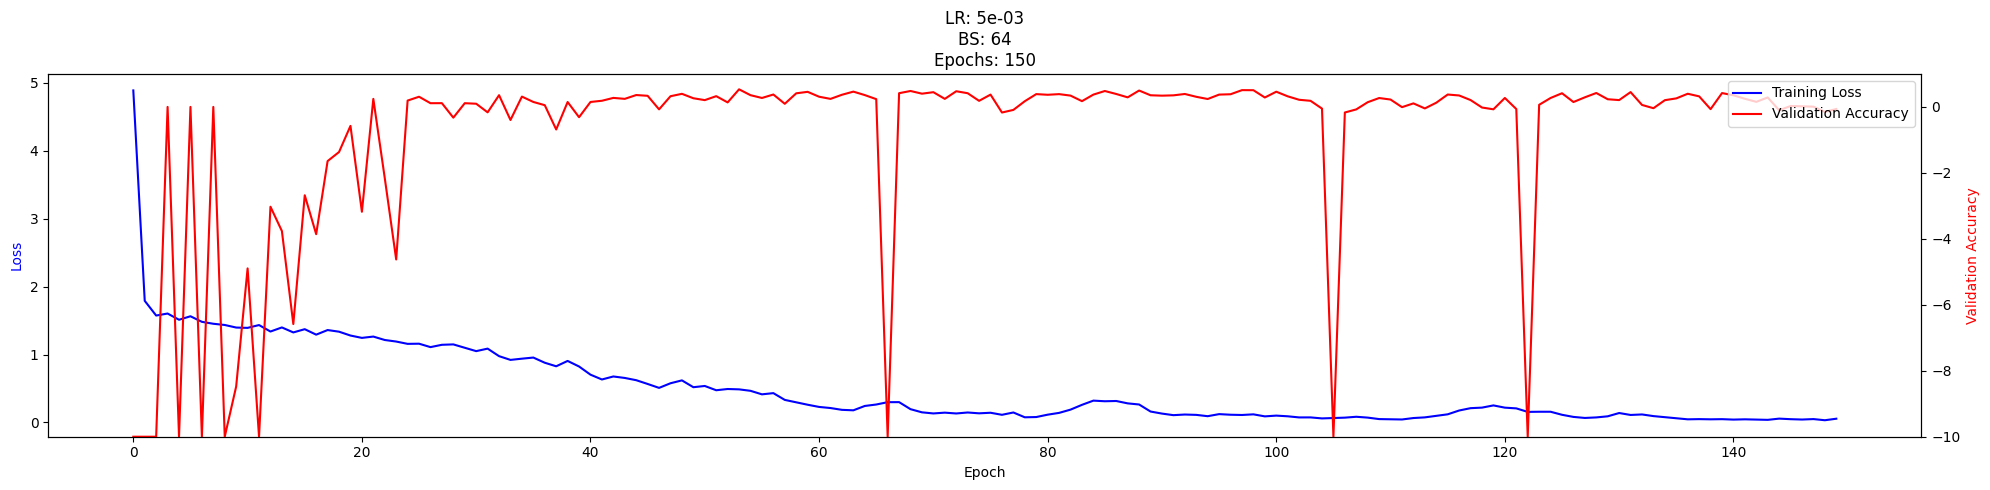


Final Model Performance:
------------------------------
Best Validation Score: 0.5335
Final Training Loss: 0.0546
Parameters used:
- Learning Rate: 5e-03
- Batch Size: 64
- Epochs: 150


In [112]:
# Plot final results
plot_training_curves(final_curves)

# Print final performance
print("\nFinal Model Performance:")
print("-" * 30)
print(f"Best Validation Score: {final_results[0]['best_val_score']:.4f}")
print(f"Final Training Loss: {final_results[0]['final_loss']:.4f}")
print(f"Parameters used:")
print(f"- Learning Rate: {best_lr:.0e}")
print(f"- Batch Size: {best_bs}")
print(f"- Epochs: 150")

### Large Epoch Training Training

In [114]:
def run_final_training(hyperparameters):
   param_combinations = [dict(zip(hyperparameters.keys(), v)) for v in itertools.product(*hyperparameters.values())]
   results = []
   all_training_curves = []
   
   for params in param_combinations:
       print(f"\nTraining with parameters: {params}")
       
       model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)
       optimizer = torch.optim.AdamW(model.parameters(), lr=params['learning_rate'])
       
       train_dataloader = DataLoader(train_data, batch_size=params['batch_size'], 
                                   shuffle=True, collate_fn=collate_fn)
       val_dataloader = DataLoader(val_data, batch_size=len(val_data), 
                                 shuffle=False, collate_fn=collate_fn)
       test_dataloader = DataLoader(test_data, batch_size=len(test_data),
                                  shuffle=False, collate_fn=collate_fn)
       
       trained_model, loss_prog, val_prog = train_model(
           model=model,
           optimizer=optimizer,
           train_dataloader=train_dataloader,
           val_dataloader=val_dataloader,
           epochs=params['epochs'],
           best_accuracy=float('-inf')
       )
       
       # Get test accuracy
       model.eval()
       with torch.no_grad():
           for batch in test_dataloader:
               input_ids = batch['input_ids'].to(device)
               attention_mask = batch['attention_mask'].to(device)
               labels = batch['labels'].to(device)
               
               generate_outputs = model.generate(input_ids=input_ids, 
                                              attention_mask=attention_mask,
                                              max_new_tokens=10)
               
               decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
               decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
               
               try:
                   predicted_values = [float(pred) for pred in decoded_preds]
                   actual_values = [float(label) for label in decoded_labels]
                   test_score = sklearn.metrics.r2_score(predicted_values, actual_values)
               except ValueError:
                   test_score = float('-inf')
       
       results.append({
           'params': params,
           'best_val_score': max(val_prog),
           'final_loss': loss_prog[-1],
           'test_score': test_score
       })
       
       all_training_curves.append({
           'params': params,
           'loss_progress': loss_prog,
           'val_progress': val_prog
       })
       
       print(f"Best validation score: {max(val_prog):.4f}")
       print(f"Final training loss: {loss_prog[-1]:.4f}")
       print(f"Test accuracy: {test_score:.4f}")
   
   return results, all_training_curves

In [115]:
# Run training cell
large_epoch_hyperparameters = {
   'learning_rate': [best_lr],    
   'batch_size': [best_bs],       
   'epochs': [500]                
}

le_results, le_curves = run_final_training(large_epoch_hyperparameters)


Training with parameters: {'learning_rate': 0.005, 'batch_size': 64, 'epochs': 500}


Epoch 1/500 - Avg. Training Loss: 5.1102


Epoch 1/500 - Avg. Validation Accuracy: -1.0523
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/500 - Avg. Training Loss: 1.6835


Epoch 2/500 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 3/500 - Avg. Training Loss: 1.6213


Epoch 3/500 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 4/500 - Avg. Training Loss: 1.5261


Epoch 4/500 - Avg. Validation Accuracy: -1393044702340879275648230621184.0000


Epoch 5/500 - Avg. Training Loss: 1.5780


Epoch 5/500 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 6/500 - Avg. Training Loss: 1.5681


Epoch 6/500 - Avg. Validation Accuracy: -28.5647


Epoch 7/500 - Avg. Training Loss: 1.4572


Epoch 7/500 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 8/500 - Avg. Training Loss: 1.4344


Epoch 8/500 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 9/500 - Avg. Training Loss: 1.4337


Epoch 9/500 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 10/500 - Avg. Training Loss: 1.4149


Epoch 10/500 - Avg. Validation Accuracy: 0.0000
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 11/500 - Avg. Training Loss: 1.4026


Epoch 11/500 - Avg. Validation Accuracy: -1279969802752506244425106587648.0000


Epoch 12/500 - Avg. Training Loss: 1.3698


Epoch 12/500 - Avg. Validation Accuracy: -10.2839


Epoch 13/500 - Avg. Training Loss: 1.3466


Epoch 13/500 - Avg. Validation Accuracy: -0.5572


Epoch 14/500 - Avg. Training Loss: 1.3440


Epoch 14/500 - Avg. Validation Accuracy: -1.6607


Epoch 15/500 - Avg. Training Loss: 1.3184


Epoch 15/500 - Avg. Validation Accuracy: -1.8333


Epoch 16/500 - Avg. Training Loss: 1.3060


Epoch 16/500 - Avg. Validation Accuracy: -0.2234


Epoch 17/500 - Avg. Training Loss: 1.3048


Epoch 17/500 - Avg. Validation Accuracy: -0.5930


Epoch 18/500 - Avg. Training Loss: 1.2879


Epoch 18/500 - Avg. Validation Accuracy: -0.4308


Epoch 19/500 - Avg. Training Loss: 1.2621


Epoch 19/500 - Avg. Validation Accuracy: 0.3538
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 20/500 - Avg. Training Loss: 1.2179


Epoch 20/500 - Avg. Validation Accuracy: -0.0698


Epoch 21/500 - Avg. Training Loss: 1.2059


Epoch 21/500 - Avg. Validation Accuracy: 0.2099


Epoch 22/500 - Avg. Training Loss: 1.1863


Epoch 22/500 - Avg. Validation Accuracy: 0.3261


Epoch 23/500 - Avg. Training Loss: 1.1705


Epoch 23/500 - Avg. Validation Accuracy: -0.2313


Epoch 24/500 - Avg. Training Loss: 1.1418


Epoch 24/500 - Avg. Validation Accuracy: 0.2750


Epoch 25/500 - Avg. Training Loss: 1.2401


Epoch 25/500 - Avg. Validation Accuracy: 0.4817
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 26/500 - Avg. Training Loss: 1.1154


Epoch 26/500 - Avg. Validation Accuracy: -0.3125


Epoch 27/500 - Avg. Training Loss: 1.1454


Epoch 27/500 - Avg. Validation Accuracy: 0.4914
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 28/500 - Avg. Training Loss: 1.1494


Epoch 28/500 - Avg. Validation Accuracy: 0.0508


Epoch 29/500 - Avg. Training Loss: 1.0240


Epoch 29/500 - Avg. Validation Accuracy: 0.4784


Epoch 30/500 - Avg. Training Loss: 1.0104


Epoch 30/500 - Avg. Validation Accuracy: 0.3495


Epoch 31/500 - Avg. Training Loss: 0.9768


Epoch 31/500 - Avg. Validation Accuracy: 0.1005


Epoch 32/500 - Avg. Training Loss: 0.9530


Epoch 32/500 - Avg. Validation Accuracy: 0.1472


Epoch 33/500 - Avg. Training Loss: 0.9469


Epoch 33/500 - Avg. Validation Accuracy: 0.3424


Epoch 34/500 - Avg. Training Loss: 0.9272


Epoch 34/500 - Avg. Validation Accuracy: 0.3474


Epoch 35/500 - Avg. Training Loss: 0.8644


Epoch 35/500 - Avg. Validation Accuracy: 0.3650


Epoch 36/500 - Avg. Training Loss: 0.8030


Epoch 36/500 - Avg. Validation Accuracy: -0.3725


Epoch 37/500 - Avg. Training Loss: 0.7808


Epoch 37/500 - Avg. Validation Accuracy: 0.3444


Epoch 38/500 - Avg. Training Loss: 0.7331


Epoch 38/500 - Avg. Validation Accuracy: 0.2164


Epoch 39/500 - Avg. Training Loss: 0.6992


Epoch 39/500 - Avg. Validation Accuracy: 0.4226


Epoch 40/500 - Avg. Training Loss: 0.6585


Epoch 40/500 - Avg. Validation Accuracy: 0.3748


Epoch 41/500 - Avg. Training Loss: 0.5909


Epoch 41/500 - Avg. Validation Accuracy: 0.2094


Epoch 42/500 - Avg. Training Loss: 0.5812


Epoch 42/500 - Avg. Validation Accuracy: 0.4467


Epoch 43/500 - Avg. Training Loss: 0.6202


Epoch 43/500 - Avg. Validation Accuracy: 0.4019


Epoch 44/500 - Avg. Training Loss: 0.5931


Epoch 44/500 - Avg. Validation Accuracy: 0.3483


Epoch 45/500 - Avg. Training Loss: 0.5405


Epoch 45/500 - Avg. Validation Accuracy: 0.3535


Epoch 46/500 - Avg. Training Loss: 0.4960


Epoch 46/500 - Avg. Validation Accuracy: 0.4558


Epoch 47/500 - Avg. Training Loss: 0.4687


Epoch 47/500 - Avg. Validation Accuracy: 0.1141


Epoch 48/500 - Avg. Training Loss: 0.4623


Epoch 48/500 - Avg. Validation Accuracy: 0.1336


Epoch 49/500 - Avg. Training Loss: 0.5066


Epoch 49/500 - Avg. Validation Accuracy: 0.2855


Epoch 50/500 - Avg. Training Loss: 0.4144


Epoch 50/500 - Avg. Validation Accuracy: -inf


Epoch 51/500 - Avg. Training Loss: 0.3616


Epoch 51/500 - Avg. Validation Accuracy: 0.5222
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 52/500 - Avg. Training Loss: 0.2817


Epoch 52/500 - Avg. Validation Accuracy: 0.2781


Epoch 53/500 - Avg. Training Loss: 0.2392


Epoch 53/500 - Avg. Validation Accuracy: 0.3654


Epoch 54/500 - Avg. Training Loss: 0.2245


Epoch 54/500 - Avg. Validation Accuracy: 0.1093


Epoch 55/500 - Avg. Training Loss: 0.2911


Epoch 55/500 - Avg. Validation Accuracy: 0.4478


Epoch 56/500 - Avg. Training Loss: 0.2342


Epoch 56/500 - Avg. Validation Accuracy: 0.2436


Epoch 57/500 - Avg. Training Loss: 0.1794


Epoch 57/500 - Avg. Validation Accuracy: 0.3185


Epoch 58/500 - Avg. Training Loss: 0.1952


Epoch 58/500 - Avg. Validation Accuracy: 0.2298


Epoch 59/500 - Avg. Training Loss: 0.1552


Epoch 59/500 - Avg. Validation Accuracy: 0.2847


Epoch 60/500 - Avg. Training Loss: 0.1373


Epoch 60/500 - Avg. Validation Accuracy: 0.0717


Epoch 61/500 - Avg. Training Loss: 0.1233


Epoch 61/500 - Avg. Validation Accuracy: 0.3506


Epoch 62/500 - Avg. Training Loss: 0.1096


Epoch 62/500 - Avg. Validation Accuracy: 0.4500


Epoch 63/500 - Avg. Training Loss: 0.1163


Epoch 63/500 - Avg. Validation Accuracy: 0.3085


Epoch 64/500 - Avg. Training Loss: 0.1720


Epoch 64/500 - Avg. Validation Accuracy: 0.4263


Epoch 65/500 - Avg. Training Loss: 0.1227


Epoch 65/500 - Avg. Validation Accuracy: 0.5550
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 66/500 - Avg. Training Loss: 0.1273


Epoch 66/500 - Avg. Validation Accuracy: 0.3384


Epoch 67/500 - Avg. Training Loss: 0.1030


Epoch 67/500 - Avg. Validation Accuracy: 0.3855


Epoch 68/500 - Avg. Training Loss: 0.0932


Epoch 68/500 - Avg. Validation Accuracy: 0.3647


Epoch 69/500 - Avg. Training Loss: 0.1028


Epoch 69/500 - Avg. Validation Accuracy: 0.2817


Epoch 70/500 - Avg. Training Loss: 0.0996


Epoch 70/500 - Avg. Validation Accuracy: 0.1605


Epoch 71/500 - Avg. Training Loss: 0.0875


Epoch 71/500 - Avg. Validation Accuracy: 0.3782


Epoch 72/500 - Avg. Training Loss: 0.0875


Epoch 72/500 - Avg. Validation Accuracy: 0.3564


Epoch 73/500 - Avg. Training Loss: 0.0638


Epoch 73/500 - Avg. Validation Accuracy: 0.3189


Epoch 74/500 - Avg. Training Loss: 0.0516


Epoch 74/500 - Avg. Validation Accuracy: 0.4117


Epoch 75/500 - Avg. Training Loss: 0.0404


Epoch 75/500 - Avg. Validation Accuracy: 0.3434


Epoch 76/500 - Avg. Training Loss: 0.0551


Epoch 76/500 - Avg. Validation Accuracy: 0.3937


Epoch 77/500 - Avg. Training Loss: 0.0639


Epoch 77/500 - Avg. Validation Accuracy: 0.4683


Epoch 78/500 - Avg. Training Loss: 0.0572


Epoch 78/500 - Avg. Validation Accuracy: 0.3992


Epoch 79/500 - Avg. Training Loss: 0.0811


Epoch 79/500 - Avg. Validation Accuracy: 0.4868


Epoch 80/500 - Avg. Training Loss: 0.0602


Epoch 80/500 - Avg. Validation Accuracy: 0.4157


Epoch 81/500 - Avg. Training Loss: 0.0534


Epoch 81/500 - Avg. Validation Accuracy: 0.3990


Epoch 82/500 - Avg. Training Loss: 0.0429


Epoch 82/500 - Avg. Validation Accuracy: 0.3919


Epoch 83/500 - Avg. Training Loss: 0.0487


Epoch 83/500 - Avg. Validation Accuracy: 0.2368


Epoch 84/500 - Avg. Training Loss: 0.0458


Epoch 84/500 - Avg. Validation Accuracy: 0.4566


Epoch 85/500 - Avg. Training Loss: 0.0273


Epoch 85/500 - Avg. Validation Accuracy: 0.2509


Epoch 86/500 - Avg. Training Loss: 0.0287


Epoch 86/500 - Avg. Validation Accuracy: 0.3497


Epoch 87/500 - Avg. Training Loss: 0.0397


Epoch 87/500 - Avg. Validation Accuracy: 0.2370


Epoch 88/500 - Avg. Training Loss: 0.0430


Epoch 88/500 - Avg. Validation Accuracy: 0.3376


Epoch 89/500 - Avg. Training Loss: 0.0302


Epoch 89/500 - Avg. Validation Accuracy: 0.4466


Epoch 90/500 - Avg. Training Loss: 0.0372


Epoch 90/500 - Avg. Validation Accuracy: 0.4639


Epoch 91/500 - Avg. Training Loss: 0.0373


Epoch 91/500 - Avg. Validation Accuracy: 0.4503


Epoch 92/500 - Avg. Training Loss: 0.0504


Epoch 92/500 - Avg. Validation Accuracy: 0.3048


Epoch 93/500 - Avg. Training Loss: 0.0565


Epoch 93/500 - Avg. Validation Accuracy: 0.3890


Epoch 94/500 - Avg. Training Loss: 0.0801


Epoch 94/500 - Avg. Validation Accuracy: 0.4065


Epoch 95/500 - Avg. Training Loss: 0.0559


Epoch 95/500 - Avg. Validation Accuracy: 0.4718


Epoch 96/500 - Avg. Training Loss: 0.0760


Epoch 96/500 - Avg. Validation Accuracy: 0.2267


Epoch 97/500 - Avg. Training Loss: 0.0872


Epoch 97/500 - Avg. Validation Accuracy: 0.2667


Epoch 98/500 - Avg. Training Loss: 0.0940


Epoch 98/500 - Avg. Validation Accuracy: 0.0150


Epoch 99/500 - Avg. Training Loss: 0.1275


Epoch 99/500 - Avg. Validation Accuracy: 0.3652


Epoch 100/500 - Avg. Training Loss: 0.1290


Epoch 100/500 - Avg. Validation Accuracy: 0.4183


Epoch 101/500 - Avg. Training Loss: 0.1468


Epoch 101/500 - Avg. Validation Accuracy: 0.4086


Epoch 102/500 - Avg. Training Loss: 0.1515


Epoch 102/500 - Avg. Validation Accuracy: 0.0606


Epoch 103/500 - Avg. Training Loss: 0.2925


Epoch 103/500 - Avg. Validation Accuracy: 0.3043


Epoch 104/500 - Avg. Training Loss: 0.2119


Epoch 104/500 - Avg. Validation Accuracy: 0.3810


Epoch 105/500 - Avg. Training Loss: 0.1585


Epoch 105/500 - Avg. Validation Accuracy: 0.2617


Epoch 106/500 - Avg. Training Loss: 0.1648


Epoch 106/500 - Avg. Validation Accuracy: 0.3117


Epoch 107/500 - Avg. Training Loss: 0.1706


Epoch 107/500 - Avg. Validation Accuracy: 0.1579


Epoch 108/500 - Avg. Training Loss: 0.1373


Epoch 108/500 - Avg. Validation Accuracy: 0.4455


Epoch 109/500 - Avg. Training Loss: 0.1421


Epoch 109/500 - Avg. Validation Accuracy: 0.2960


Epoch 110/500 - Avg. Training Loss: 0.0923


Epoch 110/500 - Avg. Validation Accuracy: 0.4766


Epoch 111/500 - Avg. Training Loss: 0.0968


Epoch 111/500 - Avg. Validation Accuracy: 0.3102


Epoch 112/500 - Avg. Training Loss: 0.0993


Epoch 112/500 - Avg. Validation Accuracy: 0.2345


Epoch 113/500 - Avg. Training Loss: 0.0943


Epoch 113/500 - Avg. Validation Accuracy: 0.2119


Epoch 114/500 - Avg. Training Loss: 0.1078


Epoch 114/500 - Avg. Validation Accuracy: 0.3364


Epoch 115/500 - Avg. Training Loss: 0.0713


Epoch 115/500 - Avg. Validation Accuracy: 0.4383


Epoch 116/500 - Avg. Training Loss: 0.0756


Epoch 116/500 - Avg. Validation Accuracy: 0.5271


Epoch 117/500 - Avg. Training Loss: 0.0729


Epoch 117/500 - Avg. Validation Accuracy: 0.3676


Epoch 118/500 - Avg. Training Loss: 0.0832


Epoch 118/500 - Avg. Validation Accuracy: 0.3976


Epoch 119/500 - Avg. Training Loss: 0.0693


Epoch 119/500 - Avg. Validation Accuracy: 0.5087


Epoch 120/500 - Avg. Training Loss: 0.0838


Epoch 120/500 - Avg. Validation Accuracy: 0.5366


Epoch 121/500 - Avg. Training Loss: 0.0441


Epoch 121/500 - Avg. Validation Accuracy: 0.4394


Epoch 122/500 - Avg. Training Loss: 0.0577


Epoch 122/500 - Avg. Validation Accuracy: 0.4464


Epoch 123/500 - Avg. Training Loss: 0.0638


Epoch 123/500 - Avg. Validation Accuracy: 0.4212


Epoch 124/500 - Avg. Training Loss: 0.0873


Epoch 124/500 - Avg. Validation Accuracy: 0.1781


Epoch 125/500 - Avg. Training Loss: 0.0922


Epoch 125/500 - Avg. Validation Accuracy: 0.4868


Epoch 126/500 - Avg. Training Loss: 0.0812


Epoch 126/500 - Avg. Validation Accuracy: 0.3641


Epoch 127/500 - Avg. Training Loss: 0.0888


Epoch 127/500 - Avg. Validation Accuracy: 0.1499


Epoch 128/500 - Avg. Training Loss: 0.0650


Epoch 128/500 - Avg. Validation Accuracy: 0.3336


Epoch 129/500 - Avg. Training Loss: 0.0465


Epoch 129/500 - Avg. Validation Accuracy: 0.3564


Epoch 130/500 - Avg. Training Loss: 0.0346


Epoch 130/500 - Avg. Validation Accuracy: 0.2025


Epoch 131/500 - Avg. Training Loss: 0.0687


Epoch 131/500 - Avg. Validation Accuracy: 0.1492


Epoch 132/500 - Avg. Training Loss: 0.0721


Epoch 132/500 - Avg. Validation Accuracy: 0.2967


Epoch 133/500 - Avg. Training Loss: 0.0850


Epoch 133/500 - Avg. Validation Accuracy: 0.1224


Epoch 134/500 - Avg. Training Loss: 0.0879


Epoch 134/500 - Avg. Validation Accuracy: 0.2878


Epoch 135/500 - Avg. Training Loss: 0.0681


Epoch 135/500 - Avg. Validation Accuracy: 0.3158


Epoch 136/500 - Avg. Training Loss: 0.0802


Epoch 136/500 - Avg. Validation Accuracy: 0.2925


Epoch 137/500 - Avg. Training Loss: 0.0759


Epoch 137/500 - Avg. Validation Accuracy: 0.4919


Epoch 138/500 - Avg. Training Loss: 0.0800


Epoch 138/500 - Avg. Validation Accuracy: 0.3814


Epoch 139/500 - Avg. Training Loss: 0.0747


Epoch 139/500 - Avg. Validation Accuracy: 0.2323


Epoch 140/500 - Avg. Training Loss: 0.0992


Epoch 140/500 - Avg. Validation Accuracy: 0.3803


Epoch 141/500 - Avg. Training Loss: 0.1314


Epoch 141/500 - Avg. Validation Accuracy: 0.0325


Epoch 142/500 - Avg. Training Loss: 0.0869


Epoch 142/500 - Avg. Validation Accuracy: -0.1508


Epoch 143/500 - Avg. Training Loss: 0.0945


Epoch 143/500 - Avg. Validation Accuracy: 0.1742


Epoch 144/500 - Avg. Training Loss: 0.1219


Epoch 144/500 - Avg. Validation Accuracy: -0.6307


Epoch 145/500 - Avg. Training Loss: 0.1160


Epoch 145/500 - Avg. Validation Accuracy: 0.2225


Epoch 146/500 - Avg. Training Loss: 0.0931


Epoch 146/500 - Avg. Validation Accuracy: -0.0731


Epoch 147/500 - Avg. Training Loss: 0.0924


Epoch 147/500 - Avg. Validation Accuracy: 0.2763


Epoch 148/500 - Avg. Training Loss: 0.1076


Epoch 148/500 - Avg. Validation Accuracy: 0.0762


Epoch 149/500 - Avg. Training Loss: 0.0848


Epoch 149/500 - Avg. Validation Accuracy: 0.1728


Epoch 150/500 - Avg. Training Loss: 0.0710


Epoch 150/500 - Avg. Validation Accuracy: -0.0397


Epoch 151/500 - Avg. Training Loss: 0.0721


Epoch 151/500 - Avg. Validation Accuracy: 0.2889


Epoch 152/500 - Avg. Training Loss: 0.0676


Epoch 152/500 - Avg. Validation Accuracy: -0.3968


Epoch 153/500 - Avg. Training Loss: 0.0845


Epoch 153/500 - Avg. Validation Accuracy: -0.1929


Epoch 154/500 - Avg. Training Loss: 0.0978


Epoch 154/500 - Avg. Validation Accuracy: 0.0535


Epoch 155/500 - Avg. Training Loss: 0.1185


Epoch 155/500 - Avg. Validation Accuracy: -0.1196


Epoch 156/500 - Avg. Training Loss: 0.1174


Epoch 156/500 - Avg. Validation Accuracy: -0.0693


Epoch 157/500 - Avg. Training Loss: 0.1528


Epoch 157/500 - Avg. Validation Accuracy: 0.1824


Epoch 158/500 - Avg. Training Loss: 0.1423


Epoch 158/500 - Avg. Validation Accuracy: -0.0454


Epoch 159/500 - Avg. Training Loss: 0.1261


Epoch 159/500 - Avg. Validation Accuracy: 0.3213


Epoch 160/500 - Avg. Training Loss: 0.1240


Epoch 160/500 - Avg. Validation Accuracy: 0.2234


Epoch 161/500 - Avg. Training Loss: 0.1502


Epoch 161/500 - Avg. Validation Accuracy: 0.4299


Epoch 162/500 - Avg. Training Loss: 0.1093


Epoch 162/500 - Avg. Validation Accuracy: -0.0869


Epoch 163/500 - Avg. Training Loss: 0.0765


Epoch 163/500 - Avg. Validation Accuracy: 0.2818


Epoch 164/500 - Avg. Training Loss: 0.0653


Epoch 164/500 - Avg. Validation Accuracy: 0.2258


Epoch 165/500 - Avg. Training Loss: 0.0573


Epoch 165/500 - Avg. Validation Accuracy: 0.3342


Epoch 166/500 - Avg. Training Loss: 0.0553


Epoch 166/500 - Avg. Validation Accuracy: 0.0959


Epoch 167/500 - Avg. Training Loss: 0.0495


Epoch 167/500 - Avg. Validation Accuracy: 0.2861


Epoch 168/500 - Avg. Training Loss: 0.0371


Epoch 168/500 - Avg. Validation Accuracy: 0.3350


Epoch 169/500 - Avg. Training Loss: 0.0535


Epoch 169/500 - Avg. Validation Accuracy: 0.4782


Epoch 170/500 - Avg. Training Loss: 0.0371


Epoch 170/500 - Avg. Validation Accuracy: 0.3915


Epoch 171/500 - Avg. Training Loss: 0.0284


Epoch 171/500 - Avg. Validation Accuracy: 0.3657


Epoch 172/500 - Avg. Training Loss: 0.0248


Epoch 172/500 - Avg. Validation Accuracy: 0.2760


Epoch 173/500 - Avg. Training Loss: 0.0255


Epoch 173/500 - Avg. Validation Accuracy: 0.4987


Epoch 174/500 - Avg. Training Loss: 0.0238


Epoch 174/500 - Avg. Validation Accuracy: 0.4604


Epoch 175/500 - Avg. Training Loss: 0.0499


Epoch 175/500 - Avg. Validation Accuracy: 0.3811


Epoch 176/500 - Avg. Training Loss: 0.0405


Epoch 176/500 - Avg. Validation Accuracy: -0.4684


Epoch 177/500 - Avg. Training Loss: 0.0298


Epoch 177/500 - Avg. Validation Accuracy: 0.3195


Epoch 178/500 - Avg. Training Loss: 0.0335


Epoch 178/500 - Avg. Validation Accuracy: 0.1849


Epoch 179/500 - Avg. Training Loss: 0.0361


Epoch 179/500 - Avg. Validation Accuracy: 0.2526


Epoch 180/500 - Avg. Training Loss: 0.0454


Epoch 180/500 - Avg. Validation Accuracy: 0.4592


Epoch 181/500 - Avg. Training Loss: 0.0677


Epoch 181/500 - Avg. Validation Accuracy: 0.2281


Epoch 182/500 - Avg. Training Loss: 0.0332


Epoch 182/500 - Avg. Validation Accuracy: 0.2753


Epoch 183/500 - Avg. Training Loss: 0.0528


Epoch 183/500 - Avg. Validation Accuracy: 0.1683


Epoch 184/500 - Avg. Training Loss: 0.0458


Epoch 184/500 - Avg. Validation Accuracy: 0.3028


Epoch 185/500 - Avg. Training Loss: 0.0572


Epoch 185/500 - Avg. Validation Accuracy: 0.2835


Epoch 186/500 - Avg. Training Loss: 0.0493


Epoch 186/500 - Avg. Validation Accuracy: 0.1169


Epoch 187/500 - Avg. Training Loss: 0.0283


Epoch 187/500 - Avg. Validation Accuracy: 0.1428


Epoch 188/500 - Avg. Training Loss: 0.0352


Epoch 188/500 - Avg. Validation Accuracy: 0.0983


Epoch 189/500 - Avg. Training Loss: 0.0305


Epoch 189/500 - Avg. Validation Accuracy: 0.4030


Epoch 190/500 - Avg. Training Loss: 0.0429


Epoch 190/500 - Avg. Validation Accuracy: 0.1941


Epoch 191/500 - Avg. Training Loss: 0.0357


Epoch 191/500 - Avg. Validation Accuracy: 0.3051


Epoch 192/500 - Avg. Training Loss: 0.0295


Epoch 192/500 - Avg. Validation Accuracy: 0.2086


Epoch 193/500 - Avg. Training Loss: 0.0365


Epoch 193/500 - Avg. Validation Accuracy: 0.2157


Epoch 194/500 - Avg. Training Loss: 0.0546


Epoch 194/500 - Avg. Validation Accuracy: -0.1251


Epoch 195/500 - Avg. Training Loss: 0.0393


Epoch 195/500 - Avg. Validation Accuracy: 0.3594


Epoch 196/500 - Avg. Training Loss: 0.0257


Epoch 196/500 - Avg. Validation Accuracy: -0.0281


Epoch 197/500 - Avg. Training Loss: 0.0613


Epoch 197/500 - Avg. Validation Accuracy: -inf


Epoch 198/500 - Avg. Training Loss: 0.0331


Epoch 198/500 - Avg. Validation Accuracy: -inf


Epoch 199/500 - Avg. Training Loss: 0.0319


Epoch 199/500 - Avg. Validation Accuracy: -inf


Epoch 200/500 - Avg. Training Loss: 0.0266


Epoch 200/500 - Avg. Validation Accuracy: 0.2575


Epoch 201/500 - Avg. Training Loss: 0.0369


Epoch 201/500 - Avg. Validation Accuracy: -inf


Epoch 202/500 - Avg. Training Loss: 0.0251


Epoch 202/500 - Avg. Validation Accuracy: -0.1628


Epoch 203/500 - Avg. Training Loss: 0.0369


Epoch 203/500 - Avg. Validation Accuracy: 0.4037


Epoch 204/500 - Avg. Training Loss: 0.0177


Epoch 204/500 - Avg. Validation Accuracy: 0.4296


Epoch 205/500 - Avg. Training Loss: 0.0248


Epoch 205/500 - Avg. Validation Accuracy: -0.1624


Epoch 206/500 - Avg. Training Loss: 0.0196


Epoch 206/500 - Avg. Validation Accuracy: 0.1105


Epoch 207/500 - Avg. Training Loss: 0.0196


Epoch 207/500 - Avg. Validation Accuracy: 0.0827


Epoch 208/500 - Avg. Training Loss: 0.0254


Epoch 208/500 - Avg. Validation Accuracy: 0.0090


Epoch 209/500 - Avg. Training Loss: 0.0141


Epoch 209/500 - Avg. Validation Accuracy: -0.0933


Epoch 210/500 - Avg. Training Loss: 0.0110


Epoch 210/500 - Avg. Validation Accuracy: -0.0966


Epoch 211/500 - Avg. Training Loss: 0.0114


Epoch 211/500 - Avg. Validation Accuracy: 0.1953


Epoch 212/500 - Avg. Training Loss: 0.0121


Epoch 212/500 - Avg. Validation Accuracy: -0.0348


Epoch 213/500 - Avg. Training Loss: 0.0085


Epoch 213/500 - Avg. Validation Accuracy: -0.0626


Epoch 214/500 - Avg. Training Loss: 0.0078


Epoch 214/500 - Avg. Validation Accuracy: 0.3113


Epoch 215/500 - Avg. Training Loss: 0.0041


Epoch 215/500 - Avg. Validation Accuracy: 0.0510


Epoch 216/500 - Avg. Training Loss: 0.0049


Epoch 216/500 - Avg. Validation Accuracy: 0.0617


Epoch 217/500 - Avg. Training Loss: 0.0124


Epoch 217/500 - Avg. Validation Accuracy: -0.0478


Epoch 218/500 - Avg. Training Loss: 0.0054


Epoch 218/500 - Avg. Validation Accuracy: -0.0016


Epoch 219/500 - Avg. Training Loss: 0.0104


Epoch 219/500 - Avg. Validation Accuracy: 0.0194


Epoch 220/500 - Avg. Training Loss: 0.0095


Epoch 220/500 - Avg. Validation Accuracy: 0.1088


Epoch 221/500 - Avg. Training Loss: 0.0074


Epoch 221/500 - Avg. Validation Accuracy: 0.2043


Epoch 222/500 - Avg. Training Loss: 0.0037


Epoch 222/500 - Avg. Validation Accuracy: 0.3725


Epoch 223/500 - Avg. Training Loss: 0.0064


Epoch 223/500 - Avg. Validation Accuracy: 0.4816


Epoch 224/500 - Avg. Training Loss: 0.0093


Epoch 224/500 - Avg. Validation Accuracy: 0.3272


Epoch 225/500 - Avg. Training Loss: 0.0255


Epoch 225/500 - Avg. Validation Accuracy: 0.2599


Epoch 226/500 - Avg. Training Loss: 0.0320


Epoch 226/500 - Avg. Validation Accuracy: -0.0173


Epoch 227/500 - Avg. Training Loss: 0.0312


Epoch 227/500 - Avg. Validation Accuracy: 0.3872


Epoch 228/500 - Avg. Training Loss: 0.0235


Epoch 228/500 - Avg. Validation Accuracy: 0.2252


Epoch 229/500 - Avg. Training Loss: 0.0231


Epoch 229/500 - Avg. Validation Accuracy: 0.2844


Epoch 230/500 - Avg. Training Loss: 0.0261


Epoch 230/500 - Avg. Validation Accuracy: 0.4415


Epoch 231/500 - Avg. Training Loss: 0.0446


Epoch 231/500 - Avg. Validation Accuracy: 0.5153


Epoch 232/500 - Avg. Training Loss: 0.0325


Epoch 232/500 - Avg. Validation Accuracy: 0.2847


Epoch 233/500 - Avg. Training Loss: 0.0265


Epoch 233/500 - Avg. Validation Accuracy: -0.0093


Epoch 234/500 - Avg. Training Loss: 0.0400


Epoch 234/500 - Avg. Validation Accuracy: -inf


Epoch 235/500 - Avg. Training Loss: 0.0461


Epoch 235/500 - Avg. Validation Accuracy: -inf


Epoch 236/500 - Avg. Training Loss: 0.0774


Epoch 236/500 - Avg. Validation Accuracy: 0.1038


Epoch 237/500 - Avg. Training Loss: 0.0714


Epoch 237/500 - Avg. Validation Accuracy: -0.6152


Epoch 238/500 - Avg. Training Loss: 0.0535


Epoch 238/500 - Avg. Validation Accuracy: 0.2173


Epoch 239/500 - Avg. Training Loss: 0.2522


Epoch 239/500 - Avg. Validation Accuracy: 0.4177


Epoch 240/500 - Avg. Training Loss: 0.2750


Epoch 240/500 - Avg. Validation Accuracy: 0.0690


Epoch 241/500 - Avg. Training Loss: 0.3719


Epoch 241/500 - Avg. Validation Accuracy: 0.3831


Epoch 242/500 - Avg. Training Loss: 0.2695


Epoch 242/500 - Avg. Validation Accuracy: 0.3304


Epoch 243/500 - Avg. Training Loss: 0.2299


Epoch 243/500 - Avg. Validation Accuracy: 0.2337


Epoch 244/500 - Avg. Training Loss: 0.2064


Epoch 244/500 - Avg. Validation Accuracy: 0.3630


Epoch 245/500 - Avg. Training Loss: 0.1915


Epoch 245/500 - Avg. Validation Accuracy: 0.1819


Epoch 246/500 - Avg. Training Loss: 0.2068


Epoch 246/500 - Avg. Validation Accuracy: -0.2779


Epoch 247/500 - Avg. Training Loss: 0.1491


Epoch 247/500 - Avg. Validation Accuracy: 0.1751


Epoch 248/500 - Avg. Training Loss: 0.1310


Epoch 248/500 - Avg. Validation Accuracy: 0.1053


Epoch 249/500 - Avg. Training Loss: 0.1356


Epoch 249/500 - Avg. Validation Accuracy: 0.1979


Epoch 250/500 - Avg. Training Loss: 0.1584


Epoch 250/500 - Avg. Validation Accuracy: -0.0469


Epoch 251/500 - Avg. Training Loss: 0.1499


Epoch 251/500 - Avg. Validation Accuracy: 0.1711


Epoch 252/500 - Avg. Training Loss: 0.1831


Epoch 252/500 - Avg. Validation Accuracy: 0.1638


Epoch 253/500 - Avg. Training Loss: 0.1795


Epoch 253/500 - Avg. Validation Accuracy: 0.0132


Epoch 254/500 - Avg. Training Loss: 0.1857


Epoch 254/500 - Avg. Validation Accuracy: 0.3155


Epoch 255/500 - Avg. Training Loss: 0.1740


Epoch 255/500 - Avg. Validation Accuracy: 0.3732


Epoch 256/500 - Avg. Training Loss: 0.1567


Epoch 256/500 - Avg. Validation Accuracy: 0.2709


Epoch 257/500 - Avg. Training Loss: 0.2383


Epoch 257/500 - Avg. Validation Accuracy: -0.0033


Epoch 258/500 - Avg. Training Loss: 0.4333


Epoch 258/500 - Avg. Validation Accuracy: -0.1510


Epoch 259/500 - Avg. Training Loss: 0.3246


Epoch 259/500 - Avg. Validation Accuracy: -0.1434


Epoch 260/500 - Avg. Training Loss: 0.2600


Epoch 260/500 - Avg. Validation Accuracy: 0.2791


Epoch 261/500 - Avg. Training Loss: 0.3880


Epoch 261/500 - Avg. Validation Accuracy: 0.0643


Epoch 262/500 - Avg. Training Loss: 0.2764


Epoch 262/500 - Avg. Validation Accuracy: 0.2336


Epoch 263/500 - Avg. Training Loss: 0.2918


Epoch 263/500 - Avg. Validation Accuracy: 0.0114


Epoch 264/500 - Avg. Training Loss: 0.3373


Epoch 264/500 - Avg. Validation Accuracy: 0.4397


Epoch 265/500 - Avg. Training Loss: 0.3372


Epoch 265/500 - Avg. Validation Accuracy: 0.2651


Epoch 266/500 - Avg. Training Loss: 0.3197


Epoch 266/500 - Avg. Validation Accuracy: -0.2043


Epoch 267/500 - Avg. Training Loss: 0.2186


Epoch 267/500 - Avg. Validation Accuracy: 0.3738


Epoch 268/500 - Avg. Training Loss: 0.2471


Epoch 268/500 - Avg. Validation Accuracy: -0.2313


Epoch 269/500 - Avg. Training Loss: 0.2780


Epoch 269/500 - Avg. Validation Accuracy: 0.1887


Epoch 270/500 - Avg. Training Loss: 0.2341


Epoch 270/500 - Avg. Validation Accuracy: 0.0979


Epoch 271/500 - Avg. Training Loss: 0.2911


Epoch 271/500 - Avg. Validation Accuracy: 0.2161


Epoch 272/500 - Avg. Training Loss: 0.2967


Epoch 272/500 - Avg. Validation Accuracy: -0.1632


Epoch 273/500 - Avg. Training Loss: 0.2160


Epoch 273/500 - Avg. Validation Accuracy: 0.1701


Epoch 274/500 - Avg. Training Loss: 0.2343


Epoch 274/500 - Avg. Validation Accuracy: 0.1173


Epoch 275/500 - Avg. Training Loss: 0.1732


Epoch 275/500 - Avg. Validation Accuracy: -0.1343


Epoch 276/500 - Avg. Training Loss: 0.1724


Epoch 276/500 - Avg. Validation Accuracy: -0.2187


Epoch 277/500 - Avg. Training Loss: 0.1038


Epoch 277/500 - Avg. Validation Accuracy: 0.4343


Epoch 278/500 - Avg. Training Loss: 0.0673


Epoch 278/500 - Avg. Validation Accuracy: 0.3607


Epoch 279/500 - Avg. Training Loss: 0.0615


Epoch 279/500 - Avg. Validation Accuracy: 0.3428


Epoch 280/500 - Avg. Training Loss: 0.0529


Epoch 280/500 - Avg. Validation Accuracy: 0.3169


Epoch 281/500 - Avg. Training Loss: 0.0481


Epoch 281/500 - Avg. Validation Accuracy: 0.1487


Epoch 282/500 - Avg. Training Loss: 0.0477


Epoch 282/500 - Avg. Validation Accuracy: 0.3769


Epoch 283/500 - Avg. Training Loss: 0.0482


Epoch 283/500 - Avg. Validation Accuracy: 0.4109


Epoch 284/500 - Avg. Training Loss: 0.0514


Epoch 284/500 - Avg. Validation Accuracy: 0.1985


Epoch 285/500 - Avg. Training Loss: 0.0426


Epoch 285/500 - Avg. Validation Accuracy: 0.0314


Epoch 286/500 - Avg. Training Loss: 0.0424


Epoch 286/500 - Avg. Validation Accuracy: 0.0296


Epoch 287/500 - Avg. Training Loss: 0.2544


Epoch 287/500 - Avg. Validation Accuracy: -0.0567


Epoch 288/500 - Avg. Training Loss: 0.1583


Epoch 288/500 - Avg. Validation Accuracy: -0.0574


Epoch 289/500 - Avg. Training Loss: 0.1865


Epoch 289/500 - Avg. Validation Accuracy: -0.2938


Epoch 290/500 - Avg. Training Loss: 0.2518


Epoch 290/500 - Avg. Validation Accuracy: 0.3215


Epoch 291/500 - Avg. Training Loss: 0.1744


Epoch 291/500 - Avg. Validation Accuracy: 0.4252


Epoch 292/500 - Avg. Training Loss: 0.1138


Epoch 292/500 - Avg. Validation Accuracy: -0.0685


Epoch 293/500 - Avg. Training Loss: 0.2047


Epoch 293/500 - Avg. Validation Accuracy: 0.4040


Epoch 294/500 - Avg. Training Loss: 0.1671


Epoch 294/500 - Avg. Validation Accuracy: 0.3340


Epoch 295/500 - Avg. Training Loss: 0.1848


Epoch 295/500 - Avg. Validation Accuracy: 0.3816


Epoch 296/500 - Avg. Training Loss: 0.2014


Epoch 296/500 - Avg. Validation Accuracy: -0.1614


Epoch 297/500 - Avg. Training Loss: 0.3587


Epoch 297/500 - Avg. Validation Accuracy: 0.4318


Epoch 298/500 - Avg. Training Loss: 0.3572


Epoch 298/500 - Avg. Validation Accuracy: -inf


Epoch 299/500 - Avg. Training Loss: 0.2329


Epoch 299/500 - Avg. Validation Accuracy: 0.1316


Epoch 300/500 - Avg. Training Loss: 0.1756


Epoch 300/500 - Avg. Validation Accuracy: 0.3905


Epoch 301/500 - Avg. Training Loss: 0.2114


Epoch 301/500 - Avg. Validation Accuracy: 0.2307


Epoch 302/500 - Avg. Training Loss: 0.2921


Epoch 302/500 - Avg. Validation Accuracy: 0.4055


Epoch 303/500 - Avg. Training Loss: 0.2435


Epoch 303/500 - Avg. Validation Accuracy: -0.0116


Epoch 304/500 - Avg. Training Loss: 0.2583


Epoch 304/500 - Avg. Validation Accuracy: 0.1442


Epoch 305/500 - Avg. Training Loss: 0.2415


Epoch 305/500 - Avg. Validation Accuracy: 0.1935


Epoch 306/500 - Avg. Training Loss: 0.1902


Epoch 306/500 - Avg. Validation Accuracy: 0.2770


Epoch 307/500 - Avg. Training Loss: 0.1956


Epoch 307/500 - Avg. Validation Accuracy: 0.2482


Epoch 308/500 - Avg. Training Loss: 0.2003


Epoch 308/500 - Avg. Validation Accuracy: 0.2810


Epoch 309/500 - Avg. Training Loss: 0.1649


Epoch 309/500 - Avg. Validation Accuracy: 0.1329


Epoch 310/500 - Avg. Training Loss: 0.1403


Epoch 310/500 - Avg. Validation Accuracy: 0.2452


Epoch 311/500 - Avg. Training Loss: 0.1092


Epoch 311/500 - Avg. Validation Accuracy: 0.4247


Epoch 312/500 - Avg. Training Loss: 0.0912


Epoch 312/500 - Avg. Validation Accuracy: 0.1441


Epoch 313/500 - Avg. Training Loss: 0.0701


Epoch 313/500 - Avg. Validation Accuracy: 0.2886


Epoch 314/500 - Avg. Training Loss: 0.0803


Epoch 314/500 - Avg. Validation Accuracy: 0.0870


Epoch 315/500 - Avg. Training Loss: 0.0549


Epoch 315/500 - Avg. Validation Accuracy: 0.0813


Epoch 316/500 - Avg. Training Loss: 0.0854


Epoch 316/500 - Avg. Validation Accuracy: -0.1133


Epoch 317/500 - Avg. Training Loss: 0.0864


Epoch 317/500 - Avg. Validation Accuracy: 0.0415


Epoch 318/500 - Avg. Training Loss: 0.1009


Epoch 318/500 - Avg. Validation Accuracy: -0.1462


Epoch 319/500 - Avg. Training Loss: 0.0576


Epoch 319/500 - Avg. Validation Accuracy: 0.2742


Epoch 320/500 - Avg. Training Loss: 0.0512


Epoch 320/500 - Avg. Validation Accuracy: -0.1324


Epoch 321/500 - Avg. Training Loss: 0.0515


Epoch 321/500 - Avg. Validation Accuracy: -0.1931


Epoch 322/500 - Avg. Training Loss: 0.0587


Epoch 322/500 - Avg. Validation Accuracy: -0.1981


Epoch 323/500 - Avg. Training Loss: 0.0633


Epoch 323/500 - Avg. Validation Accuracy: 0.1917


Epoch 324/500 - Avg. Training Loss: 0.1045


Epoch 324/500 - Avg. Validation Accuracy: 0.3136


Epoch 325/500 - Avg. Training Loss: 0.0901


Epoch 325/500 - Avg. Validation Accuracy: 0.2427


Epoch 326/500 - Avg. Training Loss: 0.1590


Epoch 326/500 - Avg. Validation Accuracy: -0.1965


Epoch 327/500 - Avg. Training Loss: 0.2290


Epoch 327/500 - Avg. Validation Accuracy: 0.2548


Epoch 328/500 - Avg. Training Loss: 0.2191


Epoch 328/500 - Avg. Validation Accuracy: 0.0077


Epoch 329/500 - Avg. Training Loss: 0.2320


Epoch 329/500 - Avg. Validation Accuracy: 0.1329


Epoch 330/500 - Avg. Training Loss: 0.2677


Epoch 330/500 - Avg. Validation Accuracy: 0.2198


Epoch 331/500 - Avg. Training Loss: 0.1860


Epoch 331/500 - Avg. Validation Accuracy: 0.1763


Epoch 332/500 - Avg. Training Loss: 0.1084


Epoch 332/500 - Avg. Validation Accuracy: 0.2649


Epoch 333/500 - Avg. Training Loss: 0.0720


Epoch 333/500 - Avg. Validation Accuracy: 0.1300


Epoch 334/500 - Avg. Training Loss: 0.0808


Epoch 334/500 - Avg. Validation Accuracy: 0.2878


Epoch 335/500 - Avg. Training Loss: 0.0696


Epoch 335/500 - Avg. Validation Accuracy: 0.4168


Epoch 336/500 - Avg. Training Loss: 0.1058


Epoch 336/500 - Avg. Validation Accuracy: 0.2319


Epoch 337/500 - Avg. Training Loss: 0.0968


Epoch 337/500 - Avg. Validation Accuracy: -inf


Epoch 338/500 - Avg. Training Loss: 0.0942


Epoch 338/500 - Avg. Validation Accuracy: 0.3910


Epoch 339/500 - Avg. Training Loss: 0.1069


Epoch 339/500 - Avg. Validation Accuracy: 0.3158


Epoch 340/500 - Avg. Training Loss: 0.1007


Epoch 340/500 - Avg. Validation Accuracy: 0.2440


Epoch 341/500 - Avg. Training Loss: 0.0675


Epoch 341/500 - Avg. Validation Accuracy: 0.2610


Epoch 342/500 - Avg. Training Loss: 0.0961


Epoch 342/500 - Avg. Validation Accuracy: 0.3718


Epoch 343/500 - Avg. Training Loss: 0.0725


Epoch 343/500 - Avg. Validation Accuracy: 0.1981


Epoch 344/500 - Avg. Training Loss: 0.0725


Epoch 344/500 - Avg. Validation Accuracy: 0.3191


Epoch 345/500 - Avg. Training Loss: 0.0751


Epoch 345/500 - Avg. Validation Accuracy: 0.4435


Epoch 346/500 - Avg. Training Loss: 0.0487


Epoch 346/500 - Avg. Validation Accuracy: 0.3281


Epoch 347/500 - Avg. Training Loss: 0.0403


Epoch 347/500 - Avg. Validation Accuracy: 0.3600


Epoch 348/500 - Avg. Training Loss: 0.0483


Epoch 348/500 - Avg. Validation Accuracy: 0.1346


Epoch 349/500 - Avg. Training Loss: 0.0425


Epoch 349/500 - Avg. Validation Accuracy: 0.0721


Epoch 350/500 - Avg. Training Loss: 0.0351


Epoch 350/500 - Avg. Validation Accuracy: 0.3185


Epoch 351/500 - Avg. Training Loss: 0.0201


Epoch 351/500 - Avg. Validation Accuracy: 0.1898


Epoch 352/500 - Avg. Training Loss: 0.0211


Epoch 352/500 - Avg. Validation Accuracy: 0.0370


Epoch 353/500 - Avg. Training Loss: 0.0266


Epoch 353/500 - Avg. Validation Accuracy: -0.0583


Epoch 354/500 - Avg. Training Loss: 0.0257


Epoch 354/500 - Avg. Validation Accuracy: 0.4327


Epoch 355/500 - Avg. Training Loss: 0.0291


Epoch 355/500 - Avg. Validation Accuracy: 0.0138


Epoch 356/500 - Avg. Training Loss: 0.0173


Epoch 356/500 - Avg. Validation Accuracy: -0.0305


Epoch 357/500 - Avg. Training Loss: 0.0180


Epoch 357/500 - Avg. Validation Accuracy: 0.0573


Epoch 358/500 - Avg. Training Loss: 0.0153


Epoch 358/500 - Avg. Validation Accuracy: 0.3563


Epoch 359/500 - Avg. Training Loss: 0.0106


Epoch 359/500 - Avg. Validation Accuracy: 0.3853


Epoch 360/500 - Avg. Training Loss: 0.0085


Epoch 360/500 - Avg. Validation Accuracy: 0.3581


Epoch 361/500 - Avg. Training Loss: 0.0111


Epoch 361/500 - Avg. Validation Accuracy: 0.4339


Epoch 362/500 - Avg. Training Loss: 0.0219


Epoch 362/500 - Avg. Validation Accuracy: 0.1898


Epoch 363/500 - Avg. Training Loss: 0.0172


Epoch 363/500 - Avg. Validation Accuracy: 0.1643


Epoch 364/500 - Avg. Training Loss: 0.0207


Epoch 364/500 - Avg. Validation Accuracy: 0.3009


Epoch 365/500 - Avg. Training Loss: 0.0116


Epoch 365/500 - Avg. Validation Accuracy: 0.2541


Epoch 366/500 - Avg. Training Loss: 0.0082


Epoch 366/500 - Avg. Validation Accuracy: -0.0660


Epoch 367/500 - Avg. Training Loss: 0.0075


Epoch 367/500 - Avg. Validation Accuracy: -0.1386


Epoch 368/500 - Avg. Training Loss: 0.0077


Epoch 368/500 - Avg. Validation Accuracy: 0.1932


Epoch 369/500 - Avg. Training Loss: 0.0126


Epoch 369/500 - Avg. Validation Accuracy: 0.2455


Epoch 370/500 - Avg. Training Loss: 0.0097


Epoch 370/500 - Avg. Validation Accuracy: 0.1631


Epoch 371/500 - Avg. Training Loss: 0.0106


Epoch 371/500 - Avg. Validation Accuracy: 0.1796


Epoch 372/500 - Avg. Training Loss: 0.0170


Epoch 372/500 - Avg. Validation Accuracy: 0.0344


Epoch 373/500 - Avg. Training Loss: 0.0218


Epoch 373/500 - Avg. Validation Accuracy: 0.3816


Epoch 374/500 - Avg. Training Loss: 0.0314


Epoch 374/500 - Avg. Validation Accuracy: 0.3824


Epoch 375/500 - Avg. Training Loss: 0.0186


Epoch 375/500 - Avg. Validation Accuracy: 0.2175


Epoch 376/500 - Avg. Training Loss: 0.0289


Epoch 376/500 - Avg. Validation Accuracy: 0.1517


Epoch 377/500 - Avg. Training Loss: 0.0409


Epoch 377/500 - Avg. Validation Accuracy: 0.2526


Epoch 378/500 - Avg. Training Loss: 0.0249


Epoch 378/500 - Avg. Validation Accuracy: 0.2529


Epoch 379/500 - Avg. Training Loss: 0.0283


Epoch 379/500 - Avg. Validation Accuracy: -0.1363


Epoch 380/500 - Avg. Training Loss: 0.0206


Epoch 380/500 - Avg. Validation Accuracy: 0.2756


Epoch 381/500 - Avg. Training Loss: 0.0496


Epoch 381/500 - Avg. Validation Accuracy: 0.3115


Epoch 382/500 - Avg. Training Loss: 0.0378


Epoch 382/500 - Avg. Validation Accuracy: -0.3941


Epoch 383/500 - Avg. Training Loss: 0.0480


Epoch 383/500 - Avg. Validation Accuracy: -0.0490


Epoch 384/500 - Avg. Training Loss: 0.0366


Epoch 384/500 - Avg. Validation Accuracy: 0.2884


Epoch 385/500 - Avg. Training Loss: 0.0435


Epoch 385/500 - Avg. Validation Accuracy: -0.0436


Epoch 386/500 - Avg. Training Loss: 0.0352


Epoch 386/500 - Avg. Validation Accuracy: -0.2530


Epoch 387/500 - Avg. Training Loss: 0.0288


Epoch 387/500 - Avg. Validation Accuracy: -0.3131


Epoch 388/500 - Avg. Training Loss: 0.0321


Epoch 388/500 - Avg. Validation Accuracy: -0.4398


Epoch 389/500 - Avg. Training Loss: 0.0300


Epoch 389/500 - Avg. Validation Accuracy: 0.0019


Epoch 390/500 - Avg. Training Loss: 0.0392


Epoch 390/500 - Avg. Validation Accuracy: -0.0359


Epoch 391/500 - Avg. Training Loss: 0.0242


Epoch 391/500 - Avg. Validation Accuracy: 0.0946


Epoch 392/500 - Avg. Training Loss: 0.0281


Epoch 392/500 - Avg. Validation Accuracy: 0.1647


Epoch 393/500 - Avg. Training Loss: 0.0272


Epoch 393/500 - Avg. Validation Accuracy: 0.3520


Epoch 394/500 - Avg. Training Loss: 0.0118


Epoch 394/500 - Avg. Validation Accuracy: 0.1279


Epoch 395/500 - Avg. Training Loss: 0.0142


Epoch 395/500 - Avg. Validation Accuracy: 0.1896


Epoch 396/500 - Avg. Training Loss: 0.0223


Epoch 396/500 - Avg. Validation Accuracy: 0.3993


Epoch 397/500 - Avg. Training Loss: 0.0165


Epoch 397/500 - Avg. Validation Accuracy: 0.1792


Epoch 398/500 - Avg. Training Loss: 0.0272


Epoch 398/500 - Avg. Validation Accuracy: -0.1336


Epoch 399/500 - Avg. Training Loss: 0.0211


Epoch 399/500 - Avg. Validation Accuracy: -0.3153


Epoch 400/500 - Avg. Training Loss: 0.0382


Epoch 400/500 - Avg. Validation Accuracy: 0.0418


Epoch 401/500 - Avg. Training Loss: 0.0421


Epoch 401/500 - Avg. Validation Accuracy: 0.1754


Epoch 402/500 - Avg. Training Loss: 0.0318


Epoch 402/500 - Avg. Validation Accuracy: 0.1245


Epoch 403/500 - Avg. Training Loss: 0.0324


Epoch 403/500 - Avg. Validation Accuracy: 0.0167


Epoch 404/500 - Avg. Training Loss: 0.0143


Epoch 404/500 - Avg. Validation Accuracy: -0.1148


Epoch 405/500 - Avg. Training Loss: 0.0175


Epoch 405/500 - Avg. Validation Accuracy: 0.1785


Epoch 406/500 - Avg. Training Loss: 0.0074


Epoch 406/500 - Avg. Validation Accuracy: 0.1291


Epoch 407/500 - Avg. Training Loss: 0.0084


Epoch 407/500 - Avg. Validation Accuracy: 0.2077


Epoch 408/500 - Avg. Training Loss: 0.0058


Epoch 408/500 - Avg. Validation Accuracy: 0.2335


Epoch 409/500 - Avg. Training Loss: 0.0117


Epoch 409/500 - Avg. Validation Accuracy: 0.2220


Epoch 410/500 - Avg. Training Loss: 0.0122


Epoch 410/500 - Avg. Validation Accuracy: 0.2111


Epoch 411/500 - Avg. Training Loss: 0.0088


Epoch 411/500 - Avg. Validation Accuracy: 0.1268


Epoch 412/500 - Avg. Training Loss: 0.0217


Epoch 412/500 - Avg. Validation Accuracy: -0.0785


Epoch 413/500 - Avg. Training Loss: 0.0442


Epoch 413/500 - Avg. Validation Accuracy: -0.0313


Epoch 414/500 - Avg. Training Loss: 0.0501


Epoch 414/500 - Avg. Validation Accuracy: -inf


Epoch 415/500 - Avg. Training Loss: 0.0404


Epoch 415/500 - Avg. Validation Accuracy: -inf


Epoch 416/500 - Avg. Training Loss: 0.0581


Epoch 416/500 - Avg. Validation Accuracy: -inf


Epoch 417/500 - Avg. Training Loss: 0.0328


Epoch 417/500 - Avg. Validation Accuracy: -inf


Epoch 418/500 - Avg. Training Loss: 0.0420


Epoch 418/500 - Avg. Validation Accuracy: -0.0912


Epoch 419/500 - Avg. Training Loss: 0.0278


Epoch 419/500 - Avg. Validation Accuracy: 0.2800


Epoch 420/500 - Avg. Training Loss: 0.0586


Epoch 420/500 - Avg. Validation Accuracy: -0.2293


Epoch 421/500 - Avg. Training Loss: 0.0291


Epoch 421/500 - Avg. Validation Accuracy: 0.3216


Epoch 422/500 - Avg. Training Loss: 0.0258


Epoch 422/500 - Avg. Validation Accuracy: 0.0048


Epoch 423/500 - Avg. Training Loss: 0.0267


Epoch 423/500 - Avg. Validation Accuracy: 0.4202


Epoch 424/500 - Avg. Training Loss: 0.0176


Epoch 424/500 - Avg. Validation Accuracy: 0.4294


Epoch 425/500 - Avg. Training Loss: 0.0300


Epoch 425/500 - Avg. Validation Accuracy: 0.4173


Epoch 426/500 - Avg. Training Loss: 0.0227


Epoch 426/500 - Avg. Validation Accuracy: 0.3080


Epoch 427/500 - Avg. Training Loss: 0.0439


Epoch 427/500 - Avg. Validation Accuracy: 0.3661


Epoch 428/500 - Avg. Training Loss: 0.0269


Epoch 428/500 - Avg. Validation Accuracy: 0.3295


Epoch 429/500 - Avg. Training Loss: 0.0204


Epoch 429/500 - Avg. Validation Accuracy: 0.2986


Epoch 430/500 - Avg. Training Loss: 0.0148


Epoch 430/500 - Avg. Validation Accuracy: 0.3432


Epoch 431/500 - Avg. Training Loss: 0.0229


Epoch 431/500 - Avg. Validation Accuracy: 0.2565


Epoch 432/500 - Avg. Training Loss: 0.0249


Epoch 432/500 - Avg. Validation Accuracy: 0.1784


Epoch 433/500 - Avg. Training Loss: 0.0181


Epoch 433/500 - Avg. Validation Accuracy: 0.3117


Epoch 434/500 - Avg. Training Loss: 0.0079


Epoch 434/500 - Avg. Validation Accuracy: 0.2931


Epoch 435/500 - Avg. Training Loss: 0.0130


Epoch 435/500 - Avg. Validation Accuracy: 0.3393


Epoch 436/500 - Avg. Training Loss: 0.0100


Epoch 436/500 - Avg. Validation Accuracy: 0.2308


Epoch 437/500 - Avg. Training Loss: 0.0097


Epoch 437/500 - Avg. Validation Accuracy: 0.2607


Epoch 438/500 - Avg. Training Loss: 0.0110


Epoch 438/500 - Avg. Validation Accuracy: 0.3362


Epoch 439/500 - Avg. Training Loss: 0.0141


Epoch 439/500 - Avg. Validation Accuracy: 0.2710


Epoch 440/500 - Avg. Training Loss: 0.0147


Epoch 440/500 - Avg. Validation Accuracy: 0.1397


Epoch 441/500 - Avg. Training Loss: 0.0163


Epoch 441/500 - Avg. Validation Accuracy: -0.3028


Epoch 442/500 - Avg. Training Loss: 0.0395


Epoch 442/500 - Avg. Validation Accuracy: -0.1905


Epoch 443/500 - Avg. Training Loss: 0.0366


Epoch 443/500 - Avg. Validation Accuracy: -0.1442


Epoch 444/500 - Avg. Training Loss: 0.0480


Epoch 444/500 - Avg. Validation Accuracy: 0.3093


Epoch 445/500 - Avg. Training Loss: 0.0407


Epoch 445/500 - Avg. Validation Accuracy: -0.1139


Epoch 446/500 - Avg. Training Loss: 0.0552


Epoch 446/500 - Avg. Validation Accuracy: 0.2900


Epoch 447/500 - Avg. Training Loss: 0.0940


Epoch 447/500 - Avg. Validation Accuracy: -0.0726


Epoch 448/500 - Avg. Training Loss: 0.0978


Epoch 448/500 - Avg. Validation Accuracy: 0.2968


Epoch 449/500 - Avg. Training Loss: 0.1073


Epoch 449/500 - Avg. Validation Accuracy: 0.1859


Epoch 450/500 - Avg. Training Loss: 0.0573


Epoch 450/500 - Avg. Validation Accuracy: -inf


Epoch 451/500 - Avg. Training Loss: 0.0849


Epoch 451/500 - Avg. Validation Accuracy: 0.3303


Epoch 452/500 - Avg. Training Loss: 0.0880


Epoch 452/500 - Avg. Validation Accuracy: -0.3021


Epoch 453/500 - Avg. Training Loss: 0.0723


Epoch 453/500 - Avg. Validation Accuracy: 0.3470


Epoch 454/500 - Avg. Training Loss: 0.0489


Epoch 454/500 - Avg. Validation Accuracy: 0.2340


Epoch 455/500 - Avg. Training Loss: 0.0450


Epoch 455/500 - Avg. Validation Accuracy: -0.0463


Epoch 456/500 - Avg. Training Loss: 0.0737


Epoch 456/500 - Avg. Validation Accuracy: -0.1564


Epoch 457/500 - Avg. Training Loss: 0.0774


Epoch 457/500 - Avg. Validation Accuracy: -0.0638


Epoch 458/500 - Avg. Training Loss: 0.0600


Epoch 458/500 - Avg. Validation Accuracy: 0.3204


Epoch 459/500 - Avg. Training Loss: 0.0386


Epoch 459/500 - Avg. Validation Accuracy: 0.1972


Epoch 460/500 - Avg. Training Loss: 0.0465


Epoch 460/500 - Avg. Validation Accuracy: 0.2888


Epoch 461/500 - Avg. Training Loss: 0.1386


Epoch 461/500 - Avg. Validation Accuracy: 0.4846


Epoch 462/500 - Avg. Training Loss: 0.1434


Epoch 462/500 - Avg. Validation Accuracy: 0.0751


Epoch 463/500 - Avg. Training Loss: 0.1089


Epoch 463/500 - Avg. Validation Accuracy: -0.6917


Epoch 464/500 - Avg. Training Loss: 0.0992


Epoch 464/500 - Avg. Validation Accuracy: -0.0250


Epoch 465/500 - Avg. Training Loss: 0.1381


Epoch 465/500 - Avg. Validation Accuracy: 0.3147


Epoch 466/500 - Avg. Training Loss: 0.1120


Epoch 466/500 - Avg. Validation Accuracy: 0.4118


Epoch 467/500 - Avg. Training Loss: 0.0748


Epoch 467/500 - Avg. Validation Accuracy: 0.3386


Epoch 468/500 - Avg. Training Loss: 0.0756


Epoch 468/500 - Avg. Validation Accuracy: 0.1112


Epoch 469/500 - Avg. Training Loss: 0.0634


Epoch 469/500 - Avg. Validation Accuracy: 0.3617


Epoch 470/500 - Avg. Training Loss: 0.0542


Epoch 470/500 - Avg. Validation Accuracy: 0.4109


Epoch 471/500 - Avg. Training Loss: 0.0449


Epoch 471/500 - Avg. Validation Accuracy: 0.1356


Epoch 472/500 - Avg. Training Loss: 0.0821


Epoch 472/500 - Avg. Validation Accuracy: 0.0877


Epoch 473/500 - Avg. Training Loss: 0.1337


Epoch 473/500 - Avg. Validation Accuracy: 0.3388


Epoch 474/500 - Avg. Training Loss: 0.1179


Epoch 474/500 - Avg. Validation Accuracy: -inf


Epoch 475/500 - Avg. Training Loss: 0.0747


Epoch 475/500 - Avg. Validation Accuracy: 0.2182


Epoch 476/500 - Avg. Training Loss: 0.1031


Epoch 476/500 - Avg. Validation Accuracy: 0.3088


Epoch 477/500 - Avg. Training Loss: 0.1328


Epoch 477/500 - Avg. Validation Accuracy: 0.2882


Epoch 478/500 - Avg. Training Loss: 0.0736


Epoch 478/500 - Avg. Validation Accuracy: 0.1197


Epoch 479/500 - Avg. Training Loss: 0.0524


Epoch 479/500 - Avg. Validation Accuracy: 0.4562


Epoch 480/500 - Avg. Training Loss: 0.0511


Epoch 480/500 - Avg. Validation Accuracy: 0.0538


Epoch 481/500 - Avg. Training Loss: 0.0515


Epoch 481/500 - Avg. Validation Accuracy: 0.1362


Epoch 482/500 - Avg. Training Loss: 0.0705


Epoch 482/500 - Avg. Validation Accuracy: -0.0124


Epoch 483/500 - Avg. Training Loss: 0.0772


Epoch 483/500 - Avg. Validation Accuracy: 0.0473


Epoch 484/500 - Avg. Training Loss: 0.1992


Epoch 484/500 - Avg. Validation Accuracy: 0.1726


Epoch 485/500 - Avg. Training Loss: 0.4666


Epoch 485/500 - Avg. Validation Accuracy: -0.8355


Epoch 486/500 - Avg. Training Loss: 0.3889


Epoch 486/500 - Avg. Validation Accuracy: 0.1158


Epoch 487/500 - Avg. Training Loss: 0.2699


Epoch 487/500 - Avg. Validation Accuracy: 0.0601


Epoch 488/500 - Avg. Training Loss: 0.2181


Epoch 488/500 - Avg. Validation Accuracy: 0.0554


Epoch 489/500 - Avg. Training Loss: 0.1900


Epoch 489/500 - Avg. Validation Accuracy: 0.3239


Epoch 490/500 - Avg. Training Loss: 0.1401


Epoch 490/500 - Avg. Validation Accuracy: 0.2925


Epoch 491/500 - Avg. Training Loss: 0.1346


Epoch 491/500 - Avg. Validation Accuracy: -0.1862


Epoch 492/500 - Avg. Training Loss: 0.0866


Epoch 492/500 - Avg. Validation Accuracy: 0.2948


Epoch 493/500 - Avg. Training Loss: 0.0579


Epoch 493/500 - Avg. Validation Accuracy: 0.0355


Epoch 494/500 - Avg. Training Loss: 0.0659


Epoch 494/500 - Avg. Validation Accuracy: 0.4222


Epoch 495/500 - Avg. Training Loss: 0.0461


Epoch 495/500 - Avg. Validation Accuracy: 0.0073


Epoch 496/500 - Avg. Training Loss: 0.0613


Epoch 496/500 - Avg. Validation Accuracy: -0.1340


Epoch 497/500 - Avg. Training Loss: 0.1078


Epoch 497/500 - Avg. Validation Accuracy: -0.2145


Epoch 498/500 - Avg. Training Loss: 0.1148


Epoch 498/500 - Avg. Validation Accuracy: 0.5281


Epoch 499/500 - Avg. Training Loss: 0.0669


Epoch 499/500 - Avg. Validation Accuracy: 0.2195


Epoch 500/500 - Avg. Training Loss: 0.0477


Epoch 500/500 - Avg. Validation Accuracy: 0.2395
Best validation score: 0.5550
Final training loss: 0.0477
Test accuracy: 0.1935


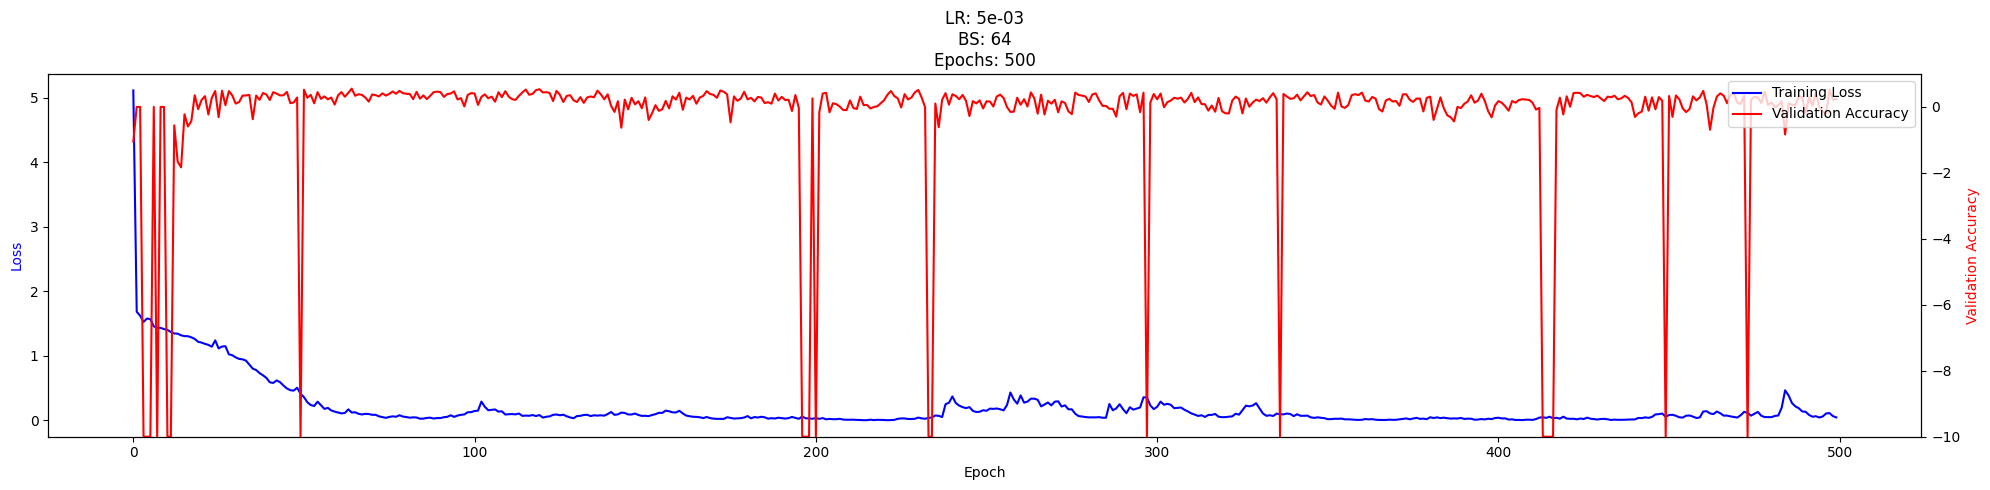


Final Model Performance:
------------------------------
Best Validation Score: 0.5550
Final Training Loss: 0.0477
Test Accuracy: 0.1935

Parameters used:
- Learning Rate: 5e-03
- Batch Size: 64
- Epochs: 500


In [116]:
# Plot and stats cell
plot_training_curves(le_curves)

print("\nFinal Model Performance:")
print("-" * 30)
print(f"Best Validation Score: {le_results[0]['best_val_score']:.4f}")
print(f"Final Training Loss: {le_results[0]['final_loss']:.4f}")
print(f"Test Accuracy: {le_results[0]['test_score']:.4f}")
print(f"\nParameters used:")
print(f"- Learning Rate: {best_lr:.0e}")
print(f"- Batch Size: {best_bs}")
print(f"- Epochs: 500")

# Part 3: Comparison Study
Let's look at alternative models commonly used in ML ([linear regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html), [decision tree learning](https://scikit-learn.org/1.5/modules/tree.html), [random forest, XG boost](https://scikit-learn.org/1.5/modules/ensemble.html)) and have proven to be very powerful in modeling large datasets. You might have already learned some of them in this and other AI/ML-topic courses. SKLearn provides a fast and convenient pipeline for us to load up different ML models and train/cross-validate them.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

def train_other_ML_models(X, y):
    for model in [LinearRegression(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  GradientBoostingRegressor()]:
        scores = cross_validate(model, X, y, cv=5, return_train_score=True)
        # Average over the different fold-divisions and print results
        print(f"{model.__class__.__name__}:")
        print(f"Train Accuracy: {scores['train_score'].mean():.4f}")
        print(f"Validation Accuracy: {scores['test_score'].mean():.4f}")
        print()


# Normalize the data for other ML models
numeric_features = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features.drop(columns=['MEDV']))

train_other_ML_models(
    X=scaled_features,
    y=numeric_features['MEDV']
)

LinearRegression:
Train Accuracy: 0.7493
Validation Accuracy: 0.3533

DecisionTreeRegressor:
Train Accuracy: 1.0000
Validation Accuracy: 0.1613

RandomForestRegressor:
Train Accuracy: 0.9827
Validation Accuracy: 0.6249

GradientBoostingRegressor:
Train Accuracy: 0.9788
Validation Accuracy: 0.6786



# Part 4: Final Report and Student's Reflection

From your experiments in the previous parts, answer each of the following 14 questions (200 words or less for each question). Please type your answer below each of the questions (you can edit the text cell by double click on a word in the cell):

### 1. Report ALL the hyperparameters you've used in training the T5 model on the Boston house price prediction task (e.g. what is the train-val-test split percentage? how many epochs did you train the model? etc.).


* Model Architecture
    * Pre-trained model: `t5-small`
* Data Split
    * Training set: 80%
    * Validation set: 10%
    * Test set: 10%
    * Implementation: `train_test_split` with `test_size=0.2`, then another 50/50 split of the test portion
* Training Parameters
    * Learning rate: `1e-4`
    * Batch size: `32`
    * Number of epochs: `100`
    * Optimizer: `AdamW` (with default parameters except learning rate)
* Generation Parameters
    * `max_new_tokens`: `10` (used during validation and testing)
* Data Processing
    * Tokenizer: `T5Tokenizer` with padding
    * Device: `CUDA` if available, else `CPU`

### 2. Did you try different values for each hyperparameter? What are they? Which value(s) you have found to be the best at helping the model reach higher test accuracy?

* I tried different values for Learning Rate, Batch Size, and Number of epochs. 
* To summarize, here's the list of hyper parameters I tried out :
    * Learning Rate: `[5e-3, 1e-3, 5e-4, 1e-4, 1e-5, 1e-6]`
    * Batch Size: `[16, 32, 64]`
    * Epochs: `[50, 100, 150, 500]`
* Best values, as per my experiments above, were:
    * Learning Rate: `1e-06`
    * Batch Size: `32`

Initially, it seemed to be helpful to have a relatively higher learning rate for training the model rapidly. But as the number of epoch and overall iterations increased, to perform minor tweaks for gradient descent, having a lower learning rate helped to reach convergence, as well as to increase the accuracy of the model.

### 3. Report the final model training loss and its accuracy on the held-out test data.

* Final Model Training Loss: 0.1109
* Test Accuracy: 0.7471

### 4. What is the model's test accuracy (R-squared score) if it always answer with the average value over the housing prices in the dataset regardless of the input features? Did your trained model do better than that score?

* Model's accuracy would be 0 if it always predicted the mean. This is valid for R-squared value only.
* All iterations of my model have definitely performed better than that, as 0.7471 > 0.

### 5. There is no correct answer to this question. From your results, do you think it understand the human housing market? to what degree does it do/don't? how do you think the modality difference (the strict numerical pricing values versus the loosely defined textual price format) impact the learning of our language model? did you notice highly discontinuous and erratic jumps in the model's validation score over the training epochs (e.g. it goes from -inf to -0.5 to -155.3 to 0.33, etc. in immediate steps)? why?
##### Hint: pay attention to how the model's inner workings are numerical computations (matrix multiplications and additions) but it must work with and adapt to discrete tokens at its input and output endpoints.

* I don't think it correctly could understand the human housing market.
* It understood the fact that the problem we're giving it is a token prediction. Basically, a right token. However, I don't think it grasped the relationships between the values numerically, even though it is giving a good enough accuracy score.
* Since predicting house prices is essentially a regression task, forming correlations and linearity between parameters is of course, crucial. A textual price format encodes the data into tokens and embeddings, and although it retains the textual aspects of the numbers and data, numerical significance might be lost. 
* Yes, Validation scores jumped anywhere from -inf to positive values.
* This might because of the problem described above. Sure enough, the model works with numbers. Machine learning is all about math. But it's important to know what type of mathematical data is being worked upon here. Numerical to text conversion adds noise to learning process and token-based generation leads to discontinuous outputs. So, even if the training loss was ultimately reduced, predicting the house price is a mathematical process, not a token prediction.

### 6. What part of the T5's pre-trained internet data you think might have helped its performance on our Boston house price prediction task?

* Exposure to housing / real-estate prices and descriptions.
* Understanding of numerical relationships.
* Knowledge of price ranges and formatting.

### 7. What part of the T5's pre-trained internet data you think might have hurt its performance on our Boston house price prediction task?

* Most pre-trained data unrelated to house prices (which added noise in our case).
* Lack of precise numerical computations.
* Focus on natural language, a opposed to structured data.

### 8. Did you observe the model overfitting (complete memorization of) our training data? how do you know it did/didn't?

* Yes, experienced some overfitting.
* Training loss kept on decreasing, but validation accuracy plateaued/decreased in some cases. There was considerable gap between training and validation metrics, and that means overfitting.
* Model memorized training examples well, but struggled to generalize.

### 9. What is the perfect number of training epochs that you would use to prevent your model from overfiting this task? why?
#####   - If it is impossible to prevent overfitting, explain why you think so.
#####   - If its trivial for the model to never overfit, explain why you think so.

* I think this answer depends on the learning rate. With learning rate about 1e-04, the epochs should be around 50 to 60. Beyond this, there is no considerable increase in validation accuracy, although training loss increases. And while testing out different hyperparameters, I found that even though training loss decreased with epochs, validation accuracy displayed erratic behaviour, including jumping to high negative values at times.
* Also having an early stopping functionality in the code would be good to prevent overfitting.

### 11. How do you think you can improve the training algorithm or the dataset design or the model choice to do better at our Boston house price prediction task? what nuances you think is important in considering these choices?

* Data augmentation.
* Getting more data. Very few rows for an LLM to generalize in.
* Gradient Boosting and Ensemble models give considerably good scores with a fraction of computing resources, even though the T5 model eventually outperformed them after a lot of training and tweaking.
* Custom architecture to handle numerical tasks.
* Having better hardware and computing resources to speed up the process so that we can tune hyperparameters more, and also build custom architectures fast. A good GPU is required.
* A better input/output format might have helped. Maybe putting in column name in each row, and other data description might have made the model better.
  
* We should keep in mind that the model is an LLM after all, and is excellent at dealing with text data. Also we used the T5-small model as is from Huggingface. We should prepare the model and data accordingly. It is good at predicting tokens, so we should handle our input data in such a way that the model can efficiently predict output labels.

### 12. Report the results of your comparison study (between the T5 with each of the other ML models)

* LinearRegression:
    - Train Accuracy: 0.7493
    - Validation Accuracy: 0.3533

* DecisionTreeRegressor:
    - Train Accuracy: 1.0000
    - Validation Accuracy: 0.1613

* RandomForestRegressor:
    - Train Accuracy: 0.9827
    - Validation Accuracy: 0.6249

* GradientBoostingRegressor:
    - Train Accuracy: 0.9788
    - Validation Accuracy: 0.6786

### 13. Why do you think each ML model do better/worse than the other? is your trained T5 achieving a better accuracy than some/all the other models? why do you think it might be doing better/worse than some/all of the other ML models?

* Random Forests performed well due to ensemble learning.
* Gradient Boosting performed the best in the end due to it being ensemble learning and gradient boosting, after all.
* Decision Tree captured the training data well, but failed to generalize.
* Linear Regression gives a decent baseline model.

* If compared test accuracy of T5 with validation accuracies of ML models, T5 did perform better than all of the models. However, T5 was trained intensely for hours, and validation accuracy of T5 have weird patterns.
* T5 used significantly more computing resources to train, hence it might have eventually achieved a high test accuracy. Also it's pre-trained data might have consisted of Real Estate data, which facilitated its progress.
* If the ensemble learning / specialized Regression models were tweaked, or stacking was done, there was a high chance that they would outperform the T5 model.

### 14. Considering the training time and inference time of our T5 model versus the other ML models, do you think the accuracy that our T5 achieve was worth it? why?

* T5 requires significantly more computing resources.
* ML models generally train and infer faster.
* A small increase in accuracy by training the T5 model extensively might not have been worth it, as we could put the computing resources and human efforts in tweaking actual Regression models instead.
* Specialized models are better suited for this task. We could even consider Deep Learning and Neural Networks.

# Part 5: Submission (Deadline: before class - 9 AM at December 6th, 2024)

We expect you to complete the TODOs, run all the code cells, and have the final outputs of those cells displayed in your submission. Your submission file should be a single .ipynb file (openable to Jupyter Notebook and Google Colab).

Please submit your file to the course Blackboard.